## <p style="background-color:#757D70;color:#D5CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Projet 3** : Concevez une application au service de la santé publique   ***Notebook de nettoyage*** </p>

<img src="SantePublique.png" align="left" alt="Alternative text" />

L'agence [Santé publique France](https://www.santepubliquefrance.fr/) a lancé un appel à projets pour trouver des idées innovantes d'applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d'application.

---
- Mentor [**Babou M'BAYE**]()
- Etudiant [**Bourama FANE**](https://www.linkedin.com/in/bourama-fan%C3%A9-7aba41141/)
- Parcours [*Data Scientiste*]()
- Ecole [*OpenClassrooms*]()

---

### <a id='s'> <p style="background-color:#EDEDED;color:#4F6272;font-size:110%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp;Sommaire </p>  </a>


------

[Contexte](#0)    
[1 - Librairies & Fonctions](#1)    
[2 - Chargement des jeux de données](#2)   
[3 - Exploration des jeux de données](#3)    
[4 - Filtres sur les données](#4)      
> [4.1. - Filtres sur le pays](#4.1)       
> [4.2. - Filtres sur la catégorie](#4.2)   
> [4.3. - Filtres sur le nom du produit](#4.3)
  

[5 - Colonnes dupliquées](#5)   
[6 - Valeur manquantes](#6)     
[7 - Outliers](#7)      
    
   
[Conclusion](#9) 

-----------

### <a id='0'> <p style="background-color:#EDEDED;color:#4F6272;font-size:110%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; Contexte  </p>  </a>

L'Agence [Santé publique France](https://www.santepubliquefrance.fr/) a lancé un appel à projets afin de trouver des idées innovantes en lien avec l'alimentation. <br>             
Pour **répondre à cet appel à projets**, nous devons utiliser les **données collectées par l'iniative Open Food Facts**.
<br>  <br> [Open Food Facts ](https://openfoodfacts.org/) est une association à but non lucratif composée de volontaires.<br> 

<div class="warning" style='background-color:#E9D8FD; color: #4F6272; font-family:Yu Gothic UI;font-size:105%;border-left: solid #805AD5 10px;  border-right: solid #805AD5 4px; border-radius: 10px; padding:0.05em;'>
<span> 
    
<p style='margin-left:0.5em;'>
Les données sont organisées en <b> 5 sections </b> listées ci dessous:  </p>
    <p style='margin-left:0.9em;'>
1-  informations générales sur le produit <br>   
2-  ensemble de tags sur le produit et sa provenance  <br>  
3-  ingrédients et allergènes   <br>
4-  informations diverses  <br>
5-  informations nutritionnelles.
  </p></span>
</div>

### <a id='1'> <p style="background-color:#EDEDED;color:#4F6272;font-size:110%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 1- Librairies & Fonctions </p>  </a>
[Back to table of content](#s) <br>
[Go to Next section](#2)

### Importation des librairies 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import missingno as msno
from pivottablejs import pivot_ui
from IPython.display import HTML
from pandas_profiling import ProfileReport
from IPython.display import display, Markdown
# import warnings
# warnings.filterwarnings("ignore")

# Affichage des valeurs
pd.set_option('display.max_colwidth', None)

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 16,
             }


mycolors = ["black", "hotpink", "b", "#4CAF50"]
AllColors=['#99ff99','#66b3ff','#4F6272', '#B7C3F3','#ff9999','#ffcc99','#ff6666', '#DD7596', '#8EB897',
           '#c2c2f0','#DDA0DD','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', 
           '#7f7f7f', '#bcbd22', '#17becf','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33',
           '#a65628','#f781bf',"#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

# !pip install dataframe_to_image
import dataframe_image as dfi
imgPath='D:/OpenClassrooms/Projet 3/Soutenance/'

%matplotlib inline

### Fonctions 

In [2]:
def namestr(obj, namespace):
    ''' fonction retourne le nom en string '''
    return [name for name in namespace if namespace[name] is obj] 

def Camembert(data,col):
    df = data[col].value_counts().reset_index()
    L=len(df[col])
    labels=list(df['index'])
    sizes=list(df[col])
    # print(labels,"\n",sizes)
    explode = Explodetuple(L)
    colors =AllColors[:L] 
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=0) 
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.show()
    
def remplacement(data, cols, caracter1,caracter2):
    for col in cols:
        data[col] = data[col].str.lower().str.replace(caracter1, caracter2)
    return data

def remplacement2(data, cols, caracter1,caracter2):
    for col in cols:
        data[col] = data[col].str.replace(caracter1, caracter2)
    return data

def recodage(data, cols):
    for col in cols:
        data[col] = np.where((data[col].isnull()==True), "unknown", np.where(data[col] == "", "unknown", data[col]))
    return data

# Cette fonction permet de lister les modalités avec leur occurence d'unchamp qui cumule differentes modalités.
def top_words(data, cols, nb_top=100):
    count_keyword = dict()
    for index, col in data[cols].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else :
                count_keyword[word] = 1
  
    keyword_top = []
    for k,v in count_keyword.items():
        keyword_top.append([k,v])
    keyword_top.sort(key = lambda x:x[1], reverse = True)
    return keyword_top[:nb_top]

### <a id='2'> <p style="background-color:#EDEDED;color:#4F6272;font-size:110%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 2- Chargement des jeux de données </p>  </a>
[Back to table of content](#s) <br>
[Go to Next section](#3)

In [3]:
dfood = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',low_memory=False)
dfood.head()

code  \
0  0000000003087   
1  0000000004530   
2  0000000004559   
3  0000000016087   
4  0000000016094   

                                                                                          url  \
0  http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   
1        http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole   
2                http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser   
3    http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies   
4      http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [4]:
dfood.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

## <a id='3'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 3 - Exploration des jeux de données </p> </a> 
[Back to table of content](#s) <br>
[Go to Next section](#4)

- dimensions,taille, missings, type de variables      
- Taux de completion des données;</a>

In [5]:
def infoDataFrame(data):
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Info générales sur la base : {0}'.format(namestr(data, globals()))))
    display(Markdown('------------------------------------'))
    # print('--------------------------------------------------------------------------')
    # print('Info générales sur la base : {0}'.format(namestr(data, globals())))
    data.info()
    print(" ")
    print(" ")
    nbLigne = data.shape[0] 
    nbColonne = data.shape[1]
    print('Le jeu de données {} a {} lignes et {} colonnes.'.format(namestr(data, globals()),nbLigne,nbColonne))
    df=pd.DataFrame({'Variable':['lignes','colonnes'],'nombre':[nbLigne, nbColonne]})
    print(" ")
    display(df)
    return df

In [6]:
infodfood=infoDataFrame(dfood)
dfi.export(infodfood, imgPath+'dfshape.png') # exportation de la table en image pour les besoins de la prez

------------------------------------

#### Info générales sur la base : ['dfood']

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB
 
 
Le jeu de données ['dfood'] a 320772 lignes et 162 colonnes.
 


Variable  nombre
0    lignes  320772
1  colonnes     162

In [7]:
dfood.shape

(320772, 162)

#### Types de Variables

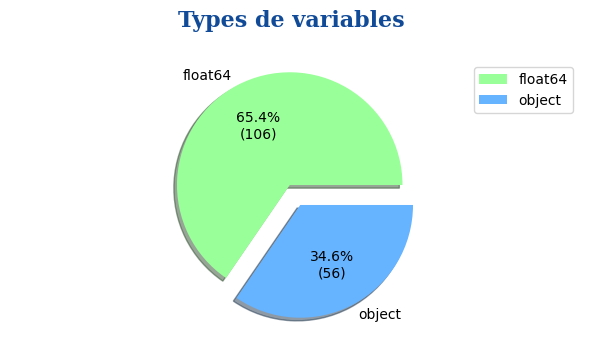

Types de variables  Nombre
0            float64     106
1             object      56

In [8]:
def Explodetuple(m):
    liste1=[]
    for t in range(m):
        if t in [0,1] :
            liste1.append(0.1)
        else:
            liste1.append(0)
    return tuple(liste1) 

def percentFreq(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format
    

def repartitionTypeVar(data,figsize=(6, 3),title="Types de variables \n", grahName=''):
    df = data.dtypes.value_counts()
    L=len(df)
    labels=list(df.index)
    sizes=list(df)
    # print(labels,"\n",sizes)
    explode = Explodetuple(L)
    colors =AllColors[:L] 
    fig1, ax1 = plt.subplots(figsize=figsize)
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=percentFreq(df),shadow=True, startangle=0) 
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(label=title, fontdict=font_title)
    plt.legend()
    if grahName!='':
        plt.savefig(imgPath+grahName, bbox_inches='tight')  
    plt.show() 
    plt.close()

    df=df.reset_index()
    df.columns=['Types de variables','Nombre']
    display(df.reset_index(drop=True))
    
# Affichage des types de variables dans la base.
repartitionTypeVar(dfood, grahName='typevar.png')

In [9]:
dfood.dtypes #.value_counts()

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [10]:
dfood.describe(include='all')

code  \
count          320749   
unique         320749   
top     0000000003087   
freq                1   
mean              NaN   
std               NaN   
min               NaN   
25%               NaN   
50%               NaN   
75%               NaN   
max               NaN   

                                                                                               url  \
count                                                                                       320749   
unique                                                                                      320749   
top     http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   
freq                                                                                             1   
mean                                                                                           NaN   
std                                                                                            NaN   
min                                                                                            NaN   
25%                                                                                            NaN   
50%                                                                                            NaN   
75%                                                                                            NaN   
max                                                                                            NaN   

                creator   created_t      created_datetime last_modified_t  \
count            320770      320769                320763          320772   
unique             3535      189567                189568          180495   
top     usda-ndb-import  1489077120  2017-03-09T10:37:09Z      1439141742   
freq             169868          20                    20              33   
mean                NaN         NaN                   NaN             NaN   
std                 NaN         NaN                   NaN             NaN   
min                 NaN         NaN                   NaN             NaN   
25%                 NaN         NaN                   NaN             NaN   
50%                 NaN         NaN                   NaN             NaN   
75%                 NaN         NaN                   NaN             NaN   
max                 NaN         NaN                   NaN             NaN   

       last_modified_datetime product_name  \
count                  320772       303010   
unique                 180495       221347   
top      2015-08-09T17:35:42Z    Ice Cream   
freq                       33          410   
mean                      NaN          NaN   
std                       NaN          NaN   
min                       NaN          NaN   
25%                       NaN          NaN   
50%                       NaN          NaN   
75%                       NaN          NaN   
max                       NaN          NaN   

                                               generic_name quantity  ...  \
count                                                 52795   104819  ...   
unique                                                38584    13826  ...   
top     Pâtes alimentaires au blé dur de qualité supérieure    500 g  ...   
freq                                                    201     4669  ...   
mean                                                    NaN      NaN  ...   
std                                                     NaN      NaN  ...   
min                                                     NaN      NaN  ...   
25%                                                     NaN      NaN  ...   
50%                                                     NaN      NaN  ...   
75%                                                     NaN      NaN  ...   
max                                                     NaN      NaN  ...   

          ph_100g fruits-vegetables-nuts_100g  \
count   49.000000                 3036.

In [11]:
dfood.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

### Valeurs manquantes

In [12]:
def completude(data):
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        var_dict[col].append(round(data[col].isna().mean()*100,2))
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux completion", "Nb missings","%missings"]).sort_values(by="Taux completion", ascending=False)


In [13]:
completude(dfood)

Taux completion  Nb missings  %missings
creator                                          100.0            2        0.0
created_t                                        100.0            3        0.0
created_datetime                                 100.0            9        0.0
last_modified_t                                  100.0            0        0.0
last_modified_datetime                           100.0            0        0.0
...                                                ...          ...        ...
ingredients_that_may_be_from_palm_oil              0.0       320772      100.0
serum-proteins_100g                                0.0       320756      100.0
nucleotides_100g                                   0.0       320763      100.0
myristic-acid_100g                                 0.0       320771      100.0
water-hardness_100g                                0.0       320772      100.0

[162 rows x 3 columns]

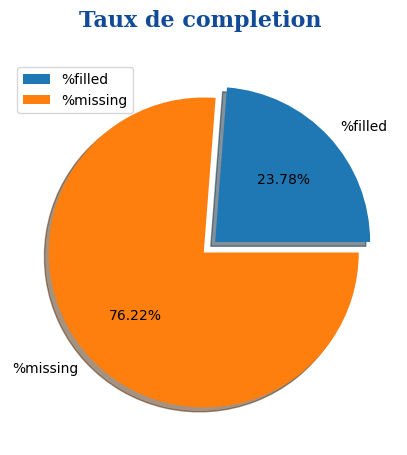

In [14]:
def fillingRate(data, grahName=''):   
    filled =data.notna().sum().sum()/(data.shape[0]*data.shape[1])
    missing =data.isna().sum().sum()/(data.shape[0]*data.shape[1])

    taux = [filled, missing]
    labels = ["%filled", "%missing"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Taux de completion \n", fontdict=font_title)
    ax.axis("equal")
    explode = (0.1, 0)
    ax.pie(taux, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True,)
    plt.legend(labels)
    if grahName!='':
        plt.savefig(imgPath+grahName, bbox_inches='tight')  
        plt.show() 
    plt.close()

fillingRate(dfood, 'taux1.png')

<AxesSubplot: >

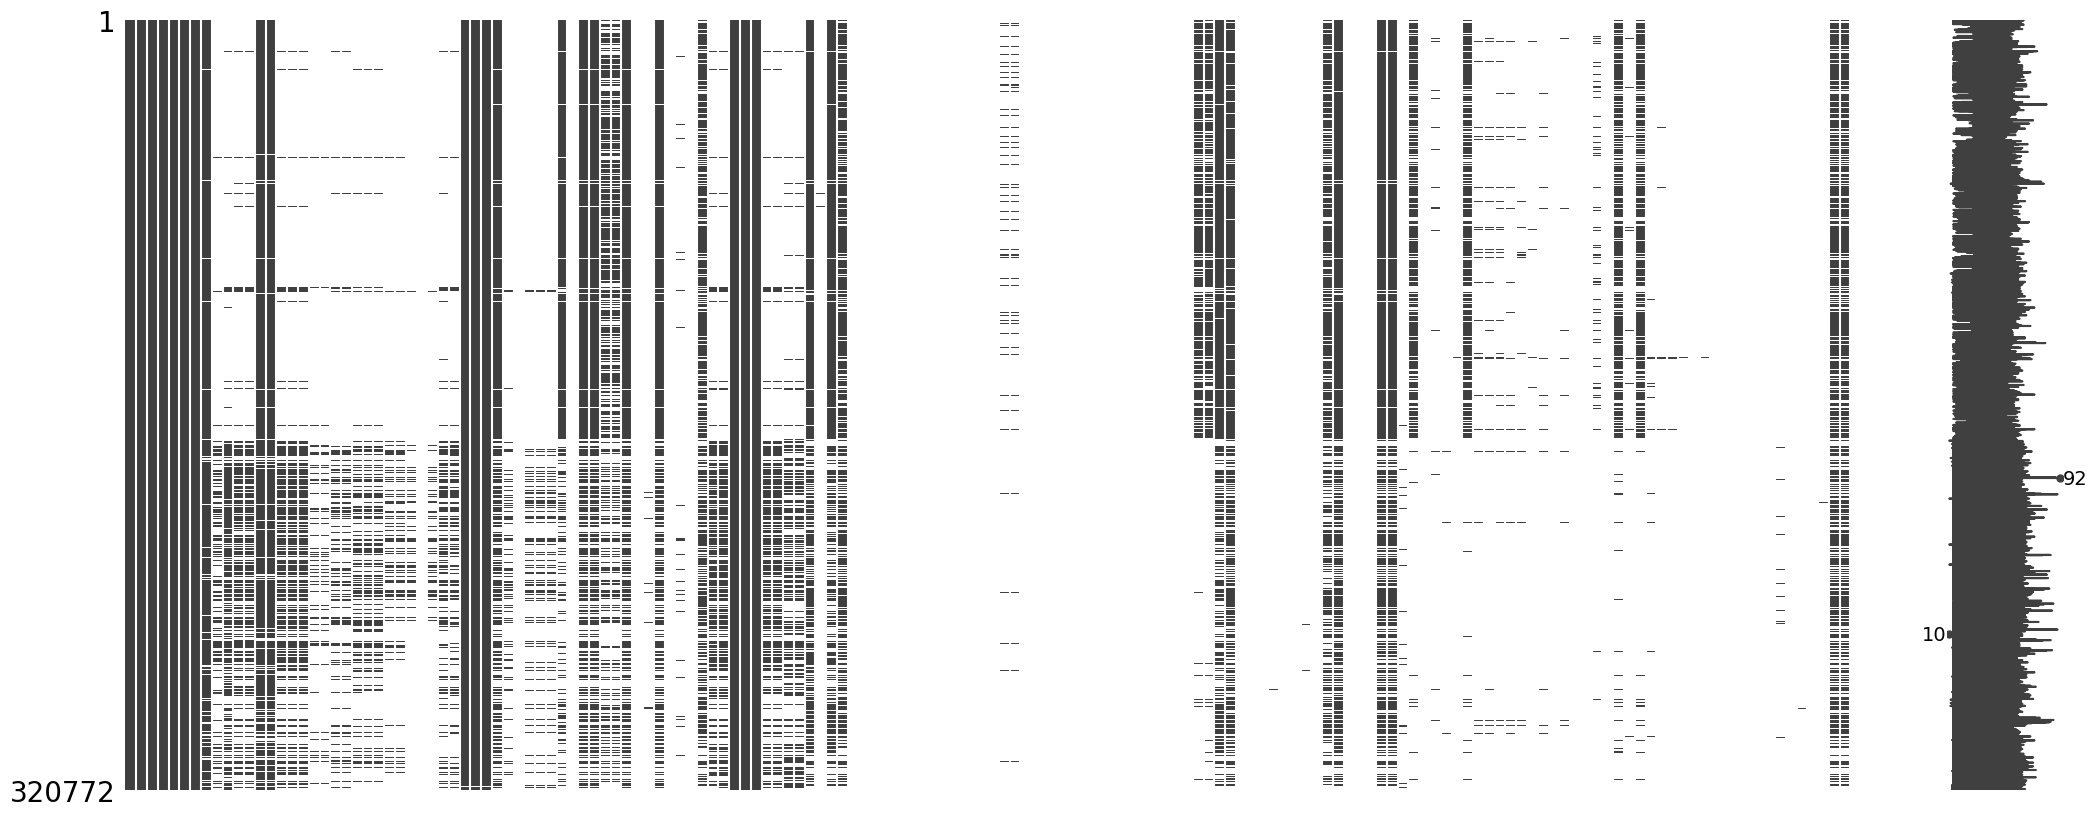

In [15]:
msno.matrix(dfood)

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 5px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span>
        <p style='margin-left:0.9em;margin-right:0.9em;'>
            Globalement, nos données présentent beaucoup de <b><i>valeurs manquantes</i></b>. Nous comptabilisons un taux de missings de <b><i> 76% </i></b>.<br> 
            Certaines variables sont <b><i> pratiquement vides</i></b>,i.e elles contiennent très peu de valeurs renseignées. Elles seront supprimées de la base par la suite.
        </p>
    </span>
</div>

## <a id='4'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 4 - Filtres sur les données </p>  </a>
[Back to table of content](#s) <br>
[Go to Next section](#5)

### <font color='blueviolet'> *4.1. Filtre sur le pays* </font>
-----------------
Dans cette sous-section, nous allons identifier les produits vendus en France. Pour ce faire, nous allons examiner trois colonnes à savoir : **countries, countries_tags,countries_fr**. Nous allons faire des fréquences simples sur les différentes variables et comparer les modalités.

In [16]:
def freqSimple (data, cols):
    return data[cols].unique().tolist()

def valeurUnique(data, cols):
    return data.drop_duplicates(subset=cols)[cols]


def freqSimple2(data, col_names):
    for col_name in col_names:    
        effectifs = data[col_name].value_counts()
        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [col_name]) # création du tableau à partir des modalités
        tab["Nombre"] = effectifs.values
        tab["Frequence"] = tab["Nombre"] / len(data) # len(data) renvoie la taille de l'échantillon
        # tab = tab.sort_values(col_name) # tri des valeurs de la variable X (croissant)
        tab["Freq. cumul"] = tab["Frequence"].cumsum() # cumsum calcule la somme cumulée
        display(Markdown('------------------------------------'))       
        display(Markdown('#### Fréquence sur la variable ***' + col_name+'***'))
        display(Markdown('------------------------------------'))
        display(tab)

In [17]:
freqSimple2(dfood,['countries', 'countries_tags','countries_fr'])

------------------------------------

#### Fréquence sur la variable ***countries***

------------------------------------

countries  Nombre  Frequence  \
0                                             US  169928   0.529747   
1                                         France   77292   0.240956   
2                                          en:FR   16979   0.052932   
3                                         Suisse   12314   0.038389   
4                                    Deutschland    6161   0.019207   
...                                          ...     ...        ...   
1429  Tschechien,Dänemark,Frankreich,Deutschland       1   0.000003   
1430                   Danemark,Allemagne,France       1   0.000003   
1431      Dänemark,Frankreich,Deutschland,Indien       1   0.000003   
1432                                    Dänemark       1   0.000003   
1433                             Hong Kong,China       1   0.000003   

      Freq. cumul  
0        0.529747  
1        0.770703  
2        0.823635  
3        0.862023  
4        0.881230  
...           ...  
1429     0.999115  
1430     0.999118  
1431     0.999121  
1432     0.999124  
1433     0.999127  

[1434 rows x 4 columns]

------------------------------------

#### Fréquence sur la variable ***countries_tags***

------------------------------------

countries_tags  \
0                                                        en:united-states   
1                                                               en:france   
2                                                          en:switzerland   
3                                                              en:germany   
4                                                                en:spain   
..                                                                    ...   
720         en:armenia,en:france,en:germany,en:italy,en:romania,en:russia   
721                              en:denmark,en:france,en:germany,en:india   
722                     en:czech-republic,en:denmark,en:france,en:germany   
723  en:denmark,en:france,en:germany,en:russia,en:spain,en:united-kingdom   
724                                                 en:china,en:hong-kong   

     Nombre  Frequence  Freq. cumul  
0    172998   0.539318     0.539318  
1     94391   0.294262     0.833580  
2     14953   0.046616     0.880195  
3      7870   0.024535     0.904730  
4      5009   0.015615     0.920345  
..      ...        ...          ...  
720       1   0.000003     0.999115  
721       1   0.000003     0.999118  
722       1   0.000003     0.999121  
723       1   0.000003     0.999124  
724       1   0.000003     0.999127  

[725 rows x 4 columns]

------------------------------------

#### Fréquence sur la variable ***countries_fr***

------------------------------------

countries_fr  Nombre  Frequence  \
0                                      États-Unis  172998   0.539318   
1                                          France   94392   0.294265   
2                                          Suisse   14953   0.046616   
3                                       Allemagne    7870   0.024535   
4                                         Espagne    5009   0.015615   
..                                            ...     ...        ...   
717  Danemark,Suisse,en:Deutschland,en:Frankreich       1   0.000003   
718                      France,Luxembourg,Suisse       1   0.000003   
719         Autriche,République tchèque,Allemagne       1   0.000003   
720                             Allemagne,Hongrie       1   0.000003   
721                               Chine,Hong Kong       1   0.000003   

     Freq. cumul  
0       0.539318  
1       0.833583  
2       0.880198  
3       0.904733  
4       0.920348  
..           ...  
717     0.999115  
718     0.999118  
719     0.999121  
720     0.999124  
721     0.999127  

[722 rows x 4 columns]

In [18]:
# Pays = pd.DataFrame(top_words(dfood, 'countries_fr', nb_top=10000), columns=["Pays","Nombre"])
# Pays 
# top_words(dfood, 'countries_fr', nb_top=10000)

In [19]:
regionFrance = ['fr','france','Française', 'Réunion', 'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe','Mayotte', 'Guyane']
def CompareNblignes(data, cols):
    for col in cols:
        print(len(data[(data[col].str.contains("|".join(regionFrance), na = False, case=False))]))
        
CompareNblignes(dfood, ['countries', 'countries_tags','countries_fr'])

98669
98842
99061


<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span>
        <p style='margin-left:0.5em;margin-right:0.5em;'>
            Avec ces résultats, nous voyons que les trois (3) variables n'ont pas les memes contenus. 
            Elles renvoient des lignes différentes. 
            Nous allons,donc, investiguer pour comprendre. La variable <b><i>countries_fr</i></b> semble être la bonne variable à considérer.
        </p>
    </span>
</div>

In [20]:
dfcheck=valeurUnique(dfood, ['countries', 'countries_tags','countries_fr'])
dfcheck[~(dfcheck['countries'].str.contains("|".join(regionFrance), na = False, case=False)) &
        (dfcheck['countries_fr'].str.contains("|".join(regionFrance), na = False, case=False))]

countries  \
460                                                                                                                                                                                                                                                                                                                                        en:GP   
10530                                                                                                                                                                                                                                                                                                                                      en:NC   
12986                                                                                                                                                                                                                                                                                                                                      en:PF   
13295                                                                                                                                                                                                                                                                                                                                  en:PF, US   
22694                                                                                                                                                                                                                                                                                                                                      en:MQ   
69085                                                                                                                                                                                                                                                                                                      Франция,Россия,Испания,Великобритания   
99135                                                                                                                                                                                                                                                                                                                                  en:NC, US   
115032                                                                                                                                                                                                                                                                                                                                     en:RE   
189160  en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
189162                              en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
189260                                    en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
192058                                                                                                                                                                                                                                                 

In [21]:
dfcheck[~(dfcheck['countries_tags'].str.contains("|".join(regionFrance), na = False, case=False)) &
        (dfcheck['countries_fr'].str.contains("|".join(regionFrance), na = False, case=False))]

countries  \
10530                                                                                                                                                                                                                                                                                                                                      en:NC   
27471                                                                                                                                                                                                                                                                                                                                    Réunion   
68117                                                                                                                                                                                                                                                                                                                         Nouvelle-Calédonie   
99135                                                                                                                                                                                                                                                                                                                                  en:NC, US   
115032                                                                                                                                                                                                                                                                                                                                     en:RE   
115214                                                                                                                                                                                                                                                                                                                                La Réunion   
189160  en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
189162                              en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
189260                                    en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
208112                                                                                                                                                                                                                                                                                                                             New Caledonia   
280350                                                                                                                                                                                                                                                                                                                        La Réunion, Suisse   
301017                                                                                                                                                                                                                                                 

<div class="warning" style="font-family:Yu Gothic UI;font-size:100%;padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span>
        <p style='margin-left:0.9em;margin-right:0.9em;'>
Nous allons donc utiliser la variable <b><i> countries_fr</i></b> pour filtrer sur les produits vendus en France<br>
-  Dans le champ <b><i> countries</i></b>, le nom du pays est traduit dans différentes langues, souvent il affiche les initiales du nom du pays (ou région); <br>
-  Pour le champ <b><i> countries_tags</i></b>, il contient aussi souvent de la traduction anglaise du nom du pays ou région <br> 
Pour la suite, nous allons filtrer sur la variable <b><i>countries_fr </i></b> et supprimer les deux autres (<b><i> i.e countries,countries_tags)</i></b>. 
        </p>
    </span>
</div>

In [22]:
regionFrance = ['fr','france','Française', 'Réunion', 'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe',
                'Mayotte', 'Guyane']

def filterColumns(data, cols, motsCles,negation=False):
    if negation==False:
        data=data.loc[data[cols].str.contains("|".join(motsCles), na = False, case=False),:]
    else:
        data=data.loc[~data[cols].str.contains("|".join(motsCles), na = False, case=False),:]
    return data

dfood=filterColumns(dfood, 'countries_fr', regionFrance)

In [23]:
# Certains noms de pays sont complètement eronnés ('countries_fr'='en:fruit-yogurts')
dfood=dfood.loc[~(dfood['countries_fr']=='en:fruit-yogurts'),:]

In [24]:
dfood.drop(['countries', 'countries_tags'], axis=1,inplace=True)
dfood.head()
# dfood['countries_fr'].unique().tolist()
# dfood['long']=dfood['countries_tags'].apply(lambda x: len(x))
# dfood[['countries_tags','countries_fr','long']].sort_values(by='long',ascending=False).iloc[:60]

code  \
0    0000000003087   
46   0000000024600   
48   0000000027205   
106  0000000036252   
136  0000000039259   

                                                                                            url  \
0    http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   
46                       http://world-fr.openfoodfacts.org/produit/0000000024600/filet-de-boeuf   
48                                      http://world-fr.openfoodfacts.org/produit/0000000027205   
106             http://world-fr.openfoodfacts.org/produit/0000000036252/lion-peanut-x2-sunridge   
136                             http://world-fr.openfoodfacts.org/produit/0000000039259/twix-x2   

                        creator   created_t      created_datetime  \
0    openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
46              date-limite-app  1434530704  2015-06-17T08:45:04Z   
48                      tacinte  1458238630  2016-03-17T18:17:10Z   
106                     tacinte  1422221701  2015-01-25T21:35:01Z   
136                     tacinte  1422221773  2015-01-25T21:36:13Z   

    last_modified_t last_modified_datetime        product_name generic_name  \
0        1474103893   2016-09-17T09:18:13Z  Farine de blé noir          NaN   
46       1434535914   2015-06-17T10:11:54Z       Filet de bœuf          NaN   
48       1458238638   2016-03-17T18:17:18Z                 NaN          NaN   
106      1489055667   2017-03-09T10:34:27Z      Lion Peanut x2          NaN   
136      1473538082   2016-09-10T20:08:02Z             Twix x2          NaN   

    quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0        1kg  ...     NaN                         NaN   
46   2.46 kg  ...     NaN                         NaN   
48       NaN  ...     NaN                         NaN   
106      NaN  ...     NaN                         NaN   
136      NaN  ...     NaN                         NaN   

    collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                                NaN        NaN             NaN   
46                               NaN        NaN             NaN   
48                               NaN        NaN             NaN   
106                              NaN        NaN             NaN   
136                              NaN        NaN             NaN   

    carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                     NaN                     NaN                     NaN   
46                    NaN                     NaN                     NaN   
48                    NaN                     NaN                     NaN   
106                   NaN                    22.0                    22.0   
136                   NaN                     NaN                     NaN   

    glycemic-index_100g water-hardness_100g  
0                   NaN                 NaN  
46                  NaN                 NaN  
48                  NaN                 NaN  
106                 NaN                 NaN  
136                 NaN                 NaN  

[5 rows x 160 columns]

In [25]:
# dfood['countries_fr'].unique()

### <font color='blueviolet'> *4.2. Filtre sur la catégorie du produit* </font>

-----------------
Dans cette sous-section, nous allons nous interesser aux différentes catégories de produits.    
Pour ce faire, nous allons examiner trois colonnes à savoir : **categories, categories_tags,categories_fr**.

------------------

In [26]:
def compare_NaN(df, col1, col2,align=90):
    ''' Cette fonction permet de comparer les champs renseignés sur deux colonnes'''
    num_rows, num_cols = df.shape
    
    col1notnull_col2null = round((((df[(df[col1].notnull()) & (df[col2].isnull())][[col1,col2]].shape[0])/num_rows )*100), 5)
    col2notnull_col1null = round((((df[(df[col2].notnull()) & (df[col1].isnull())][[col1,col2]].shape[0])/num_rows )*100), 5)
    col1notnull_col2notnull = round((((df[(df[col1].notnull()) & (df[col2].notnull())][[col1,col2]].shape[0])/num_rows)*100), 5)

    display(Markdown(f'#### Comparaison entre {col1} et {col2}'))
    display(Markdown('----------------------'))
    
    print(f"{f'Cas où {col1} est renseigné mais pas {col2} :':<{align}} {col1notnull_col2null}%")
    print(f"{f'Cas où {col2} est renseigné mais pas {col1} :':<{align}} {col2notnull_col1null}%")
    print(f"{f'Cas où {col1} et {col2} sont renseignés tous les deux :':<{align}} {col1notnull_col2notnull}%")
    # print(f"{'Age: ' + '42':<25} Website: {'DelftStack.com'}")
    # print(f'Cas où {col1} est renseigné mais pas {col2} : {col1notnull_col2null}%')
    # print(f'Cas où {col2} est renseigné mais pas {col1} : {col2notnull_col1null}%')
    # print(f'Cas où {col1} et {col2} sont renseignés tous les deux : {col1notnull_col2notnull}%')
    display(Markdown('----------------------'))

In [27]:
compare_NaN(dfood,  'categories_tags','categories_fr')

#### Comparaison entre categories_tags et categories_fr

----------------------

Cas où categories_tags est renseigné mais pas categories_fr :                              0.0%
Cas où categories_fr est renseigné mais pas categories_tags :                              0.0%
Cas où categories_tags et categories_fr sont renseignés tous les deux :                    62.77246%


----------------------

In [28]:
compare_NaN(dfood, 'categories', 'categories_fr')

#### Comparaison entre categories et categories_fr

----------------------

Cas où categories est renseigné mais pas categories_fr :                                   0.0%
Cas où categories_fr est renseigné mais pas categories :                                   0.0%
Cas où categories et categories_fr sont renseignés tous les deux :                         62.77246%


----------------------

In [29]:
# freqSimple(dfood,'categories_fr')
# dfood[[col for col in dfood.columns if col.startswith('categories')]]
# freqSimple2(dfood,['categories', 'categories_tags','categories_fr'])
valeurUnique(dfood, ['categories', 'categories_tags','categories_fr'])

categories  \
0                                                                                                                                                                                                      NaN   
46                                                                                                                                                                                           Filet de bœuf   
182     Aliments et boissons à base de végétaux,Aliments d'origine végétale,Légumineuses et dérivés,Céréales et pommes de terre,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles vertes   
183                                                                                                                                                                                              Root bier   
184                                                                                                                                                      Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés   
...                                                                                                                                                                                                    ...   
320726                                                                                                                                                                                             Salmons   
320736                                                                                                                                                                   Attiéké,Manioc,Semoules de manioc   
320751                                                                                                                                                                     Biscottes au sarrasin,Biscottes   
320761                                                                                                                                   Boissons,Boissons alcoolisées,Vins,Vins blancs,Roussette du Bugey   
320765                                  Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie   

                                                                                                                                                                                categories_tags  \
0                                                                                                                                                                                           NaN   
46                                                                                                                                                                            fr:filet-de-boeuf   
182     en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:legumes-and-their-products,en:legumes,en:seeds,en:legume-seeds,en:pulses,en:lentils,en:green-lentils   
183                                                                                                                                                                                fr:root-bier   
184                                                                                                                                en:sugary-snacks,en:biscuits-and-cakes,en:biscuits,fr:sables   
...                                                                                                                                                                                         ...   
320726                                                                                                                                                          en:seafood,en:fishes,en:salmons   
320736                                                                                                                                               fr:attieke

In [30]:
dfood=remplacement2(dfood, ['categories_fr'], '-',' ')
dfood=dfood.drop('categories_tags',axis=1)

<div class="warning" style='background-color:#E9D8FD;font-family:Yu Gothic UI;font-size:105%;border-left: solid #805AD5 4px;  border-right: solid #805AD5 4px; border-top: solid #805AD5 1px;border-bottom: solid #805AD5 1px;border-radius: 10px; padding:0.08em;'>
<span> <p style='margin-left:0.5em;margin-top:0.5em;'>
la variable <b><i>categories_tags</i></b> est une traduction de la catégorie dans plusieurs langues. Elle peut être supprimée.<br>
Quant à <b><i>categories</i></b>, elle fournit la meme information que <b><i>catégories_fr</i></b> ou fournit le sous groupe (preciser la catégorie). Cette variable peut être maintenue.<br><br>
Une autre difference entre <b><i>categories_fr</i></b> et <b><i>categories</i></b> est que souvent il y a des tirets (-) dans les modalités de <b><i>catégories_fr </i> </b>. </p> </span>
</div>

In [31]:
top_words(dfood, 'categories_fr', nb_top=1000000)

C:\Users\Fane0763\AppData\Local\Temp\ipykernel_4168\394597230.py:38: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, col in data[cols].iteritems():


[['Aliments et boissons à base de végétaux', 18739],
 ["Aliments d'origine végétale", 15630],
 ['Snacks sucrés', 8769],
 ['Boissons', 8751],
 ['Produits laitiers', 6597],
 ['Plats préparés', 6440],
 ['Céréales et pommes de terre', 5775],
 ['Aliments à base de fruits et de légumes', 5568],
 ['Frais', 4784],
 ['Viandes', 4523],
 ['Céréales et dérivés', 4398],
 ['Desserts', 4354],
 ['Biscuits et gâteaux', 3865],
 ['Boissons à base de végétaux', 3720],
 ['Conserves', 3705],
 ['Epicerie', 3682],
 ['Produits à tartiner', 3288],
 ['Boissons non sucrées', 3130],
 ['Petit déjeuners', 3098],
 ['Fromages', 3092],
 ['Charcuteries', 3012],
 ['Surgelés', 2950],
 ['Fruits et produits dérivés', 2647],
 ['Boissons aux fruits', 2517],
 ['Légumes et dérivés', 2494],
 ['Biscuits', 2479],
 ['Chocolats', 2437],
 ['Sauces', 2385],
 ['Produits de la mer', 2341],
 ['Boissons alcoolisées', 2111],
 ['Confiseries', 2010],
 ['Snacks salés', 1975],
 ['Jus et nectars', 1935],
 ['Boissons sans alcool', 1926],
 ['Jus 

In [32]:
NonAlimentaires=['Non alimentaire','Open Beauty Facts','Nourriture pour animaux','Dentifrices']
dfNonAlimentaires=filterColumns(dfood, 'categories_fr', NonAlimentaires)

In [33]:
dfNonAlimentaires[[col for col in dfNonAlimentaires.columns if col.startswith('categories')]].tail(10)                 

categories  \
315107                      en:Toothpaste   
315113                  Open Beauty Facts   
315114                  Open Beauty Facts   
315115  Non alimentaire,Open Beauty Facts   
315119                  Open Beauty Facts   
315474                  Open Beauty Facts   
315843                  Open Beauty Facts   
317463                      en:Toothpaste   
320688  Non alimentaire,Open Beauty Facts   
320695                  Open Beauty Facts   

                                        categories_fr  
315107  Non alimentaire,Open Beauty Facts,Dentifrices  
315113              Non alimentaire,Open Beauty Facts  
315114              Non alimentaire,Open Beauty Facts  
315115              Non alimentaire,Open Beauty Facts  
315119              Non alimentaire,Open Beauty Facts  
315474              Non alimentaire,Open Beauty Facts  
315843              Non alimentaire,Open Beauty Facts  
317463  Non alimentaire,Open Beauty Facts,Dentifrices  
320688              Non alimentaire,Open Beauty Facts  
320695              Non alimentaire,Open Beauty Facts

In [34]:
dfood=filterColumns(dfood, 'categories_fr', NonAlimentaires,negation=True)
dfood[[col for col in dfood.columns if col.startswith('categories')]]

categories  \
0                                                                                                                                                                      NaN   
46                                                                                                                                                           Filet de bœuf   
48                                                                                                                                                                     NaN   
106                                                                                                                                                                    NaN   
136                                                                                                                                                                    NaN   
...                                                                                                                                                                    ...   
320761                                                                                                   Boissons,Boissons alcoolisées,Vins,Vins blancs,Roussette du Bugey   
320763                                                                                                                                                          thés verts   
320764                                                                                                                                                                 NaN   
320765  Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie   
320770                                                                                                                                                                 NaN   

                                                                                                                                                             categories_fr  
0                                                                                                                                                                      NaN  
46                                                                                                                                                          Filet de boeuf  
48                                                                                                                                                                     NaN  
106                                                                                                                                                                    NaN  
136                                                                                                                                                                    NaN  
...                                                                                                                                                                    ...  
320761                                                                                                  Boissons,Boissons alcoolisées,Vins,Vins français,Vins blancs,Bugey  
320763                        Aliments et boissons à base de végétaux,Boissons,Boissons chaudes,Boissons à base de végétaux,Infusions,Thés,Thés verts,Boissons non sucrées  
320764                                                                                                                                                                 NaN  
320765  Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie  
320770                                                                                                                                                                 N

### <font color='blueviolet'> 4.3. Produits sur le nom du produit </font>

In [35]:
dfood.dropna(subset=['product_name'], inplace=True)
dfood.product_name.isna().sum()

0

<!-- ### <font color='blueviolet'> Colonnes dupliquées </font> -->
### <a id='5'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 5- Colonnes dupliquées </p>  </a>

-------------

Certaines colonnes du jeu de données semblent dupliquées. <br>
Les noms des variables se ressemblent à la différence q'une préfixe qui s'ajoute (**_fr**, **_tags**). <br>
Dans cette section, nous allons examiner ce lot de variables dans le but de supprimer les variables redondantes.

-----------

In [36]:
def CheckDuplicatedColumn(d_frame, col1,col2):
    bool=((d_frame[col1].str.lower().equals(d_frame[col2].str.lower())) &(~((d_frame[col1].isna())&(d_frame[col2].isna()))))
    return bool

def ListeColumnsDuplicated(data, suffixes):
    varkeys=[]
    varDupListe=[]
    for suf in suffixes:
        for col in data.columns:
            if (col.endswith(suf)) & (col[:-len(suf)] in data.columns):
                varkeys.append(col[:-len(suf)])
                varDupListe.append(col[:-len(suf)])
                varDupListe.append(col)
    varDupListe=list(set(varDupListe))
    varkeys=list(set(varkeys))
    varDupListe.sort()
    varkeys.sort()
    return varDupListe,varkeys

def focusDuplicatedVar(data, varkeys):
    ListeVar=[col for col in data.columns if col.startswith(varkeys)]
    display(data[ListeVar+['pnns_groups_1','pnns_groups_2']].head())
    display(data[ListeVar+['pnns_groups_1','pnns_groups_2']].tail())
    display(msno.matrix(data[ListeVar]))

In [37]:
DoubleColumn=ListeColumnsDuplicated(dfood, ['_fr','_tags','_en'])[0]
DoubleColumn

['additives',
 'additives_fr',
 'additives_tags',
 'allergens',
 'allergens_fr',
 'brands',
 'brands_tags',
 'categories',
 'categories_fr',
 'cities',
 'cities_tags',
 'emb_codes',
 'emb_codes_tags',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'labels',
 'labels_fr',
 'labels_tags',
 'main_category',
 'main_category_fr',
 'manufacturing_places',
 'manufacturing_places_tags',
 'origins',
 'origins_tags',
 'packaging',
 'packaging_tags',
 'states',
 'states_fr',
 'states_tags',
 'traces',
 'traces_fr',
 'traces_tags']

In [38]:
ListeColumnsDuplicated(dfood, ['_fr','_tags','_en'])[1]

['additives',
 'allergens',
 'brands',
 'categories',
 'cities',
 'emb_codes',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'labels',
 'main_category',
 'manufacturing_places',
 'origins',
 'packaging',
 'states',
 'traces']

#### Les variables ***additives***

additives_n  \
0            NaN   
46           NaN   
106          1.0   
136          NaN   
138          NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      additives  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           NaN   
46                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          NaN   
106   [ milk-chocolate-coating -> en:milk-chocolate-coating  ]  [ chocolate-coating -> en:chocolate-coating  ]  [ coating -> en:coating  ]  [ evaporated-cane-juice -> en:evaporated-cane-juice  ]  [ cane-juice -> en:cane-juice  ]  [ juice -> en:juice  ]  [ cocoa-butter -> en:cocoa-butter  ]  [ butter -> en:butter  ]  [ unsweetened-chocolate -> en:unsweetened-chocolate  ]  [ chocolate -> en:chocolate  ]  [ whole-milk-powder -> en:whole-milk-powder  ]  [ milk-powder -> en:milk-powder  ]  [ powder -> en:powder  ]  [ soy-lecithin -> en:soy-lecithin  ]  [ lecithin -> en:e322  -> exists  -- ok  ]  [ natural-vanilla -> en:natural-vanilla  ]  [ vanilla -> en:vanilla  ]  [ dried-cranberries -> en:dried-cranberries  ]  [ cranberries -> en:cranberries  ]  [ cranberries -> en:cranberries  ]  [ sugar -> en:sugar  ]  [ sunflower-oil -> en:sunflower-oil  ]  [ oil -> en:oil  ]  [ pure-food-glaze -> en:pure-food-glaze  ]  [ food-glaze -> en:food-glaze

additives_n  \
320761          NaN   
320763          0.0   
320764          NaN   
320765          0.0   
320770          NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               additives  \
320761                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               NaN   
320763   [ the-vert -> fr:the-vert  ]  [ the -> fr:the  ]  [ arome-naturel-bergamote-avec-autres-aromes-naturels -> fr:arome-naturel-bergamote-avec-autres-aromes-naturels  ]  [ arome-naturel-bergamote-avec-autres-aromes -> fr:arome-naturel-bergamote-avec-autres-aromes  ]  [ arome-naturel-bergamote-avec-autres -> fr:arome-naturel-bergamote-avec-autres  ]  [ arome-naturel-bergamote-avec -> fr:arome-naturel-bergamote-avec  ]  [ arome-naturel-bergamote -> fr:arome-naturel-bergamote  ]  [ arome-naturel -> fr:arome-naturel  ]  [ arome -> fr:arome  ]  [ ecorces-d-orange-douce-3 -> fr:ecorces-d-orange-douce-3  ]  [ ecorces-d-orange-douce -> fr:ecorces-d-orange-douce  ]  [ ecorces-d-orange -> fr:ecorces-d-orange  ]  [ ecorces-d -> fr:ecorces-d  ]  [ ecorces -> fr:ecorces  ]    
320764                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               NaN   
320765                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [ viande-d-oie -> fr:viande-d-oie  ]  [ viande-d -> fr:viande-d  ]  [ viande -> fr:viande  ]  [ graisse-de-canard -> fr:graisse-de-canard  ]  [ graisse-de -> fr:graisse-de  ]  [ graisse -> fr:graisse  ]  [ epices -> fr:epices  ]  [ sel -> fr:sel  ]

<AxesSubplot: >

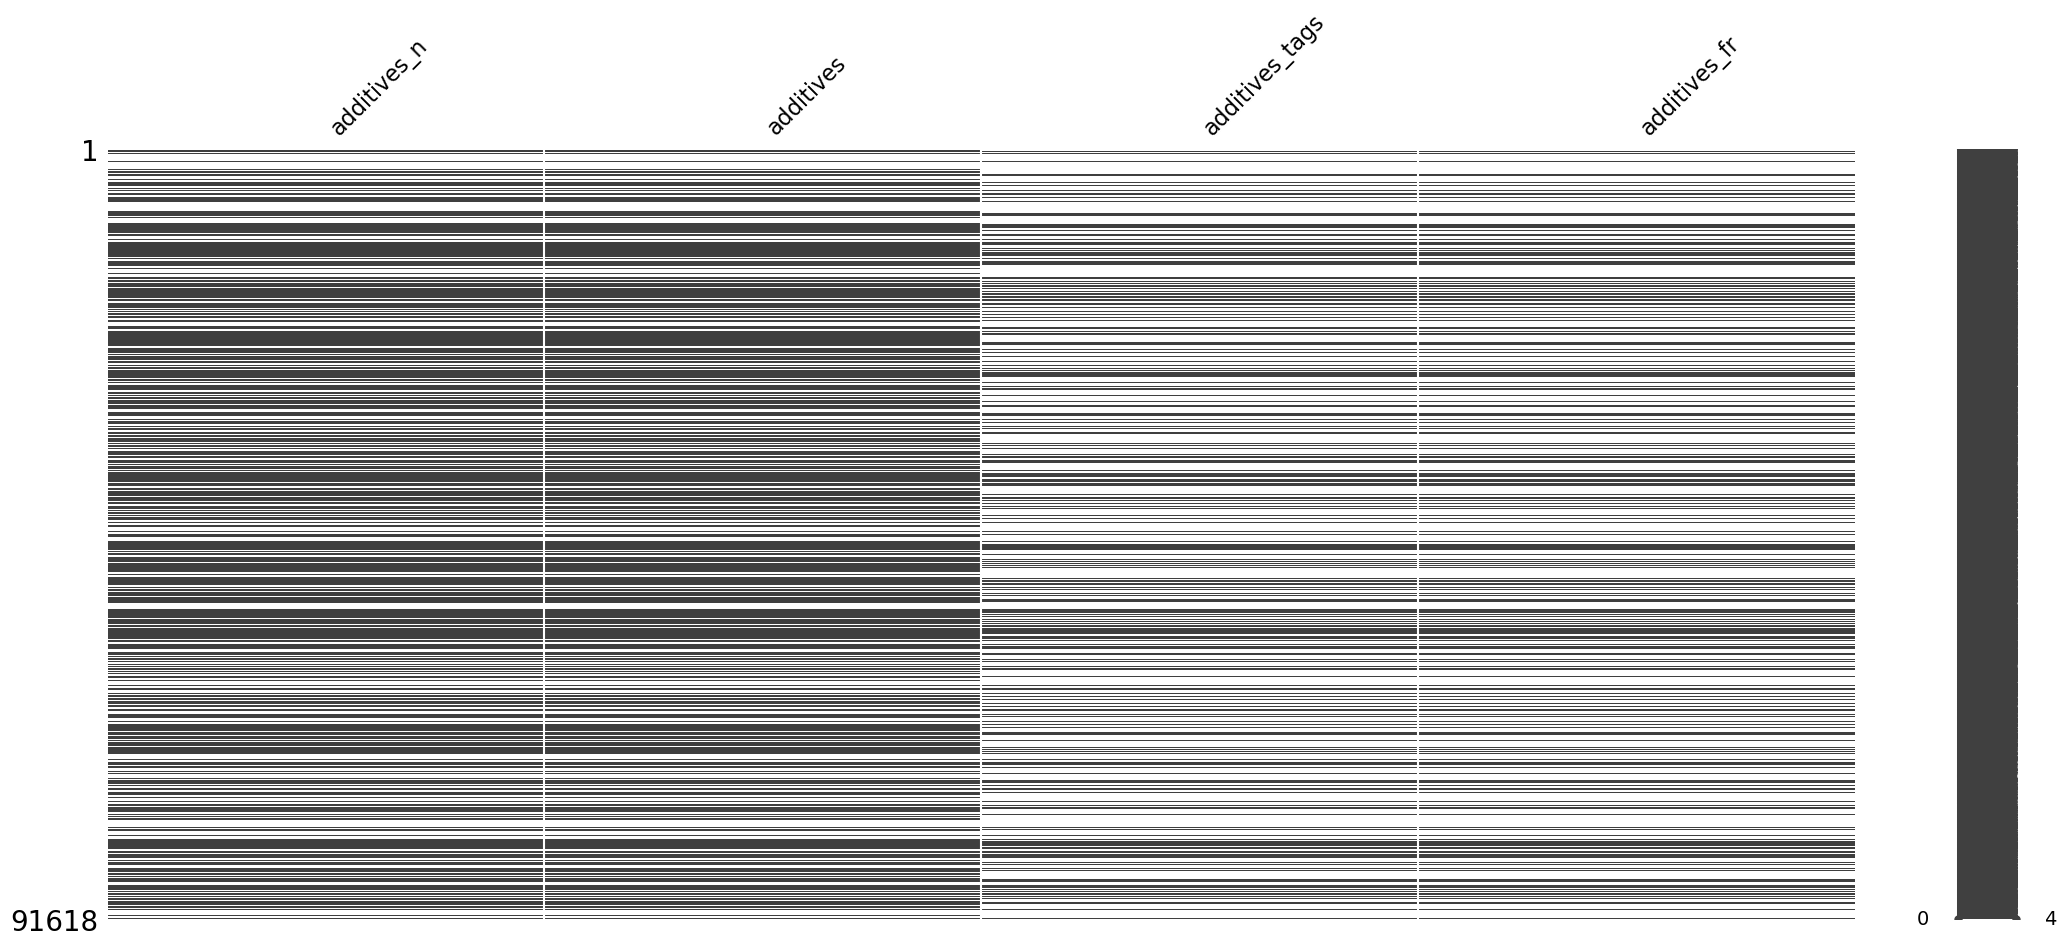

In [39]:
focusDuplicatedVar(dfood, 'additives')

In [40]:
compare_NaN(dfood, 'additives_tags','additives_fr')

#### Comparaison entre additives_tags et additives_fr

----------------------

Cas où additives_tags est renseigné mais pas additives_fr :                                0.0%
Cas où additives_fr est renseigné mais pas additives_tags :                                0.0%
Cas où additives_tags et additives_fr sont renseignés tous les deux :                      33.31878%


----------------------

----------------
La variable ***additives_n*** represente le nombre d'additifs renseignés dans les champs ***additives_tags*** et ***additives_fr***. <br>
Nous allons supprimer les variables ***additives*** et ***additives_tags*** et ***additives_fr***.

----------------

In [41]:
def ImputeModaliteNaN(data,col1, col2,Varlist=''):
    if Varlist=='':
        Varlist=[col1,col2]
        
    ListModalite=data[(data[col1].isna())][col2].unique().tolist()
    for modalite in ListModalite:        
        df=data[(data[col2]==modalite)][Varlist]
        df=df[col1].value_counts(ascending=False).reset_index().rename(columns={'index':col1,col1:'nombre'})
        if df.shape[0]>0:
            data.loc[(data[col1].isna())&(data[col2]==modalite),col1]=df.iloc[0,0]
        else:
            pass
        
    return data

ImputeModaliteNaN(dfood,'additives_n', 'pnns_groups_2',Varlist=['additives_n','additives_tags','additives_fr'])[['additives_n','additives_tags','additives_fr','pnns_groups_1','pnns_groups_2']]

additives_n additives_tags       additives_fr   pnns_groups_1  \
0               NaN            NaN                NaN             NaN   
46              0.0            NaN                NaN         unknown   
106             1.0        en:e322  E322 - Lécithines         unknown   
136             0.0            NaN                NaN         unknown   
138             0.0            NaN                NaN         unknown   
...             ...            ...                ...             ...   
320761          0.0            NaN                NaN             NaN   
320763          0.0            NaN                NaN       Beverages   
320764          NaN            NaN                NaN             NaN   
320765          0.0            NaN                NaN  Fish Meat Eggs   
320770          NaN            NaN                NaN             NaN   

                pnns_groups_2  
0                         NaN  
46                    unknown  
106                   unknown  
136                   unknown  
138                   unknown  
...                       ...  
320761    Alcoholic beverages  
320763  Non-sugared beverages  
320764                    NaN  
320765         Processed meat  
320770                    NaN  

[91618 rows x 5 columns]

#### Les variables ***Labels***

labels labels_tags labels_fr pnns_groups_1 pnns_groups_2
0      NaN         NaN       NaN           NaN           NaN
46     NaN         NaN       NaN       unknown       unknown
106    NaN         NaN       NaN       unknown       unknown
136    NaN         NaN       NaN       unknown       unknown
138    NaN         NaN       NaN       unknown       unknown

labels  \
320761                           AOC   
320763  AB,Bio européen,Max Havelaar   
320764                           NaN   
320765                           NaN   
320770                           NaN   

                                                                                labels_tags  \
320761                                                                               fr:aoc   
320763  en:fair-trade,en:organic,en:eu-organic,en:max-havelaar,fr:ab-agriculture-biologique   
320764                                                                                  NaN   
320765                                                                                  NaN   
320770                                                                                  NaN   

                                                                         labels_fr  \
320761                                                                         AOC   
320763  Commerce équitable,Bio,Bio européen,Max Havelaar,AB Agriculture Biologique   
320764                                                                         NaN   
320765                                                                         NaN   
320770                                                                         NaN   

         pnns_groups_1          pnns_groups_2  
320761             NaN    Alcoholic beverages  
320763       Beverages  Non-sugared beverages  
320764             NaN                    NaN  
320765  Fish Meat Eggs         Processed meat  
320770             NaN                    NaN

<AxesSubplot: >

#### Comparaison entre labels et labels_fr

----------------------

Cas où labels est renseigné mais pas labels_fr :                                           0.00218%
Cas où labels_fr est renseigné mais pas labels :                                           0.04475%
Cas où labels et labels_fr sont renseignés tous les deux :                                 38.18573%


----------------------

#### Comparaison entre labels et labels_tags

----------------------

Cas où labels est renseigné mais pas labels_tags :                                         0.00218%
Cas où labels_tags est renseigné mais pas labels :                                         0.04475%
Cas où labels et labels_tags sont renseignés tous les deux :                               38.18573%


----------------------

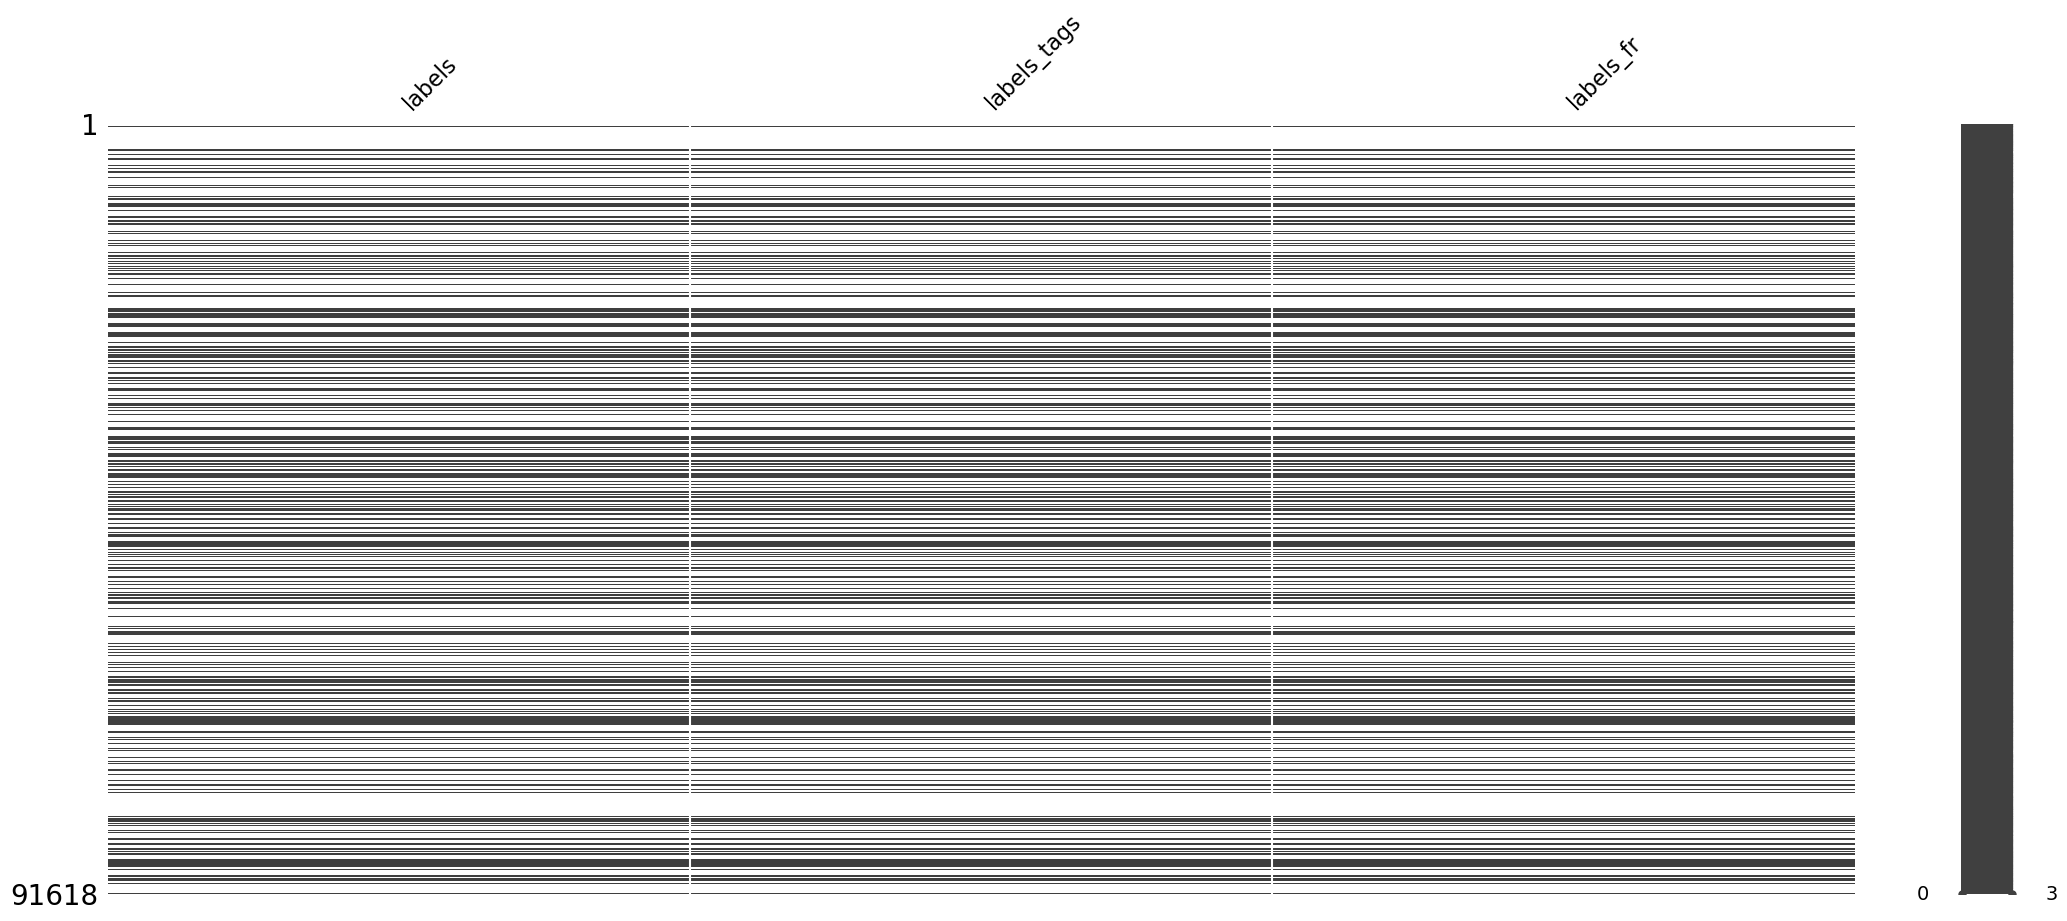

In [42]:
focusDuplicatedVar(dfood, 'labels')
compare_NaN(dfood, 'labels','labels_fr')
compare_NaN(dfood, 'labels','labels_tags')

#### Les autres variables

In [43]:
# varkeys=['allergens','brands','cities','emb_codes', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil',
#  'manufacturing_places', 'origins', 'packaging', 'states', 'traces']
# for var in varkeys: 
#     display(Markdown('------------------------------------'))       
#     display(Markdown('#### Les variables : {0}'.format(var)))
#     display(Markdown('------------------------------------'))
#     focusDuplicatedVar(dfood, var)
#     if var+'_fr' in dfood.columns:
#         compare_NaN(dfood, var,var+'_fr')
#     if var+'_tags' in dfood.columns:
#         compare_NaN(dfood, var,var+'_tags')
    

In [44]:
valeurUnique(dfood,['labels_fr','labels'])

labels_fr  \
0                                                                                          NaN   
182                                                 Bio,Bio européen,AB Agriculture Biologique   
184                                                                                 Point Vert   
279                                                              Point Vert,Fabriqué en France   
283                                                              Point Vert,Fabriqué en France   
...                                                                                        ...   
320604                         Sans conservateurs,Halal,Sans exhausteur de goût,Sans glutamate   
320605                                               Sans conservateurs,Halal,Sans-msg-ajoutes   
320630                                       Sans conservateurs,Halal,Sans-glutamate-de-sodium   
320648  Végétarien,Sans conservateurs,Végétalien,Halal,Sans cholestérol,Sans acides gras trans   
320681              Peu ou pas de sucre,Sans sucre,Ne-pas-donner-aux-enfants-de-moins-de-5-ans   

                                                                                   labels  
0                                                                                     NaN  
182                                                                                    AB  
184                                                                            Point Vert  
279                                                         Fabriqué en France,Point Vert  
283                                                         Point Vert,Fabriqué en France  
...                                                                                   ...  
320604                                            Halal,Sans conservateurs,Sans glutamate  
320605                                          Sans conservateurs,Sans MSG ajoutés,Halal  
320630                                  Sans conservateurs,Halal,Sans glutamate de sodium  
320648  Halal,Vegan,Végétarien,Sans conservateurs,Sans cholestérol,Sans acides gras trans  
320681                            Sans sucres,Ne pas donner aux enfants de moins de 5 ans  

[13355 rows x 2 columns]

------------------------------------

#### Les variables : allergens

------------------------------------

allergens allergens_fr pnns_groups_1 pnns_groups_2
0         NaN          NaN           NaN           NaN
46        NaN          NaN       unknown       unknown
106       NaN          NaN       unknown       unknown
136       NaN          NaN       unknown       unknown
138       NaN          NaN       unknown       unknown

allergens allergens_fr   pnns_groups_1          pnns_groups_2
320761       NaN          NaN             NaN    Alcoholic beverages
320763       NaN          NaN       Beverages  Non-sugared beverages
320764       NaN          NaN             NaN                    NaN
320765       NaN          NaN  Fish Meat Eggs         Processed meat
320770       NaN          NaN             NaN                    NaN

<AxesSubplot: >

#### Comparaison entre allergens et allergens_fr

----------------------

Cas où allergens est renseigné mais pas allergens_fr :                                     24.98636%
Cas où allergens_fr est renseigné mais pas allergens :                                     0.0%
Cas où allergens et allergens_fr sont renseignés tous les deux :                           0.0%


----------------------

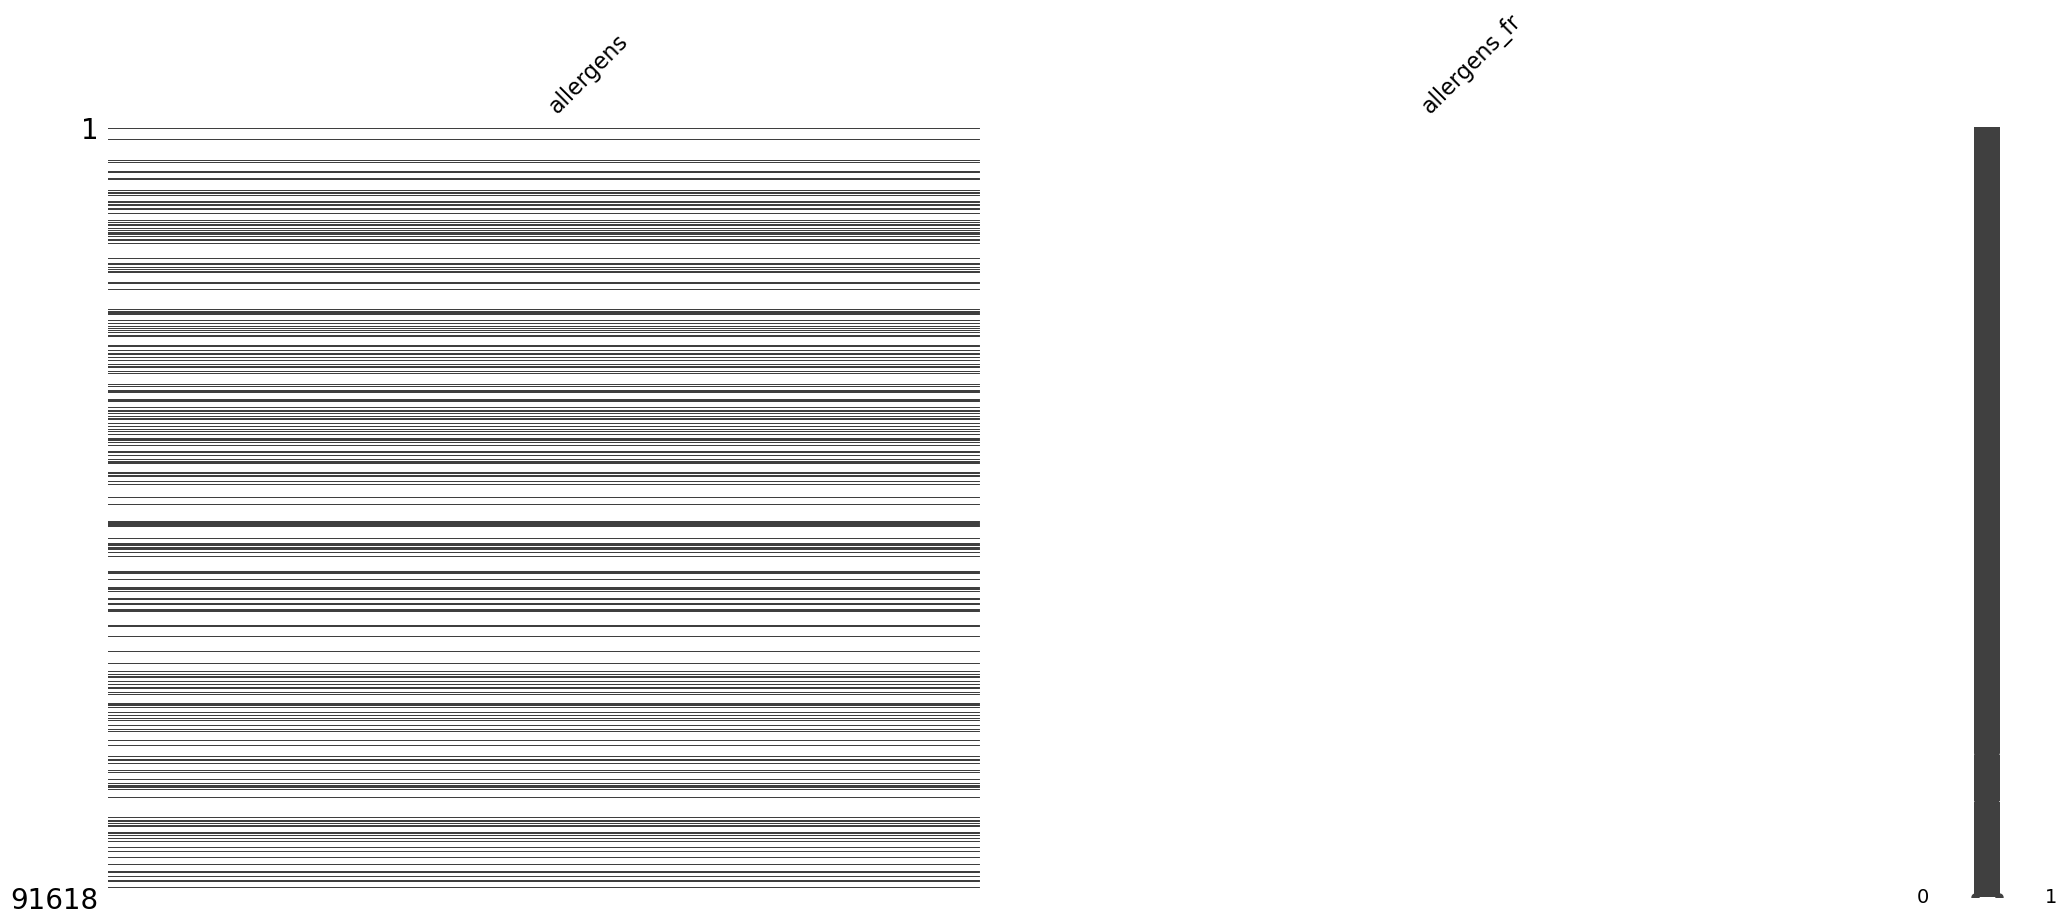

In [45]:
varkeys=['allergens']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

In [46]:
valeurUnique(dfood, ['allergens_fr', 'allergens'])

allergens_fr                                           allergens
0               NaN                                                 NaN
184             NaN                        Blé, Beurre, Oeufs, Noisette
242             NaN                               blé, oeufs, blé, lait
279             NaN                                blé, œufs, blé, lait
299             NaN                œufs, amande, beurre, blé, œufs, blé
...             ...                                                 ...
320162          NaN                                      noix de cajous
320591          NaN           soja, soja, blé, huître, poisson, poisson
320604          NaN    soja, soja, soja, blé, soja, crevette, crevettes
320605          NaN  soja, cacahuète, soja, poisson, poisson, crevettes
320611          NaN                                    Poisson, Poisson

[9972 rows x 2 columns]

------------------------------------

#### Les variables : brands

------------------------------------

brands      brands_tags pnns_groups_1 pnns_groups_2
0    Ferme t'y R'nao  ferme-t-y-r-nao           NaN           NaN
46               NaN              NaN       unknown       unknown
106         Sunridge         sunridge       unknown       unknown
136              NaN              NaN       unknown       unknown
138   Twix, Lundberg    twix,lundberg       unknown       unknown

brands            brands_tags   pnns_groups_1  \
320761     Roussette du Bugey     roussette-du-bugey             NaN   
320763                Lobodis                lobodis       Beverages   
320764                    NaN                    NaN             NaN   
320765  Sans marque,D.Lambert  sans-marque,d-lambert  Fish Meat Eggs   
320770                  Knorr                  knorr             NaN   

                pnns_groups_2  
320761    Alcoholic beverages  
320763  Non-sugared beverages  
320764                    NaN  
320765         Processed meat  
320770                    NaN

<AxesSubplot: >

#### Comparaison entre brands et brands_tags

----------------------

Cas où brands est renseigné mais pas brands_tags :                                         0.00655%
Cas où brands_tags est renseigné mais pas brands :                                         0.00218%
Cas où brands et brands_tags sont renseignés tous les deux :                               93.58641%


----------------------

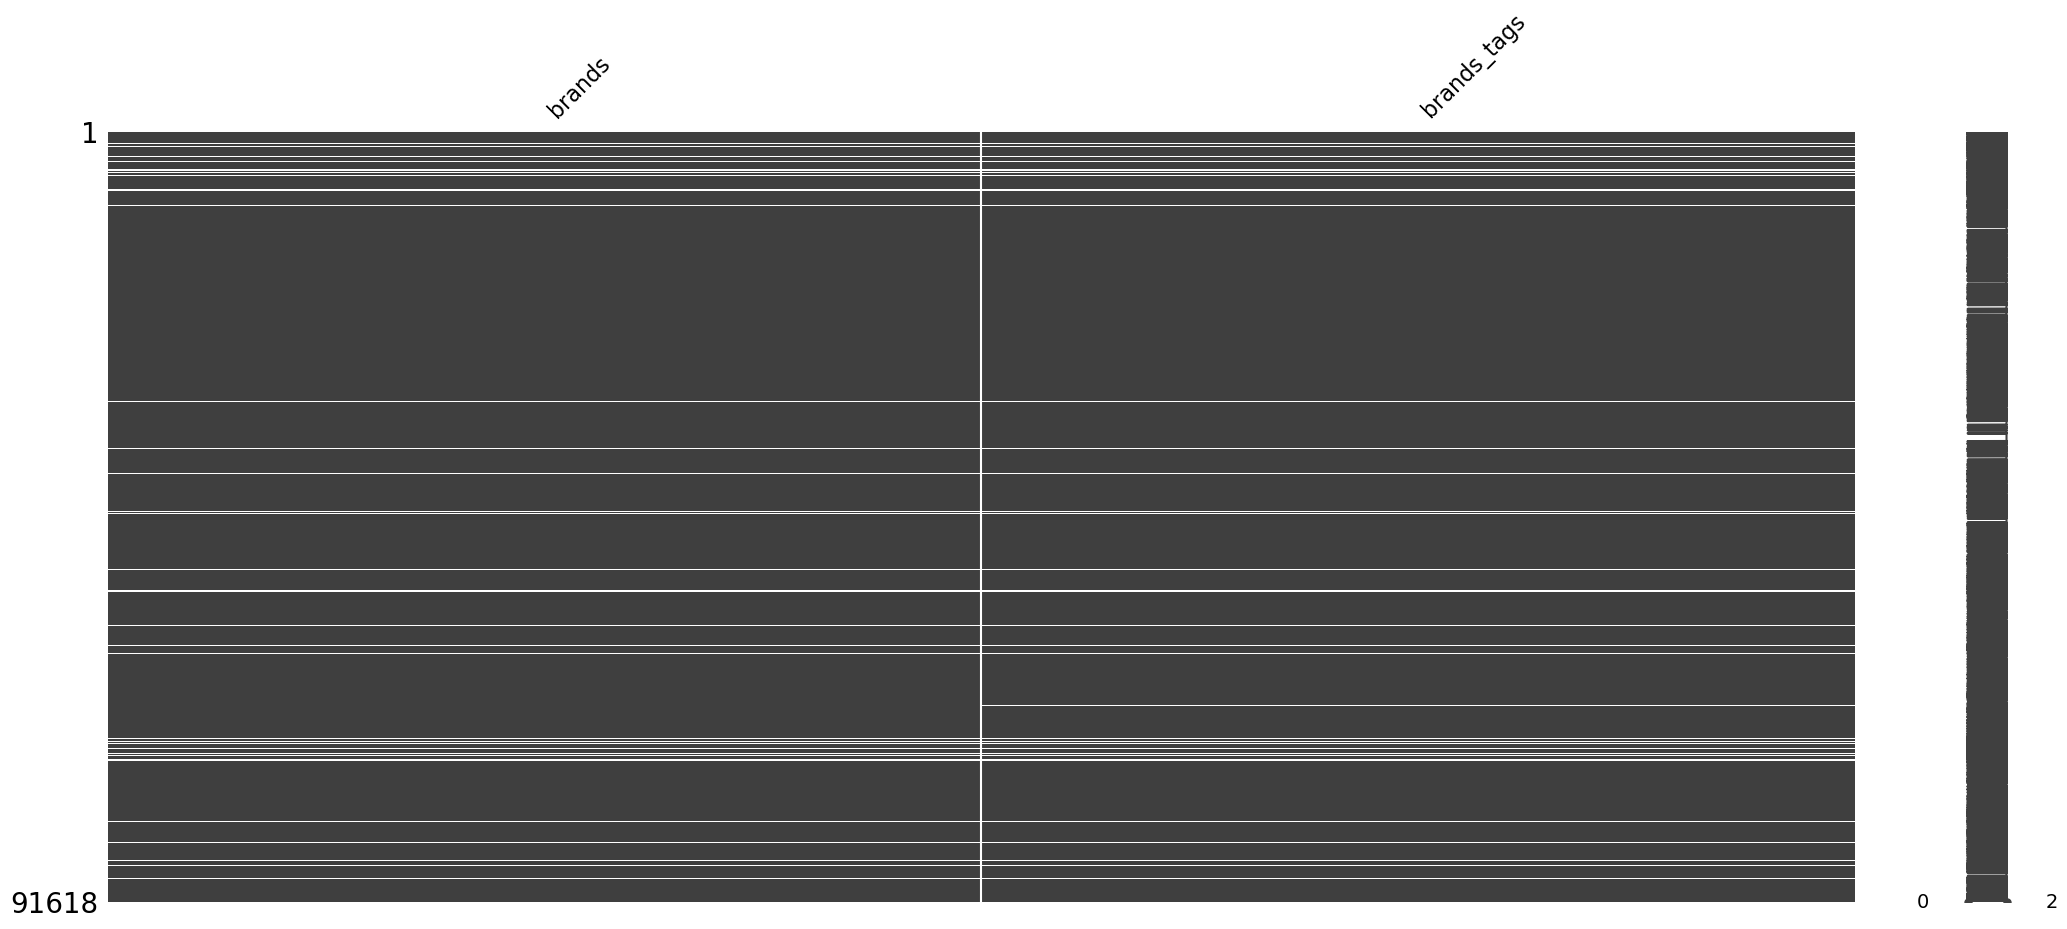

In [47]:
varkeys=['brands']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

In [48]:
valeurUnique(dfood, ['brands', 'brands_tags'])

brands            brands_tags
0             Ferme t'y R'nao        ferme-t-y-r-nao
46                        NaN                    NaN
106                  Sunridge               sunridge
138            Twix, Lundberg          twix,lundberg
182          Bertrand Lejeune       bertrand-lejeune
...                       ...                    ...
320741                 Hatier                 hatier
320757                 Biosic                 biosic
320758            L. Boulaire             l-boulaire
320761     Roussette du Bugey     roussette-du-bugey
320765  Sans marque,D.Lambert  sans-marque,d-lambert

[21009 rows x 2 columns]

------------------------------------

#### Les variables : cities

------------------------------------

cities cities_tags pnns_groups_1 pnns_groups_2
0      NaN         NaN           NaN           NaN
46     NaN         NaN       unknown       unknown
106    NaN         NaN       unknown       unknown
136    NaN         NaN       unknown       unknown
138    NaN         NaN       unknown       unknown

cities cities_tags   pnns_groups_1          pnns_groups_2
320761    NaN         NaN             NaN    Alcoholic beverages
320763    NaN         NaN       Beverages  Non-sugared beverages
320764    NaN         NaN             NaN                    NaN
320765    NaN         NaN  Fish Meat Eggs         Processed meat
320770    NaN         NaN             NaN                    NaN

<AxesSubplot: >

#### Comparaison entre cities et cities_tags

----------------------

Cas où cities est renseigné mais pas cities_tags :                                         0.0%
Cas où cities_tags est renseigné mais pas cities :                                         21.75664%
Cas où cities et cities_tags sont renseignés tous les deux :                               0.0%


----------------------

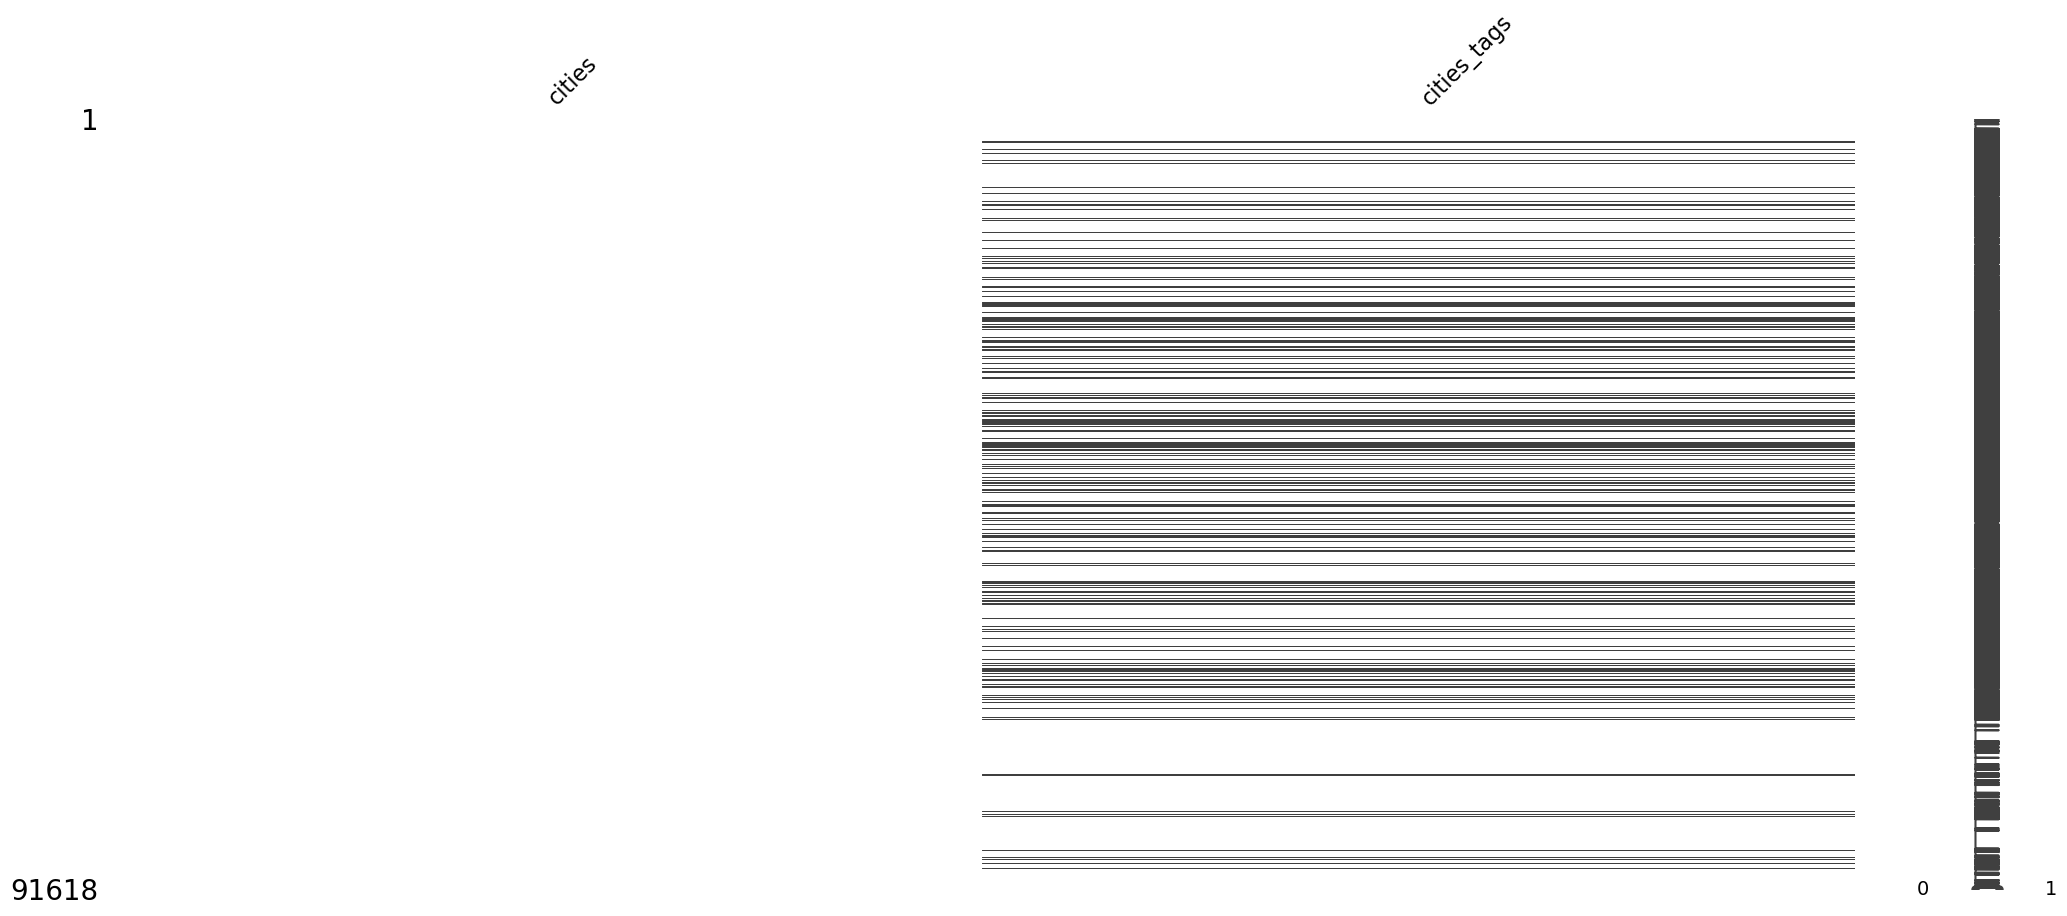

In [49]:
varkeys=['cities']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

In [50]:
valeurUnique(dfood, ['cities', 'cities_tags'])

cities                                              cities_tags
0         NaN                                                      NaN
284       NaN                          brignemont-haute-garonne-france
16580     NaN                   saint-didier-au-mont-d-or-rhone-france
19571     NaN                                     donzere-drome-france
65620     NaN                        saint-alban-les-eaux-loire-france
...       ...                                                      ...
312107    NaN      vitre-ille-et-vilaine-france,abbeville-somme-france
312113    NaN                           plounerin-cotes-d-armor-france
317125    NaN                                        luchy-oise-france
317391    NaN  evry-essonne-france,verrieres-le-buisson-essonne-france
320758    NaN                            arles-bouches-du-rhone-france

[2542 rows x 2 columns]

------------------------------------

#### Les variables : emb_codes

------------------------------------

emb_codes emb_codes_tags pnns_groups_1 pnns_groups_2
0         NaN            NaN           NaN           NaN
46        NaN            NaN       unknown       unknown
106       NaN            NaN       unknown       unknown
136       NaN            NaN       unknown       unknown
138       NaN            NaN       unknown       unknown

emb_codes emb_codes_tags   pnns_groups_1          pnns_groups_2
320761       NaN            NaN             NaN    Alcoholic beverages
320763       NaN            NaN       Beverages  Non-sugared beverages
320764       NaN            NaN             NaN                    NaN
320765       NaN            NaN  Fish Meat Eggs         Processed meat
320770       NaN            NaN             NaN                    NaN

<AxesSubplot: >

#### Comparaison entre emb_codes et emb_codes_tags

----------------------

Cas où emb_codes est renseigné mais pas emb_codes_tags :                                   0.0%
Cas où emb_codes_tags est renseigné mais pas emb_codes :                                   0.0%
Cas où emb_codes et emb_codes_tags sont renseignés tous les deux :                         25.12498%


----------------------

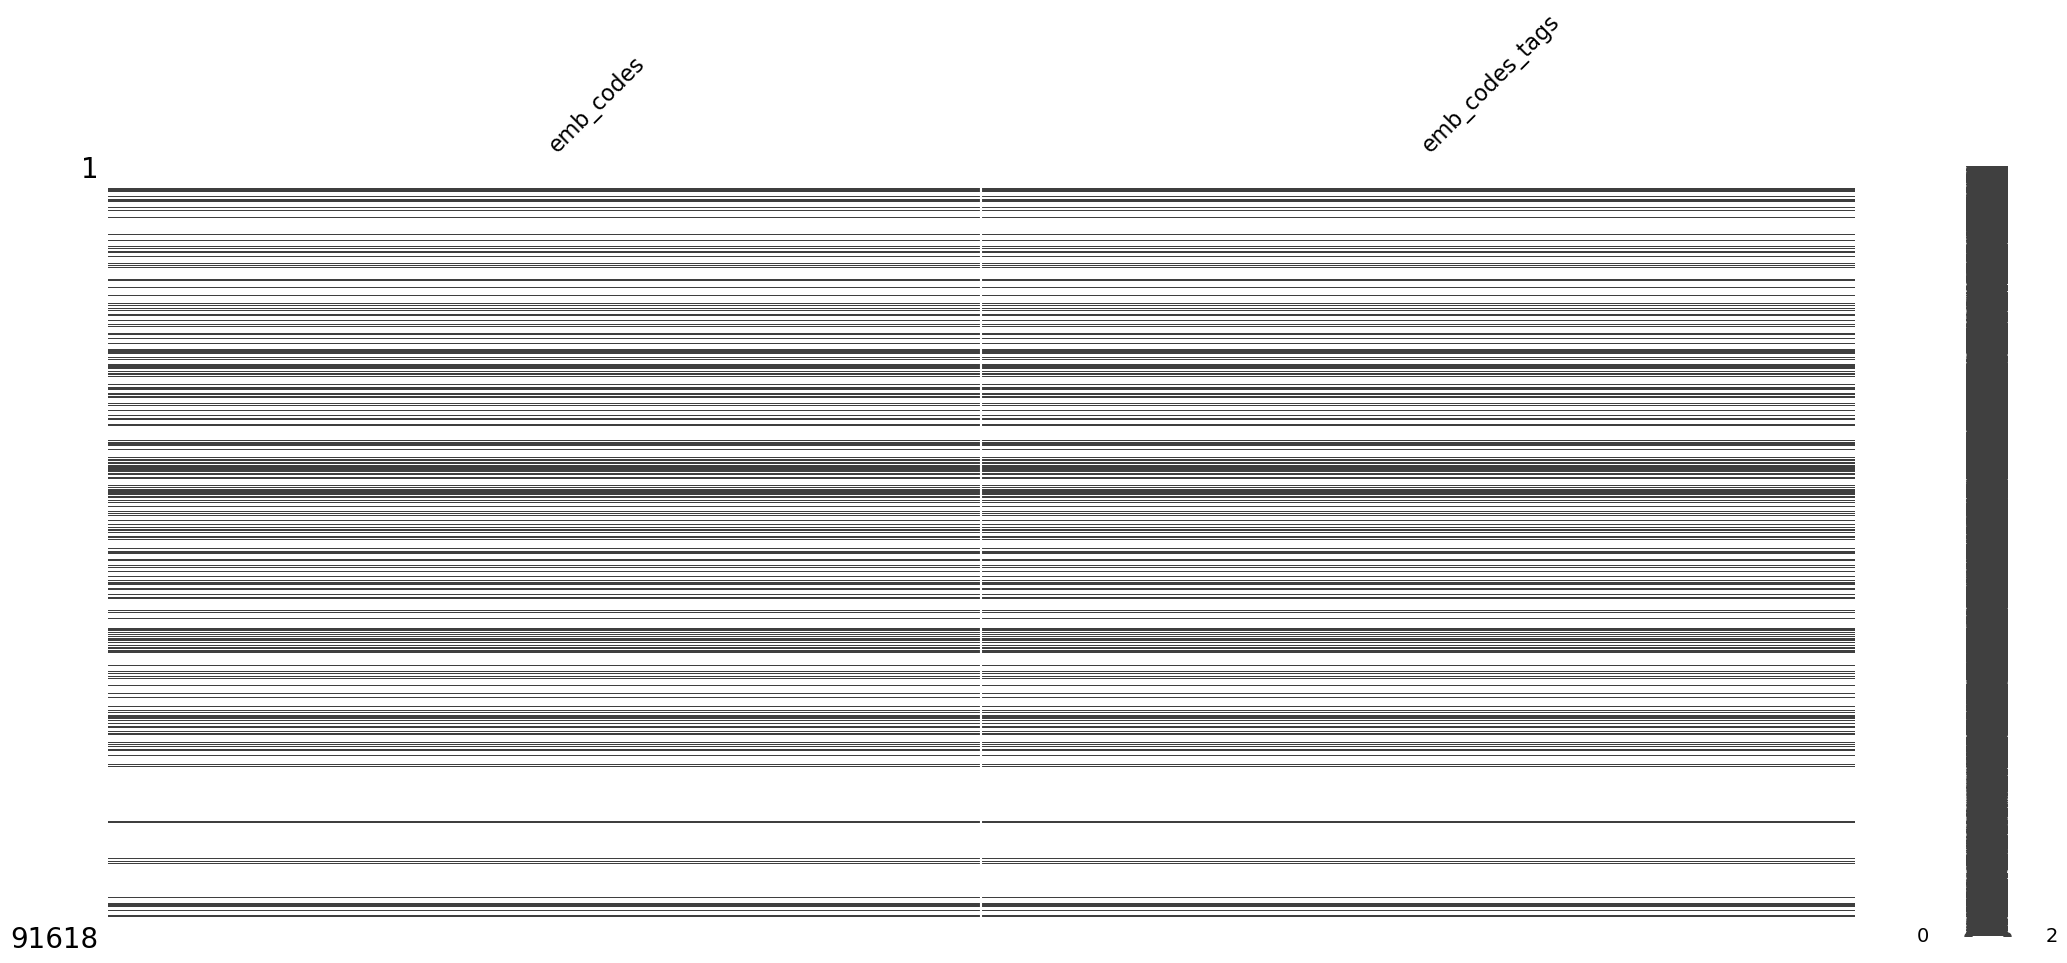

In [51]:
varkeys=['emb_codes']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

In [52]:
dfood.loc[dfood['emb_codes_tags'].notnull(),:][['emb_codes','emb_codes_tags','pnns_groups_1','pnns_groups_2']]

emb_codes        emb_codes_tags            pnns_groups_1  \
284         FR 31.090.010 EC      fr-31-090-010-ec           Fish Meat Eggs   
526               UK 2265 EC            uk-2265-ec                  unknown   
680              UK IN003 EC           uk-in003-ec          Composite foods   
695              UK PF300 EC           uk-pf300-ec  Milk and dairy products   
894              UK LR006 EC           uk-lr006-ec          Composite foods   
...                      ...                   ...                      ...   
320493             EMB 91114             emb-91114                  unknown   
320497             EMB 91114             emb-91114                  unknown   
320668  EMB 21464,EBM 26174B  emb-21464,ebm-26174b                Beverages   
320726      NORGE M-314 EFTA      norge-m-314-efta           Fish Meat Eggs   
320758             EMB 13004             emb-13004            Sugary snacks   

           pnns_groups_2  
284                 Meat  
526              unknown  
680       One-dish meals  
695               Cheese  
894       One-dish meals  
...                  ...  
320493           unknown  
320497           unknown  
320668      Fruit juices  
320726  Fish and seafood  
320758            Sweets  

[23019 rows x 4 columns]

------------------------------------

#### Les variables : ingredients_from_palm_oil

------------------------------------

ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
0                            NaN                        NaN   
46                           NaN                        NaN   
106                          0.0                        NaN   
136                          NaN                        NaN   
138                          NaN                        NaN   

    ingredients_from_palm_oil_tags pnns_groups_1 pnns_groups_2  
0                              NaN           NaN           NaN  
46                             NaN       unknown       unknown  
106                            NaN       unknown       unknown  
136                            NaN       unknown       unknown  
138                            NaN       unknown       unknown

ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
320761                          NaN                        NaN   
320763                          0.0                        NaN   
320764                          NaN                        NaN   
320765                          0.0                        NaN   
320770                          NaN                        NaN   

       ingredients_from_palm_oil_tags   pnns_groups_1          pnns_groups_2  
320761                            NaN             NaN    Alcoholic beverages  
320763                            NaN       Beverages  Non-sugared beverages  
320764                            NaN             NaN                    NaN  
320765                            NaN  Fish Meat Eggs         Processed meat  
320770                            NaN             NaN                    NaN

<AxesSubplot: >

#### Comparaison entre ingredients_from_palm_oil et ingredients_from_palm_oil_tags

----------------------

Cas où ingredients_from_palm_oil est renseigné mais pas ingredients_from_palm_oil_tags :   0.0%
Cas où ingredients_from_palm_oil_tags est renseigné mais pas ingredients_from_palm_oil :   4.01995%
Cas où ingredients_from_palm_oil et ingredients_from_palm_oil_tags sont renseignés tous les deux : 0.0%


----------------------

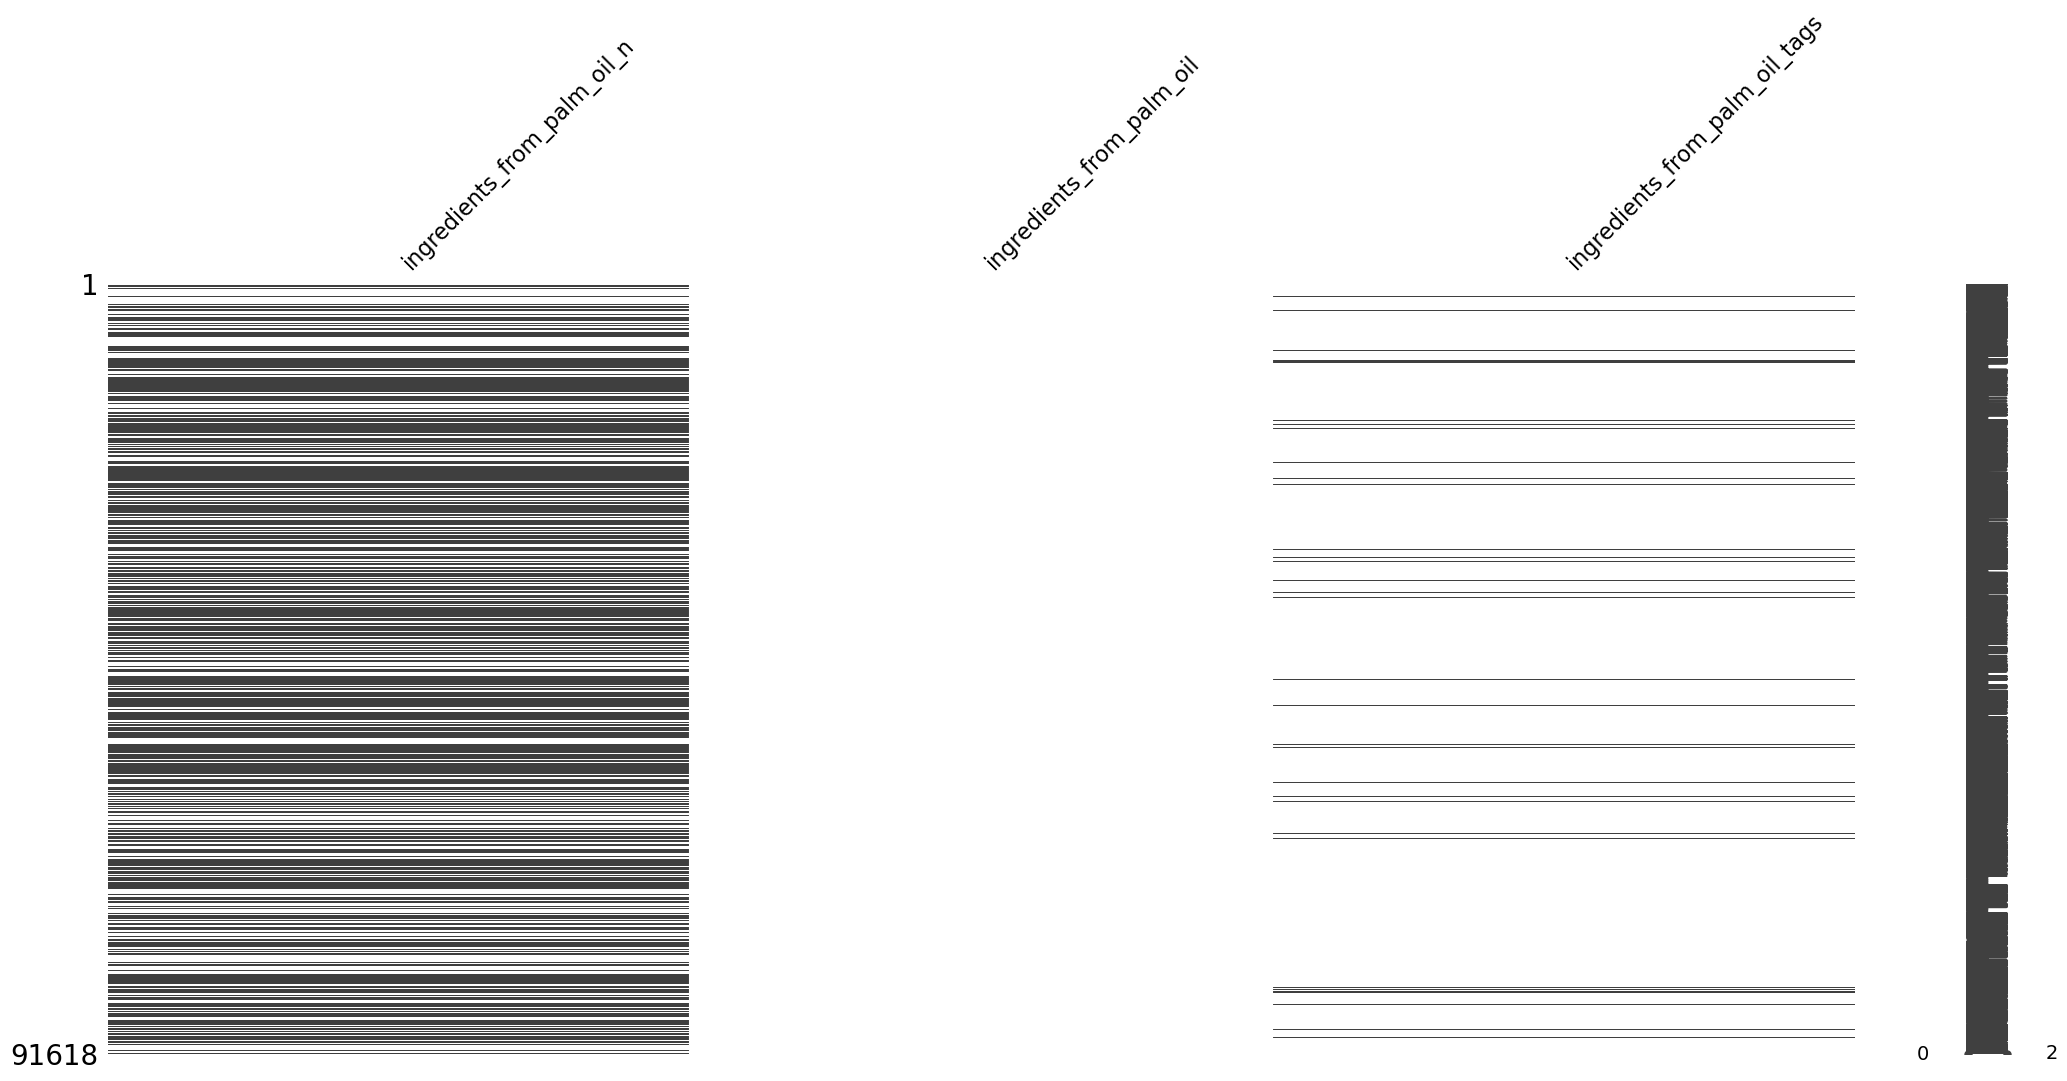

In [53]:
varkeys=['ingredients_from_palm_oil']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

In [54]:
valeurUnique(dfood, ['ingredients_from_palm_oil_n','ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags'])

ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
0                               NaN                        NaN   
106                             0.0                        NaN   
509                             1.0                        NaN   
112758                          1.0                        NaN   
154960                          1.0                        NaN   
176625                          2.0                        NaN   
179370                          2.0                        NaN   
185135                          1.0                        NaN   
187174                          2.0                        NaN   
198922                          2.0                        NaN   
204267                          2.0                        NaN   
220056                          2.0                        NaN   
220108                          2.0                        NaN   
252988                          1.0                        NaN   
270379                          2.0                        NaN   
291551                          2.0                        NaN   

                                    ingredients_from_palm_oil_tags  
0                                                              NaN  
106                                                            NaN  
509                                                 huile-de-palme  
112758                                  e304-palmitate-d-ascorbyle  
154960                                             oleine-de-palme  
176625                   huile-de-palme,e304-palmitate-d-ascorbyle  
179370  huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme  
185135                 mono-et-diglycerides-d-acides-gras-de-palme  
187174                   e304-palmitate-d-ascorbyle,huile-de-palme  
198922                            huile-de-palme,stearine-de-palme  
204267                              huile-de-palme,oleine-de-palme  
220056  mono-et-diglycerides-d-acides-gras-de-palme,huile-de-palme  
220108                              oleine-de-palme,huile-de-palme  
252988                                           stearine-de-palme  
270379                            stearine-de-palme,huile-de-palme  
291551                  oleine-de-palme,e304-palmitate-d-ascorbyle

------------------------------------

#### Les variables : ingredients_that_may_be_from_palm_oil

------------------------------------

ingredients_that_may_be_from_palm_oil_n  \
0                                        NaN   
46                                       NaN   
106                                      0.0   
136                                      NaN   
138                                      NaN   

     ingredients_that_may_be_from_palm_oil  \
0                                      NaN   
46                                     NaN   
106                                    NaN   
136                                    NaN   
138                                    NaN   

    ingredients_that_may_be_from_palm_oil_tags pnns_groups_1 pnns_groups_2  
0                                          NaN           NaN           NaN  
46                                         NaN       unknown       unknown  
106                                        NaN       unknown       unknown  
136                                        NaN       unknown       unknown  
138                                        NaN       unknown       unknown

ingredients_that_may_be_from_palm_oil_n  \
320761                                      NaN   
320763                                      0.0   
320764                                      NaN   
320765                                      0.0   
320770                                      NaN   

        ingredients_that_may_be_from_palm_oil  \
320761                                    NaN   
320763                                    NaN   
320764                                    NaN   
320765                                    NaN   
320770                                    NaN   

       ingredients_that_may_be_from_palm_oil_tags   pnns_groups_1  \
320761                                        NaN             NaN   
320763                                        NaN       Beverages   
320764                                        NaN             NaN   
320765                                        NaN  Fish Meat Eggs   
320770                                        NaN             NaN   

                pnns_groups_2  
320761    Alcoholic beverages  
320763  Non-sugared beverages  
320764                    NaN  
320765         Processed meat  
320770                    NaN

<AxesSubplot: >

#### Comparaison entre ingredients_that_may_be_from_palm_oil et ingredients_that_may_be_from_palm_oil_tags

----------------------

Cas où ingredients_that_may_be_from_palm_oil est renseigné mais pas ingredients_that_may_be_from_palm_oil_tags : 0.0%
Cas où ingredients_that_may_be_from_palm_oil_tags est renseigné mais pas ingredients_that_may_be_from_palm_oil : 6.84036%
Cas où ingredients_that_may_be_from_palm_oil et ingredients_that_may_be_from_palm_oil_tags sont renseignés tous les deux : 0.0%


----------------------

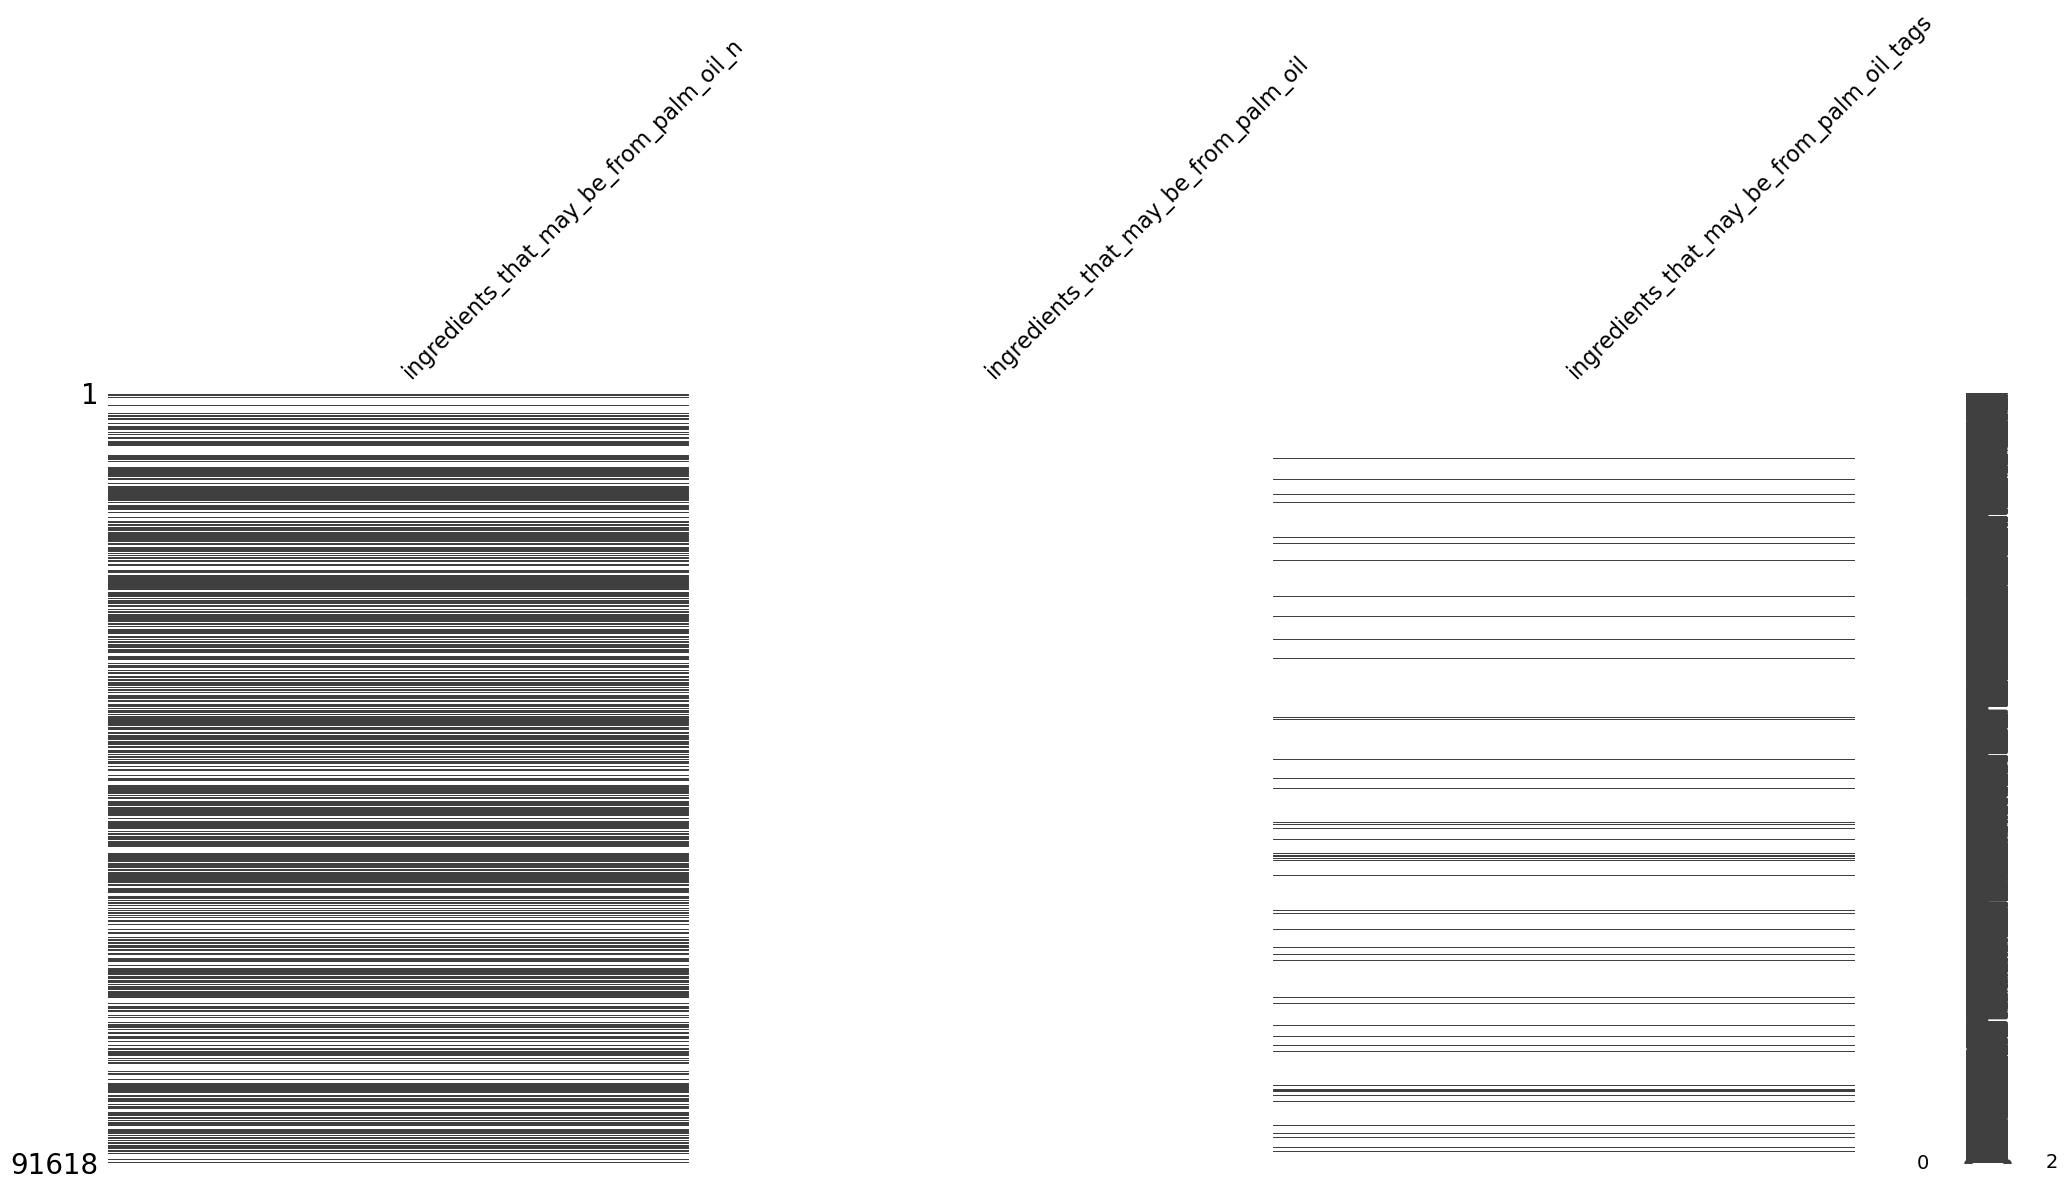

In [55]:
varkeys=['ingredients_that_may_be_from_palm_oil']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

------------------------------------

#### Les variables : manufacturing_places

------------------------------------

manufacturing_places manufacturing_places_tags pnns_groups_1 pnns_groups_2
0                    NaN                       NaN           NaN           NaN
46                   NaN                       NaN       unknown       unknown
106                  NaN                       NaN       unknown       unknown
136                  NaN                       NaN       unknown       unknown
138                  NaN                       NaN       unknown       unknown

manufacturing_places manufacturing_places_tags   pnns_groups_1  \
320761                  NaN                       NaN             NaN   
320763                  NaN                       NaN       Beverages   
320764                  NaN                       NaN             NaN   
320765                  NaN                       NaN  Fish Meat Eggs   
320770                  NaN                       NaN             NaN   

                pnns_groups_2  
320761    Alcoholic beverages  
320763  Non-sugared beverages  
320764                    NaN  
320765         Processed meat  
320770                    NaN

<AxesSubplot: >

#### Comparaison entre manufacturing_places et manufacturing_places_tags

----------------------

Cas où manufacturing_places est renseigné mais pas manufacturing_places_tags :             0.00437%
Cas où manufacturing_places_tags est renseigné mais pas manufacturing_places :             0.0%
Cas où manufacturing_places et manufacturing_places_tags sont renseignés tous les deux :   28.47803%


----------------------

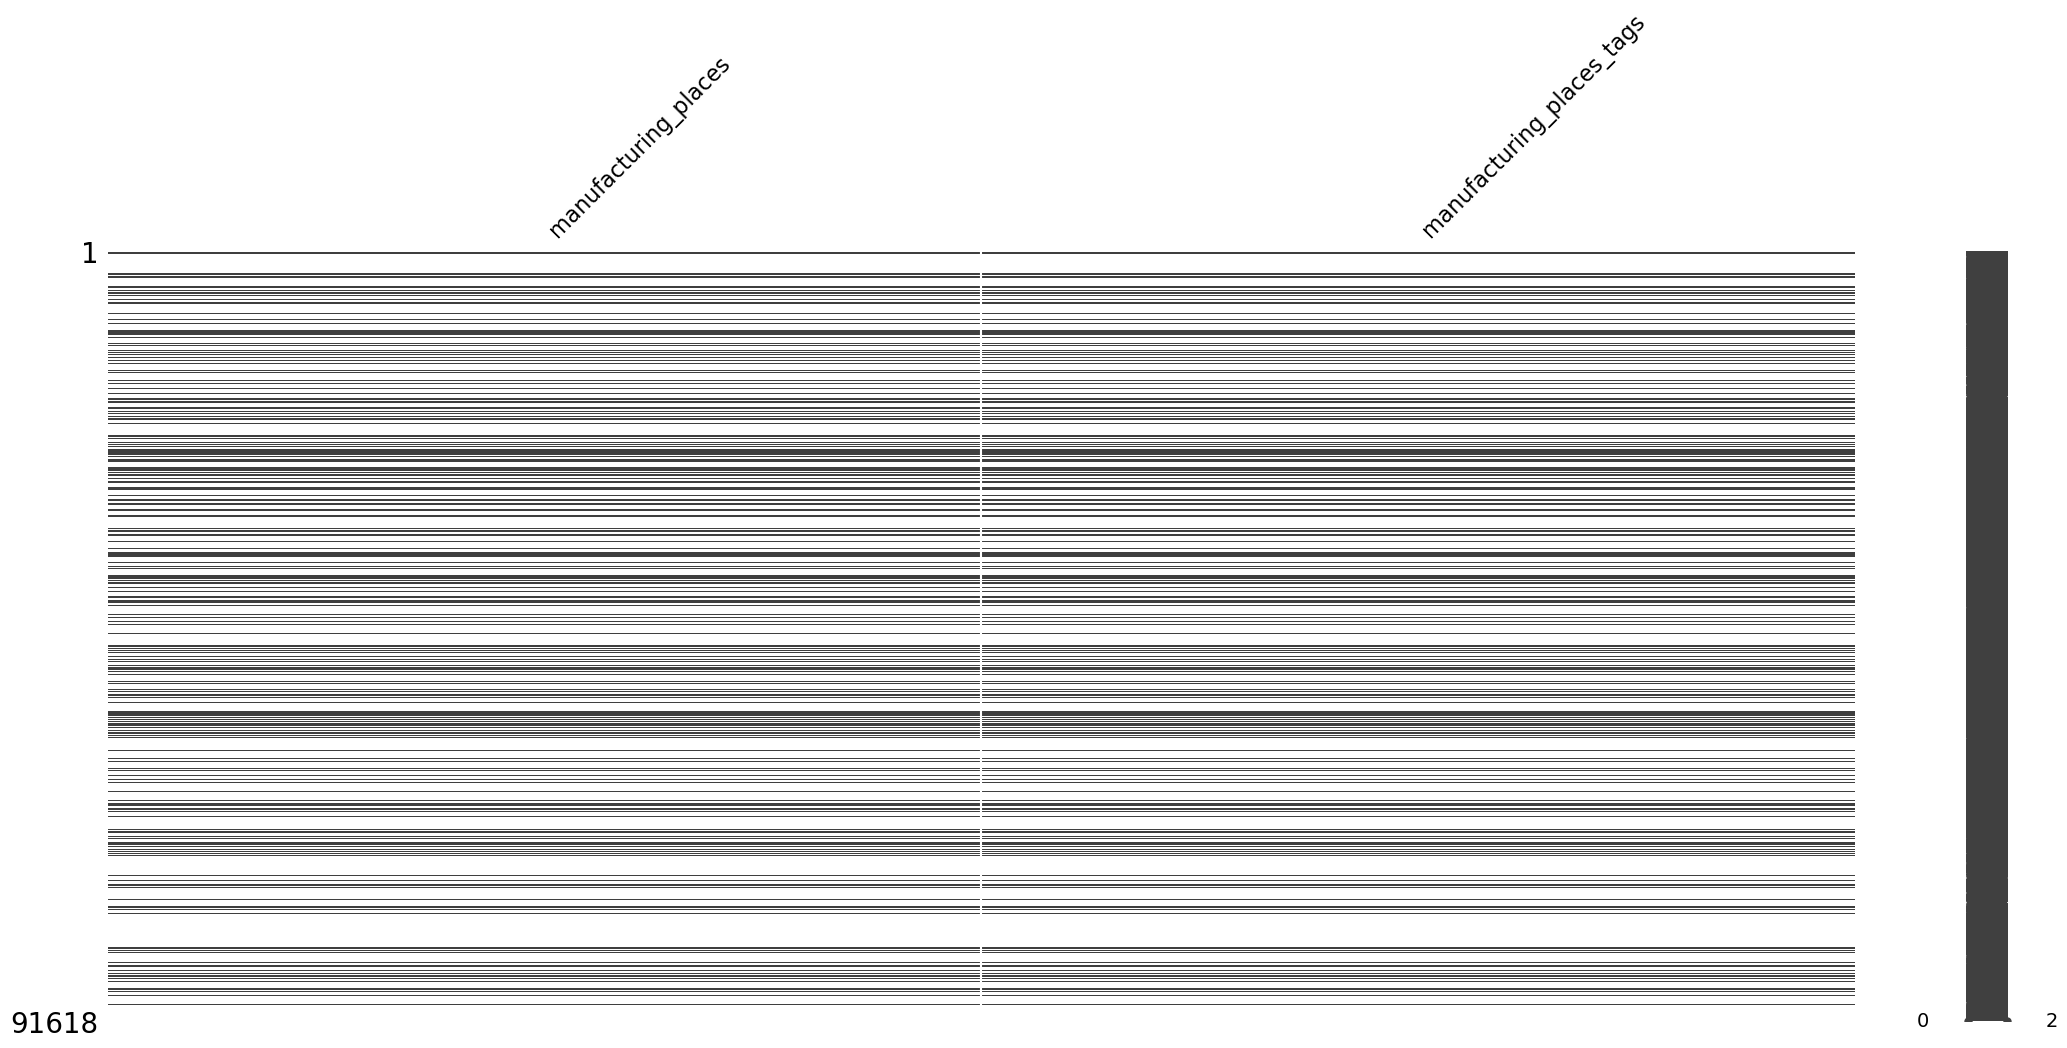

In [56]:
varkeys=['manufacturing_places']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

In [57]:
valeurUnique(dfood, ['manufacturing_places', 'manufacturing_places_tags'])

manufacturing_places           manufacturing_places_tags
0                                      NaN                                 NaN
184                       France,Avranches                    france,avranches
188                                 France                              france
283     France,Limousin,87500,Saint-Yrieux  france,limousin,87500,saint-yrieux
299                           France,87500                        france,87500
...                                    ...                                 ...
318284         Saint-Martin-en-Haut,France         saint-martin-en-haut,france
318568                         Les Essarts                         les-essarts
318895                           Australie                           australie
320449                Auckland,New Zealand                auckland,new-zealand
320493    République coopérative du Guyana    republique-cooperative-du-guyana

[4706 rows x 2 columns]

------------------------------------

#### Les variables : origins

------------------------------------

origins origins_tags pnns_groups_1 pnns_groups_2
0       NaN          NaN           NaN           NaN
46      NaN          NaN       unknown       unknown
106     NaN          NaN       unknown       unknown
136     NaN          NaN       unknown       unknown
138     NaN          NaN       unknown       unknown

origins       origins_tags   pnns_groups_1  \
320761  Flaxieu,Bugey,Ain  flaxieu,bugey,ain             NaN   
320763                NaN                NaN       Beverages   
320764                NaN                NaN             NaN   
320765                NaN                NaN  Fish Meat Eggs   
320770                NaN                NaN             NaN   

                pnns_groups_2  
320761    Alcoholic beverages  
320763  Non-sugared beverages  
320764                    NaN  
320765         Processed meat  
320770                    NaN

<AxesSubplot: >

#### Comparaison entre origins et origins_tags

----------------------

Cas où origins est renseigné mais pas origins_tags :                                       0.00982%
Cas où origins_tags est renseigné mais pas origins :                                       0.0%
Cas où origins et origins_tags sont renseignés tous les deux :                             16.78928%


----------------------

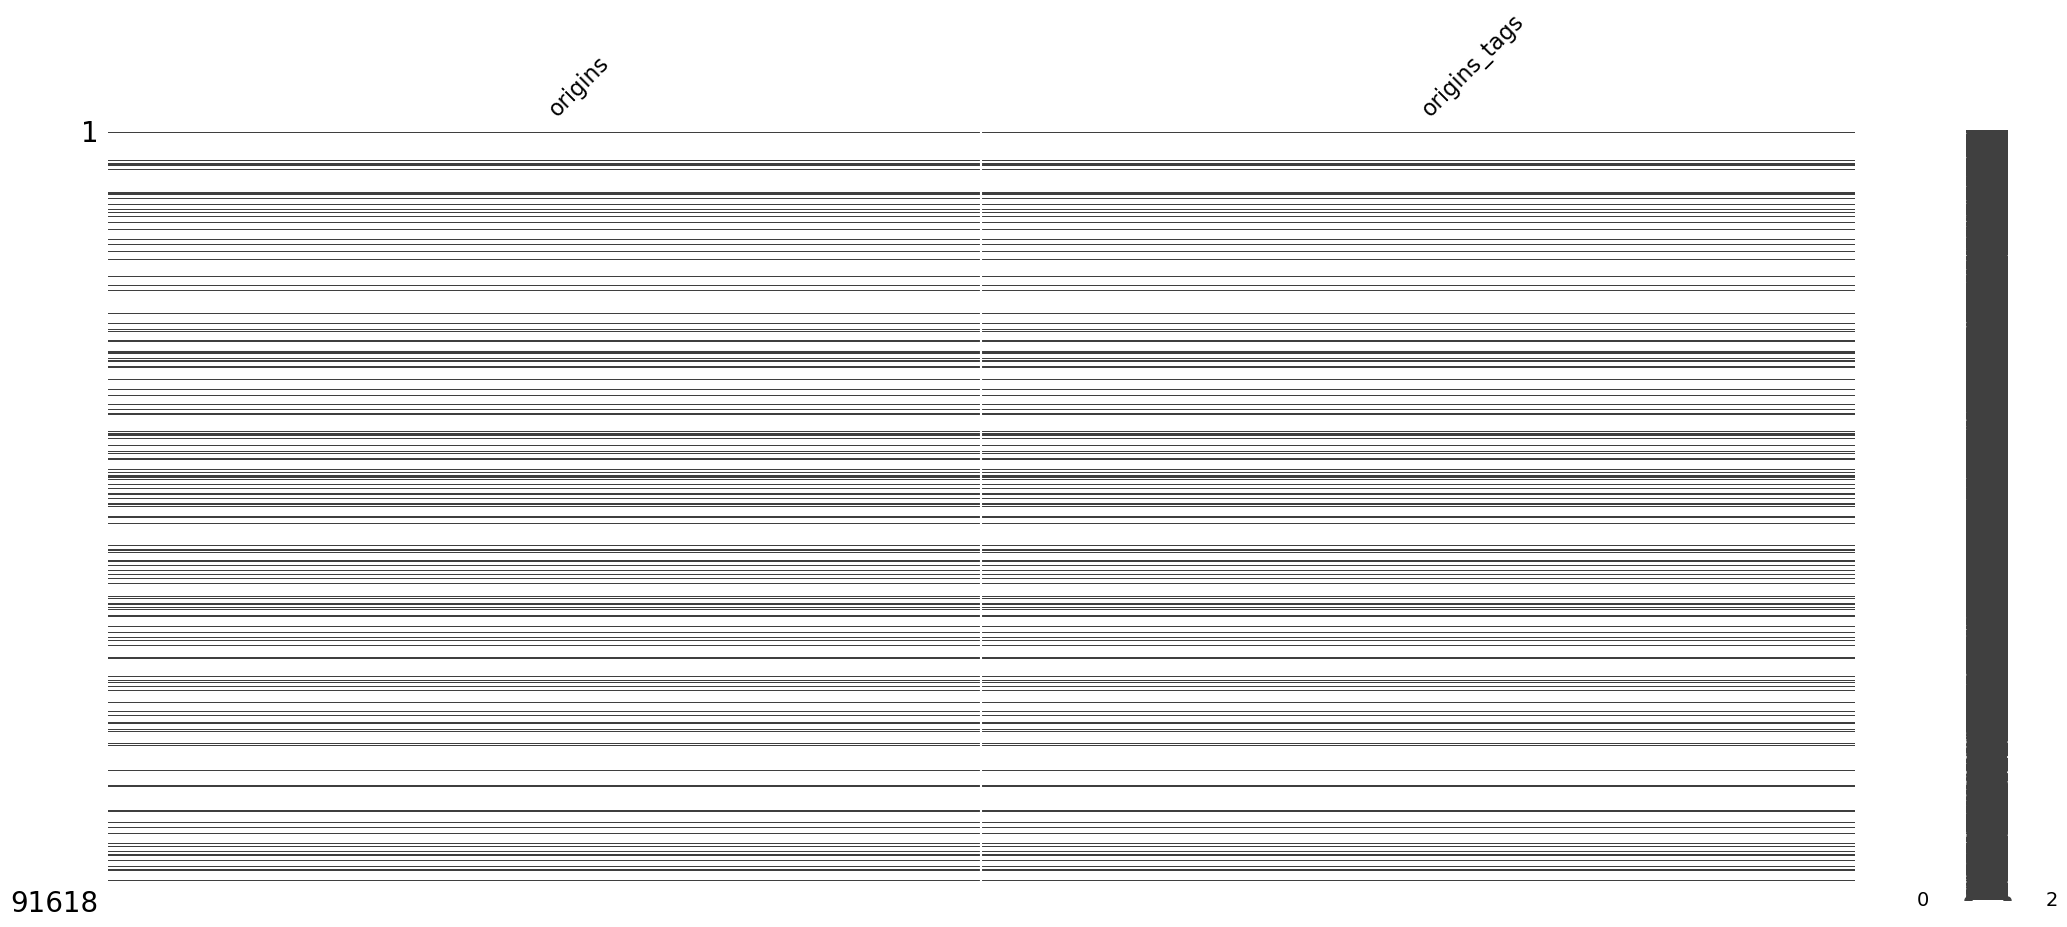

In [58]:
varkeys=['origins']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

In [59]:
valeurUnique(dfood, ['origins', 'origins_tags'])

origins         origins_tags
0                       NaN                  NaN
284                  France               france
526             Royaume-Uni          royaume-uni
680      Europe,Royaume-Uni   europe,royaume-uni
894     Espagne,Royaume-Uni  espagne,royaume-uni
...                     ...                  ...
320437           Neuseeland           neuseeland
320578   Thaïlande,Malaisie   thailande,malaisie
320600   Indonésie,Malaisie   indonesie,malaisie
320726               Norway               norway
320761    Flaxieu,Bugey,Ain    flaxieu,bugey,ain

[3450 rows x 2 columns]

------------------------------------

#### Les variables : packaging

------------------------------------

packaging packaging_tags pnns_groups_1 pnns_groups_2
0          NaN            NaN           NaN           NaN
46   plastique      plastique       unknown       unknown
106        NaN            NaN       unknown       unknown
136        NaN            NaN       unknown       unknown
138        NaN            NaN       unknown       unknown

packaging      packaging_tags   pnns_groups_1  \
320761  Bouteille en verre  bouteille-en-verre             NaN   
320763        boîte,carton        boite,carton       Beverages   
320764                 NaN                 NaN             NaN   
320765           Pot,Verre           pot,verre  Fish Meat Eggs   
320770                 NaN                 NaN             NaN   

                pnns_groups_2  
320761    Alcoholic beverages  
320763  Non-sugared beverages  
320764                    NaN  
320765         Processed meat  
320770                    NaN

<AxesSubplot: >

#### Comparaison entre packaging et packaging_tags

----------------------

Cas où packaging est renseigné mais pas packaging_tags :                                   0.00218%
Cas où packaging_tags est renseigné mais pas packaging :                                   0.00218%
Cas où packaging et packaging_tags sont renseignés tous les deux :                         64.29523%


----------------------

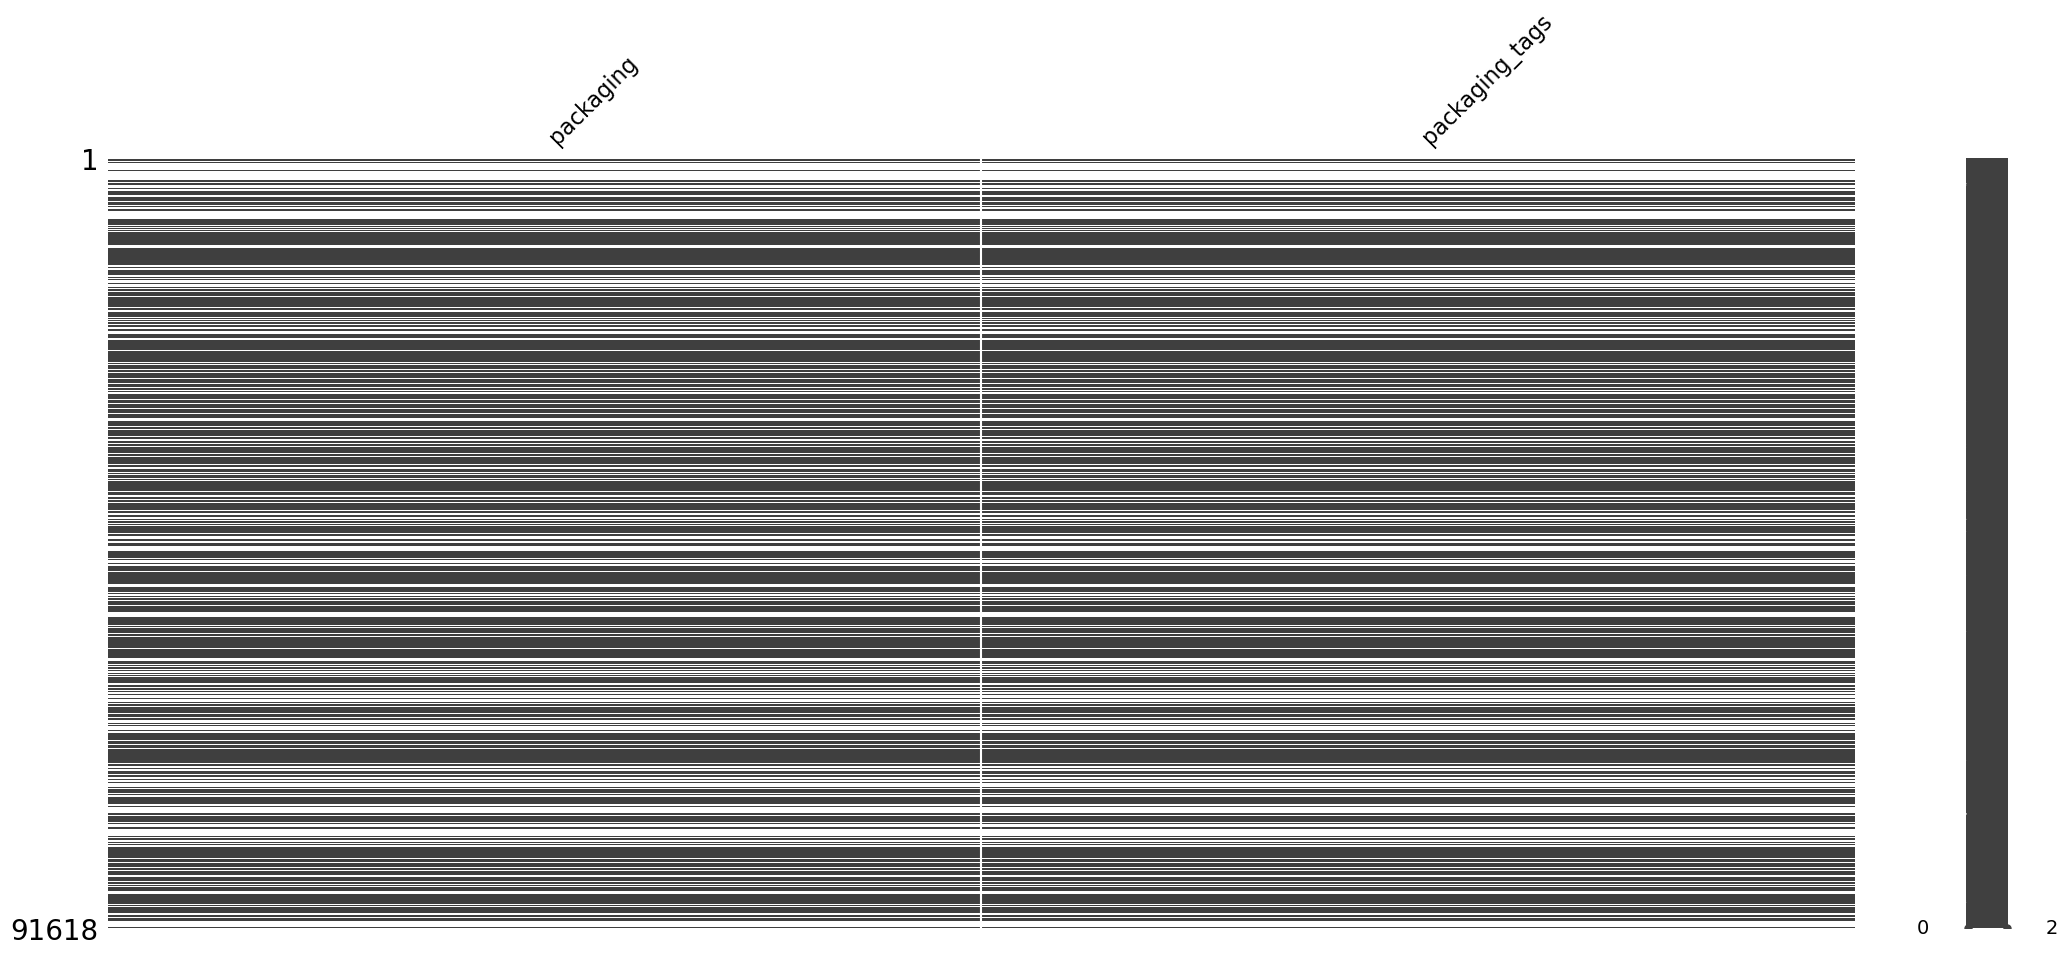

In [60]:
varkeys=['packaging']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

In [61]:
valeurUnique(dfood, ['packaging', 'packaging_tags'])

packaging  \
0                                       NaN   
46                                plastique   
182                        Sachet plastique   
184                            Carton,boîte   
188                               aluminium   
...                                     ...   
320437                              en:none   
320467          fr:Brique carton à recycler   
320589  Tetra Brik,Carton,Brique,tetra brik   
320598              Carton,Tetra Pak,brique   
320628           Tetra Pak,Brique,tetra pak   

                             packaging_tags  
0                                       NaN  
46                                plastique  
182                        sachet-plastique  
184                            carton,boite  
188                               aluminium  
...                                     ...  
320437                              en-none  
320467          fr-brique-carton-a-recycler  
320589  tetra-brik,carton,brique,tetra-brik  
320598              carton,tetra-pak,brique  
320628           tetra-pak,brique,tetra-pak  

[10982 rows x 2 columns]

------------------------------------

#### Les variables : states

------------------------------------

states  \
0                                       en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   
46                                                  en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-completed, en:characteristics-to-be-completed, en:categories-completed, en:brands-to-be-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   
106        en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   
136                                              en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded   
138  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   

                                                                                                                                                                                                                                                                                                                                                                  states_tags  \
0                                      en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded   
46                                                 en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-to-be-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded   
106        en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded   
136                                            en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded   
138  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,e

states  \
320761                                        en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   
320763                                               en:to-be-checked, en:complete, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-validated, en:photos-uploaded   
320764    en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   
320765                                         en:to-be-checked, en:complete, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-validated, en:photos-uploaded   
320770  en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-uploaded   

                                                                                                                                                                                                                                                                                                                                                 states_tags  \
320761                                        en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded   
320763                                                en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
320764    en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded   
320765                                          en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
320770  en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-uploaded   

                                                             

<AxesSubplot: >

#### Comparaison entre states et states_fr

----------------------

Cas où states est renseigné mais pas states_fr :                                           0.0%
Cas où states_fr est renseigné mais pas states :                                           0.0%
Cas où states et states_fr sont renseignés tous les deux :                                 100.0%


----------------------

#### Comparaison entre states et states_tags

----------------------

Cas où states est renseigné mais pas states_tags :                                         0.0%
Cas où states_tags est renseigné mais pas states :                                         0.0%
Cas où states et states_tags sont renseignés tous les deux :                               100.0%


----------------------

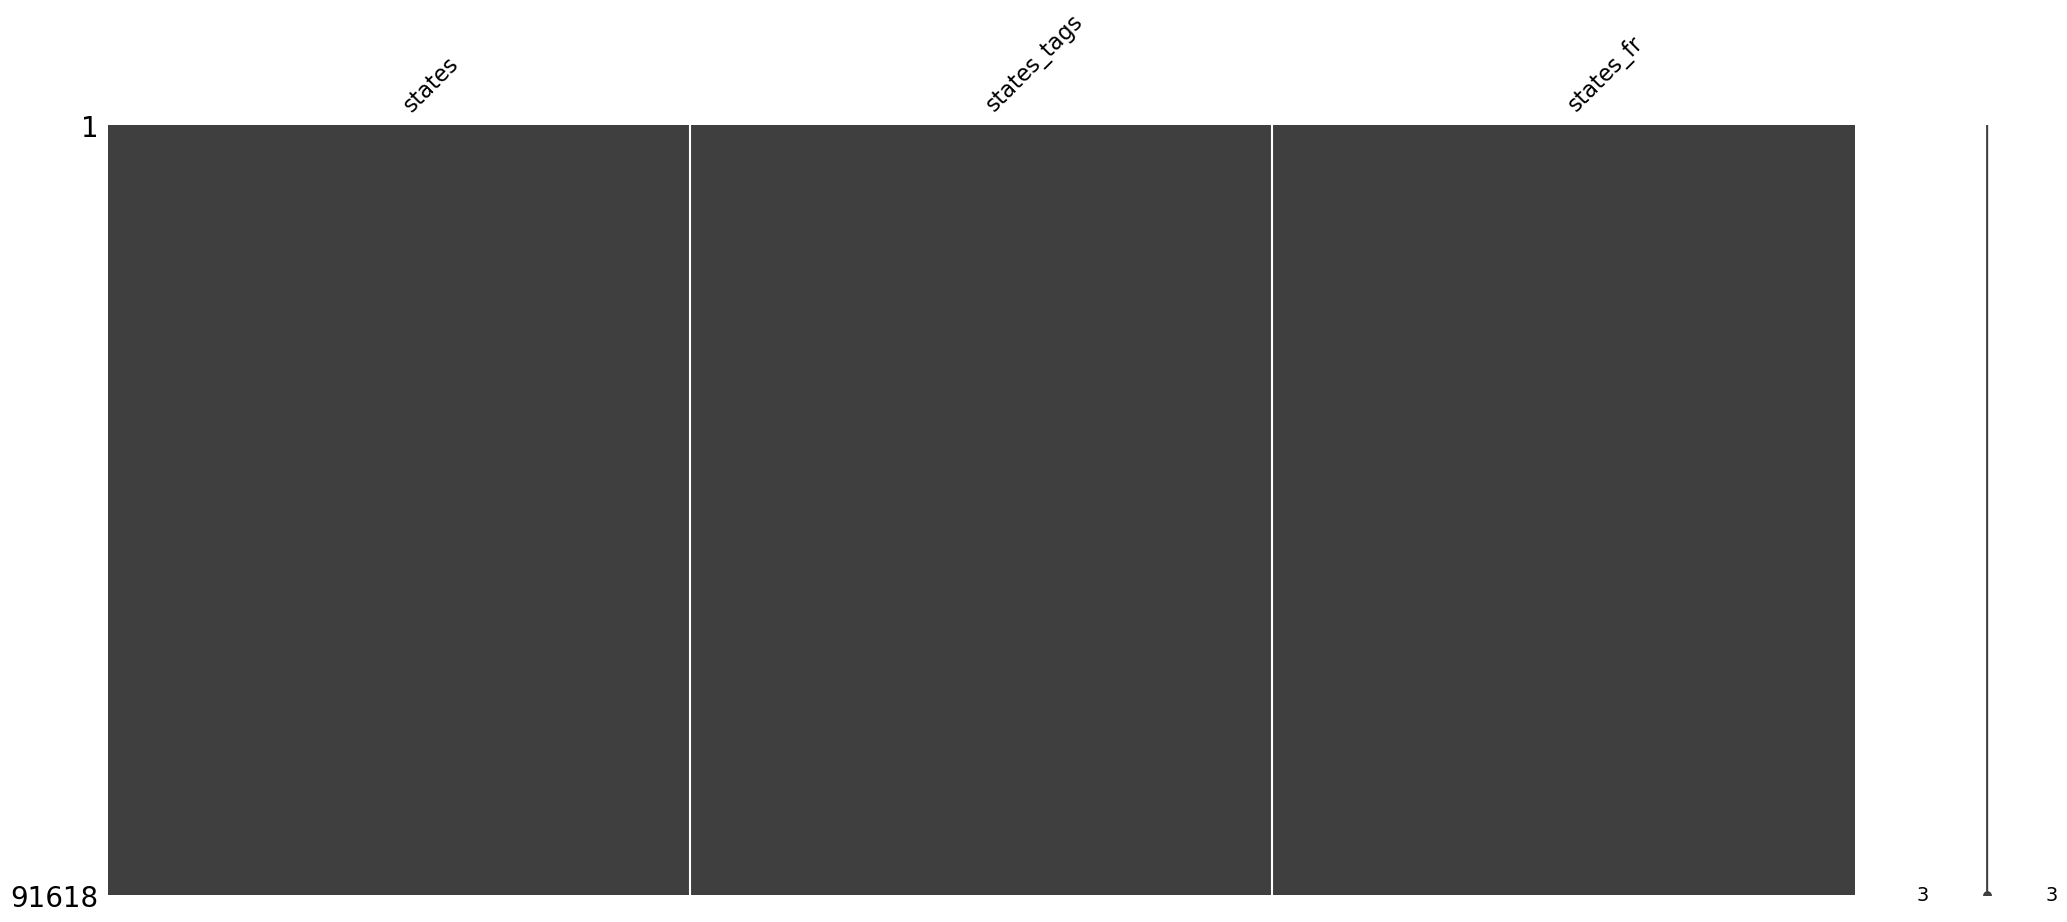

In [62]:
varkeys=['states']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

------------------------------------

#### Les variables : traces

------------------------------------

traces traces_tags traces_fr pnns_groups_1 pnns_groups_2
0      NaN         NaN       NaN           NaN           NaN
46     NaN         NaN       NaN       unknown       unknown
106    NaN         NaN       NaN       unknown       unknown
136    NaN         NaN       NaN       unknown       unknown
138    NaN         NaN       NaN       unknown       unknown

traces                       traces_tags  \
320761  Anhydride sulfureux et sulfites  en:sulphur-dioxide-and-sulphites   
320763                              NaN                               NaN   
320764                              NaN                               NaN   
320765                              NaN                               NaN   
320770                              NaN                               NaN   

                              traces_fr   pnns_groups_1          pnns_groups_2  
320761  Anhydride sulfureux et sulfites             NaN    Alcoholic beverages  
320763                              NaN       Beverages  Non-sugared beverages  
320764                              NaN             NaN                    NaN  
320765                              NaN  Fish Meat Eggs         Processed meat  
320770                              NaN             NaN                    NaN

<AxesSubplot: >

#### Comparaison entre traces et traces_fr

----------------------

Cas où traces est renseigné mais pas traces_fr :                                           0.00109%
Cas où traces_fr est renseigné mais pas traces :                                           0.0%
Cas où traces et traces_fr sont renseignés tous les deux :                                 20.89109%


----------------------

#### Comparaison entre traces et traces_tags

----------------------

Cas où traces est renseigné mais pas traces_tags :                                         0.00109%
Cas où traces_tags est renseigné mais pas traces :                                         0.0%
Cas où traces et traces_tags sont renseignés tous les deux :                               20.89109%


----------------------

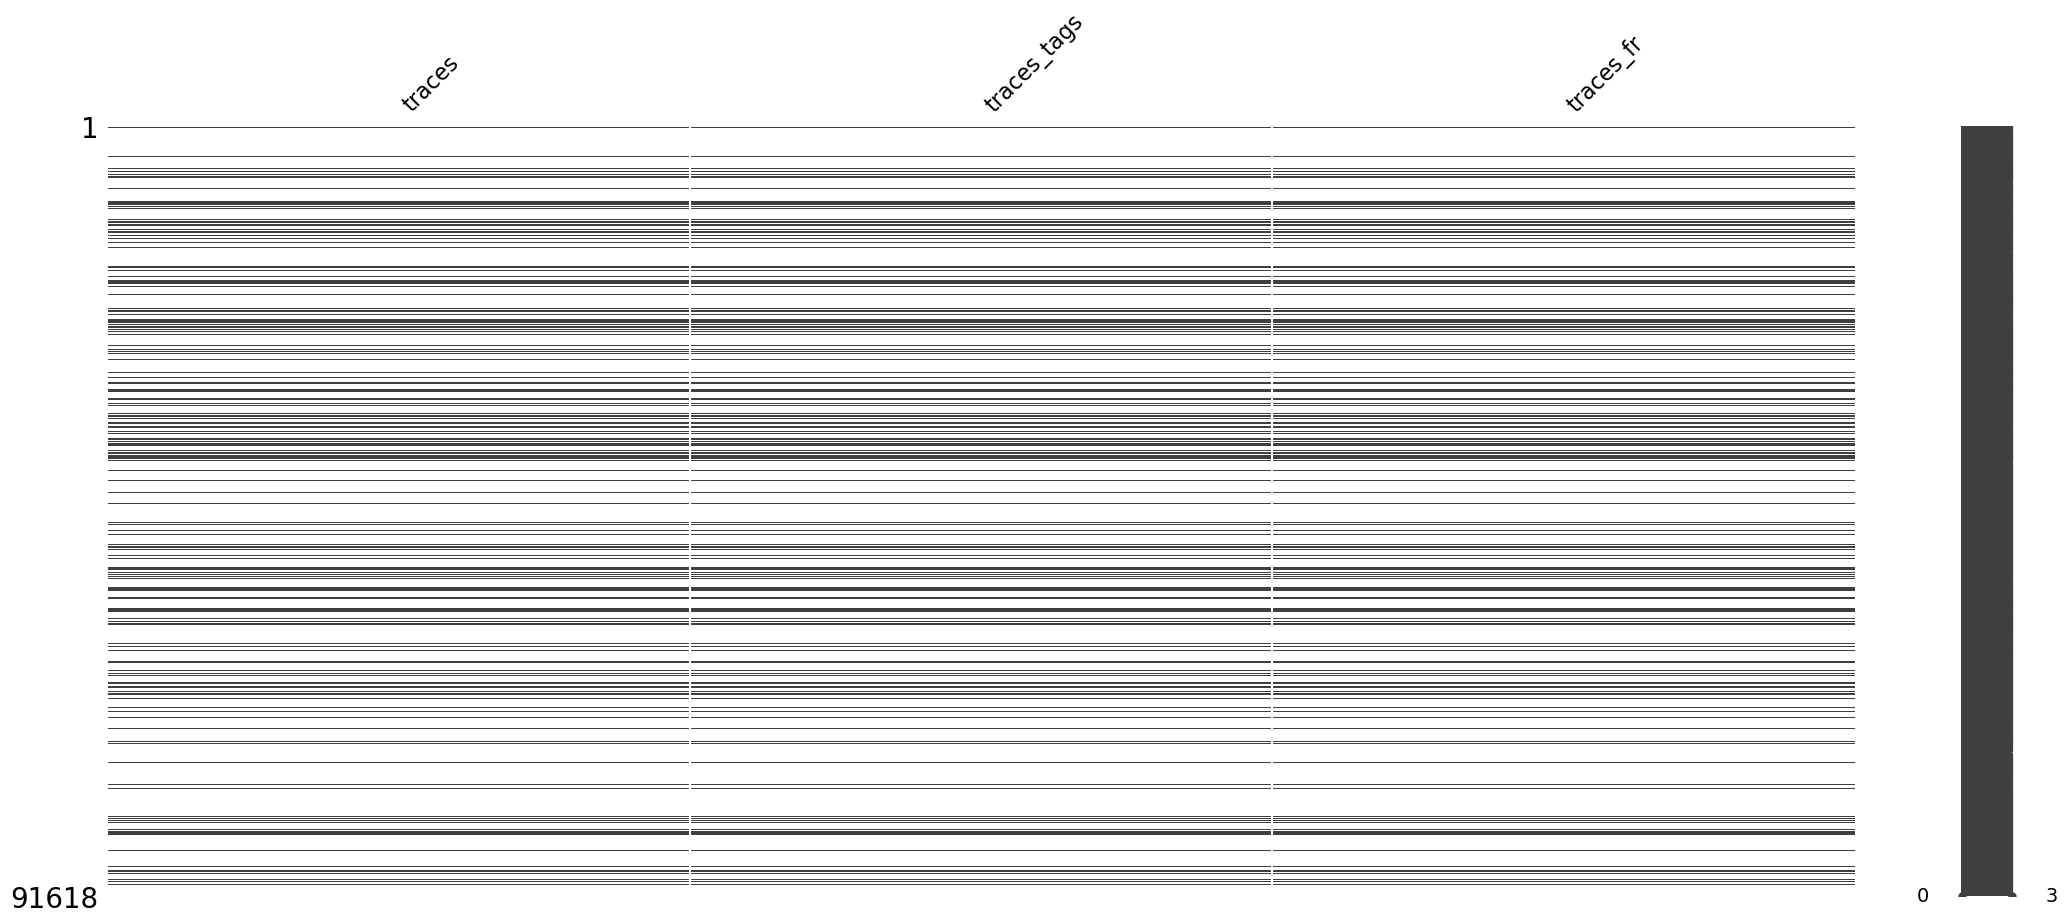

In [63]:
varkeys=['traces']
for var in varkeys: 
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Les variables : {0}'.format(var)))
    display(Markdown('------------------------------------'))
    focusDuplicatedVar(dfood, var)
    if var+'_fr' in dfood.columns:
        compare_NaN(dfood, var,var+'_fr')
    if var+'_tags' in dfood.columns:
        compare_NaN(dfood, var,var+'_tags')

#### Les variables ***ingredients_from_palm_oil_n***

In [64]:
display(dfood[['ingredients_from_palm_oil_n']].value_counts(dropna=False))
varList1=['ingredients_from_palm_oil_n','additives_n','additives_tags','additives_fr','pnns_groups_1','pnns_groups_2']
ImputeModaliteNaN(dfood,'ingredients_from_palm_oil_n', 'pnns_groups_2',Varlist=varList1)[varList1]

ingredients_from_palm_oil_n
0.0                            49914
NaN                            38021
1.0                             3632
2.0                               51
dtype: int64

ingredients_from_palm_oil_n  additives_n additives_tags  \
0                               NaN          NaN            NaN   
46                              0.0          0.0            NaN   
106                             0.0          1.0        en:e322   
136                             0.0          0.0            NaN   
138                             0.0          0.0            NaN   
...                             ...          ...            ...   
320761                          0.0          0.0            NaN   
320763                          0.0          0.0            NaN   
320764                          NaN          NaN            NaN   
320765                          0.0          0.0            NaN   
320770                          NaN          NaN            NaN   

             additives_fr   pnns_groups_1          pnns_groups_2  
0                     NaN             NaN                    NaN  
46                    NaN         unknown                unknown  
106     E322 - Lécithines         unknown                unknown  
136                   NaN         unknown                unknown  
138                   NaN         unknown                unknown  
...                   ...             ...                    ...  
320761                NaN             NaN    Alcoholic beverages  
320763                NaN       Beverages  Non-sugared beverages  
320764                NaN             NaN                    NaN  
320765                NaN  Fish Meat Eggs         Processed meat  
320770                NaN             NaN                    NaN  

[91618 rows x 6 columns]

In [65]:
# def compareColumn(df, col1, col2):
#     def hl(d):
#         df = pd.DataFrame(columns=d.columns, index=d.index)        
#         # df.loc[d[col1].str.lower().ne(d[col2].str.lower()),:] = 'background: yellow'
#         df1=df.loc[d[col1].str.lower().ne(d[col2].str.lower()),:]
#         return df1
#     df1=valeurUnique(df.loc[df[col1].str.lower().ne(df[col2].str.lower()),:],[col1, col2])
#     return valeurUnique(df.loc[(~((df[col1].isna())&(df[col2].isna()))),[col1, col2]],[col1, col2])
#     # return df.loc[:,[col1, col2]].style.apply(hl, axis=None)
    
# Check1=compareColumn(dfood,'traces', 'traces_fr')
# Check1

-----
Après examen de toutes ces variables, nous avons une liste de variables à supprimer.

------------------

In [66]:
listeSupprimer=['additives','additives_tags','additives_fr','brands_tags','cities','labels','labels_tags',
                'allergens_fr','brands_tags', 'cities','emb_codes_tags','ingredients_from_palm_oil',
                'ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil',
                'ingredients_that_may_be_from_palm_oil_tags','url', 'manufacturing_places_tags',
                'origins_tags', 'packaging_tags','states', 'states_tags', 'traces_tags','traces_fr']

dfood=dfood.drop(listeSupprimer,axis=1)
dfood.head()

code                     creator   created_t  \
0    0000000003087  openfoodfacts-contributors  1474103866   
46   0000000024600             date-limite-app  1434530704   
106  0000000036252                     tacinte  1422221701   
136  0000000039259                     tacinte  1422221773   
138  0000000039529                    teolemon  1420147051   

         created_datetime last_modified_t last_modified_datetime  \
0    2016-09-17T09:17:46Z      1474103893   2016-09-17T09:18:13Z   
46   2015-06-17T08:45:04Z      1434535914   2015-06-17T10:11:54Z   
106  2015-01-25T21:35:01Z      1489055667   2017-03-09T10:34:27Z   
136  2015-01-25T21:36:13Z      1473538082   2016-09-10T20:08:02Z   
138  2015-01-01T21:17:31Z      1489055652   2017-03-09T10:34:12Z   

           product_name generic_name quantity  packaging  ... ph_100g  \
0    Farine de blé noir          NaN      1kg        NaN  ...     NaN   
46        Filet de bœuf          NaN  2.46 kg  plastique  ...     NaN   
106      Lion Peanut x2          NaN      NaN        NaN  ...     NaN   
136             Twix x2          NaN      NaN        NaN  ...     NaN   
138      Pack de 2 Twix          NaN      NaN        NaN  ...     NaN   

    fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g cocoa_100g  \
0                           NaN                              NaN        NaN   
46                          NaN                              NaN        NaN   
106                         NaN                              NaN        NaN   
136                         NaN                              NaN        NaN   
138                         NaN                              NaN        NaN   

    chlorophyl_100g carbon-footprint_100g nutrition-score-fr_100g  \
0               NaN                   NaN                     NaN   
46              NaN                   NaN                     NaN   
106             NaN                   NaN                    22.0   
136             NaN                   NaN                     NaN   
138             NaN                   NaN                     NaN   

    nutrition-score-uk_100g glycemic-index_100g water-hardness_100g  
0                       NaN                 NaN                 NaN  
46                      NaN                 NaN                 NaN  
106                    22.0                 NaN                 NaN  
136                     NaN                 NaN                 NaN  
138                     NaN                 NaN                 NaN  

[5 rows x 138 columns]

In [67]:
dfood.columns

Index(['code', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'generic_name', 'quantity',
       'packaging',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=138)

### Doublons

In [68]:
dfood.duplicated().sum()
# dfood.duplicated(subset=['code']).sum()
dfood['code'].nunique()==dfood.shape[0]

True

### <a id='6'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 6- Examen des valeurs manquantes </p>  </a>

<AxesSubplot: >

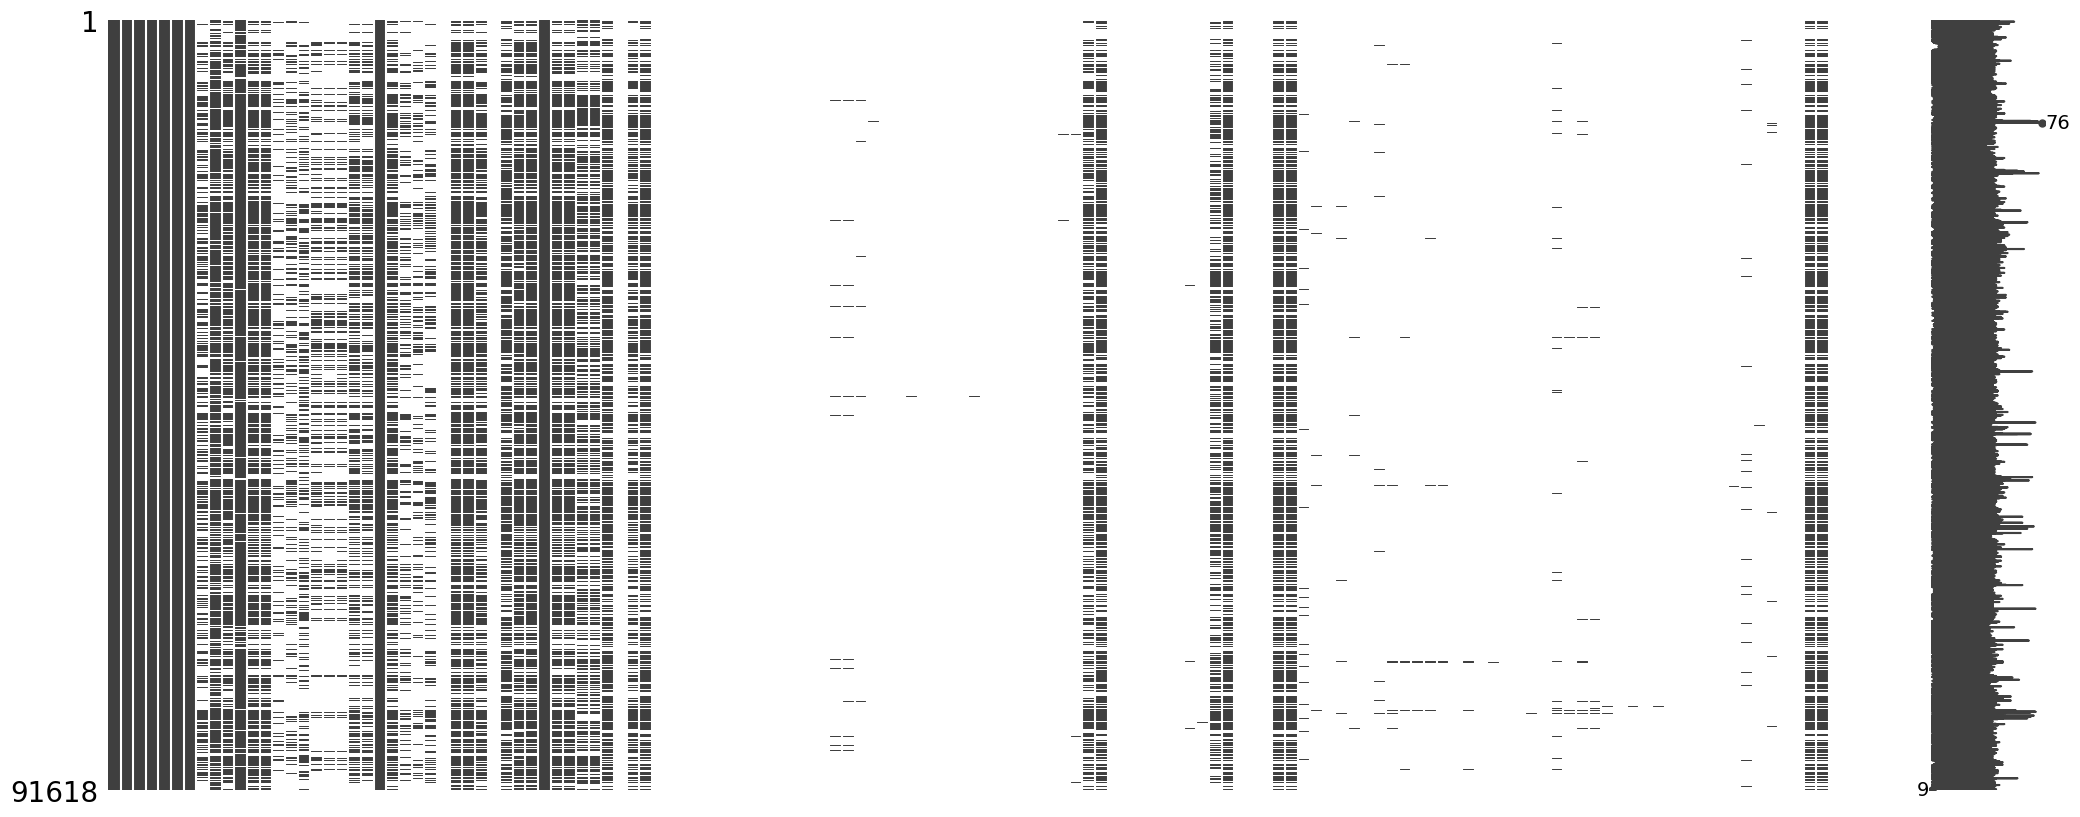

In [69]:
msno.matrix(dfood)

### Groupe de variables

In [70]:
varGeneral=dfood.loc[:,'code':'quantity'].columns.tolist()
varTags=dfood.loc[:,'packaging':'countries_fr'].columns.tolist()
varIngredients=dfood.loc[:,'ingredients_text':'traces'].columns.tolist()
varMiscData=dfood.loc[:,'serving_size':'image_small_url'].columns.tolist()
# varGeneral

In [71]:
varIngredients

['ingredients_text', 'allergens', 'traces']

<AxesSubplot: >

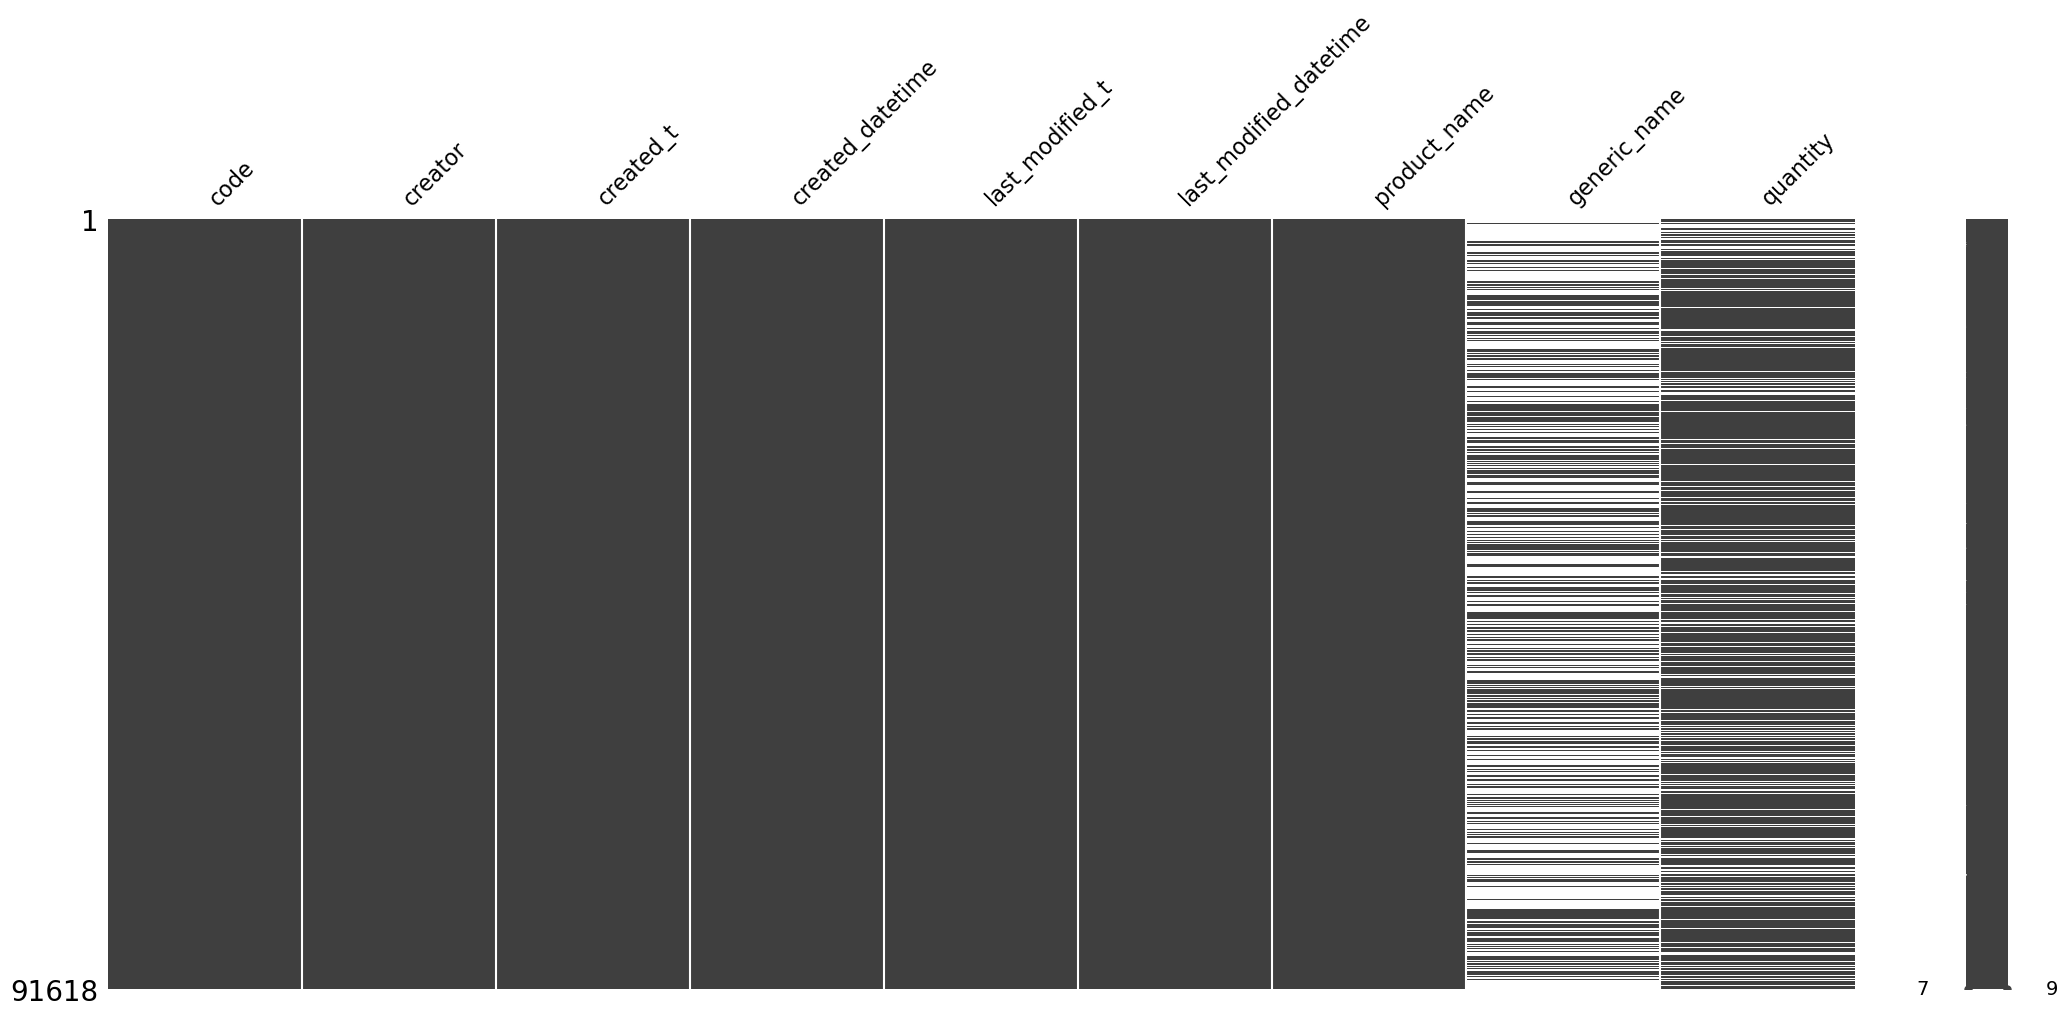

In [72]:
msno.matrix(dfood[varGeneral])

<AxesSubplot: >

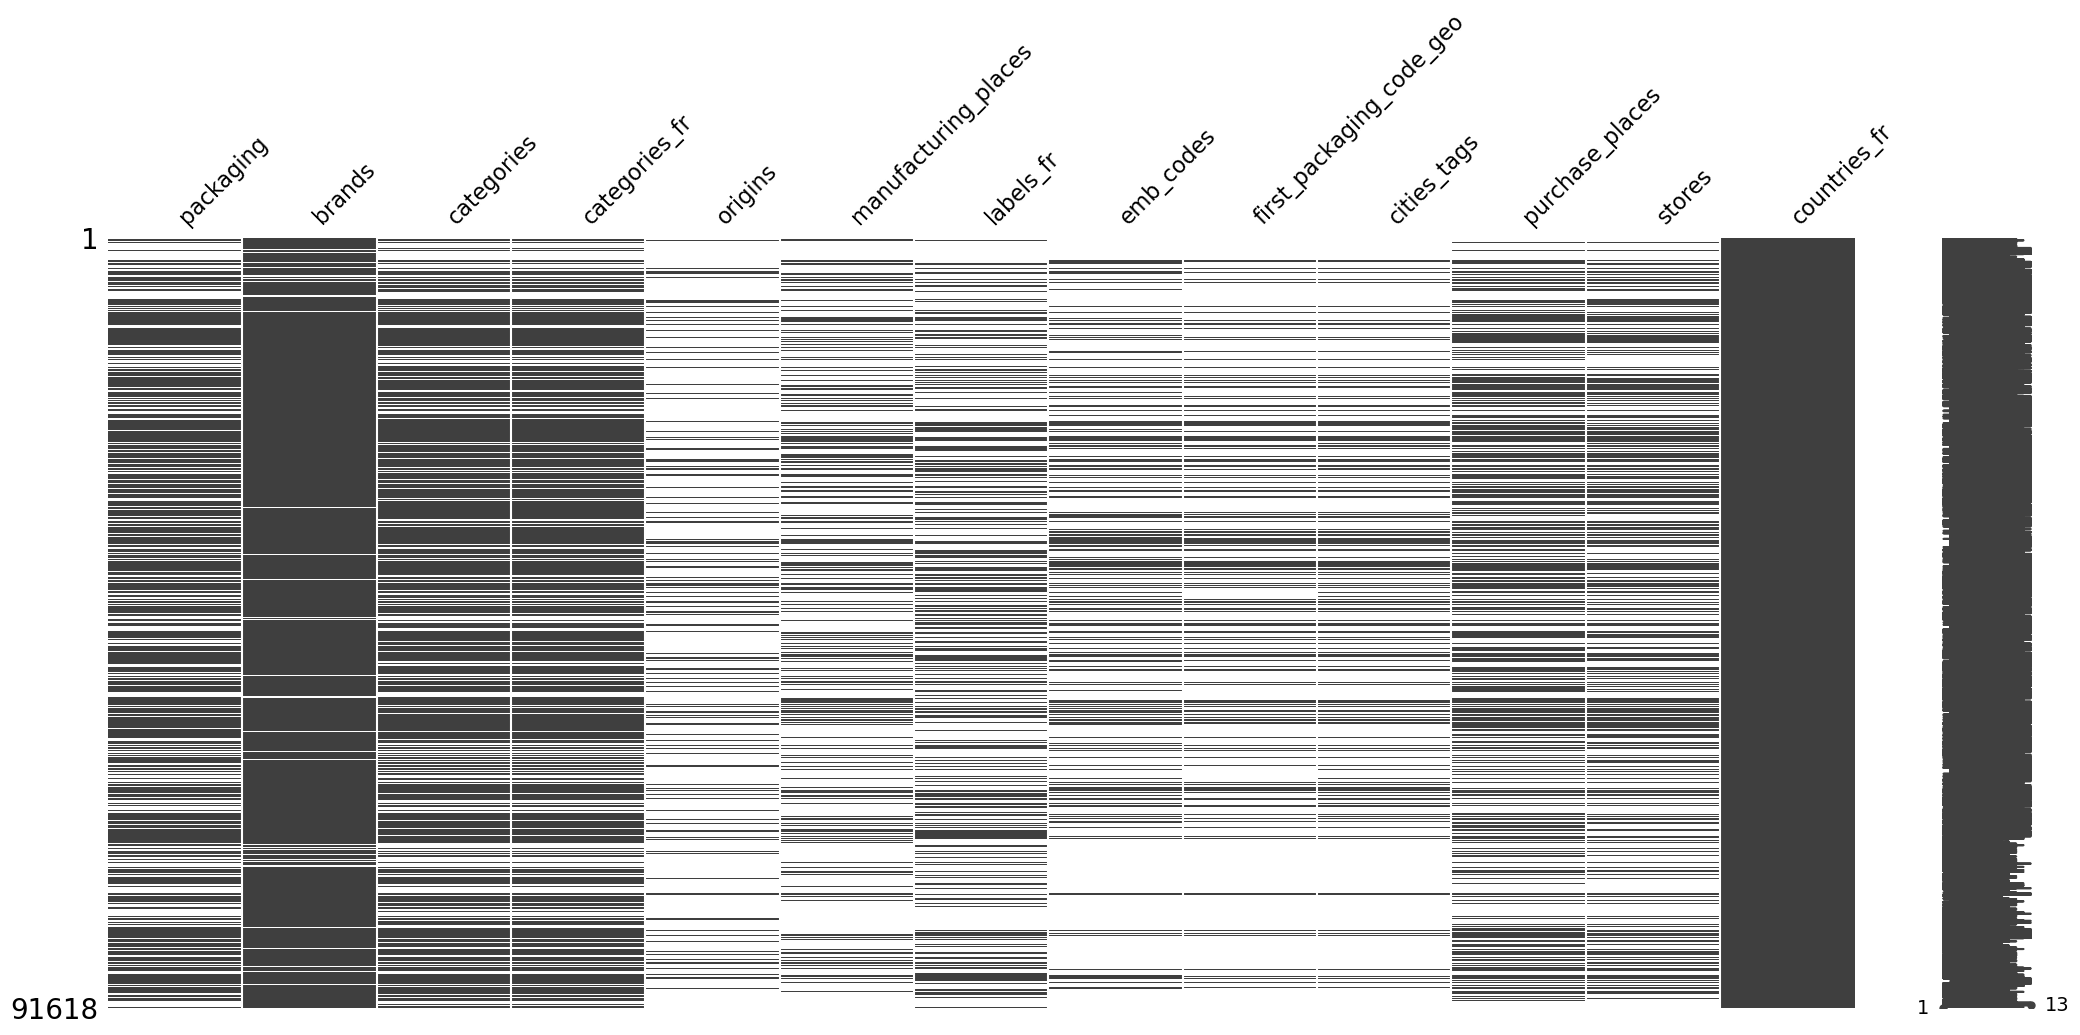

In [73]:
msno.matrix(dfood[varTags])

<AxesSubplot: >

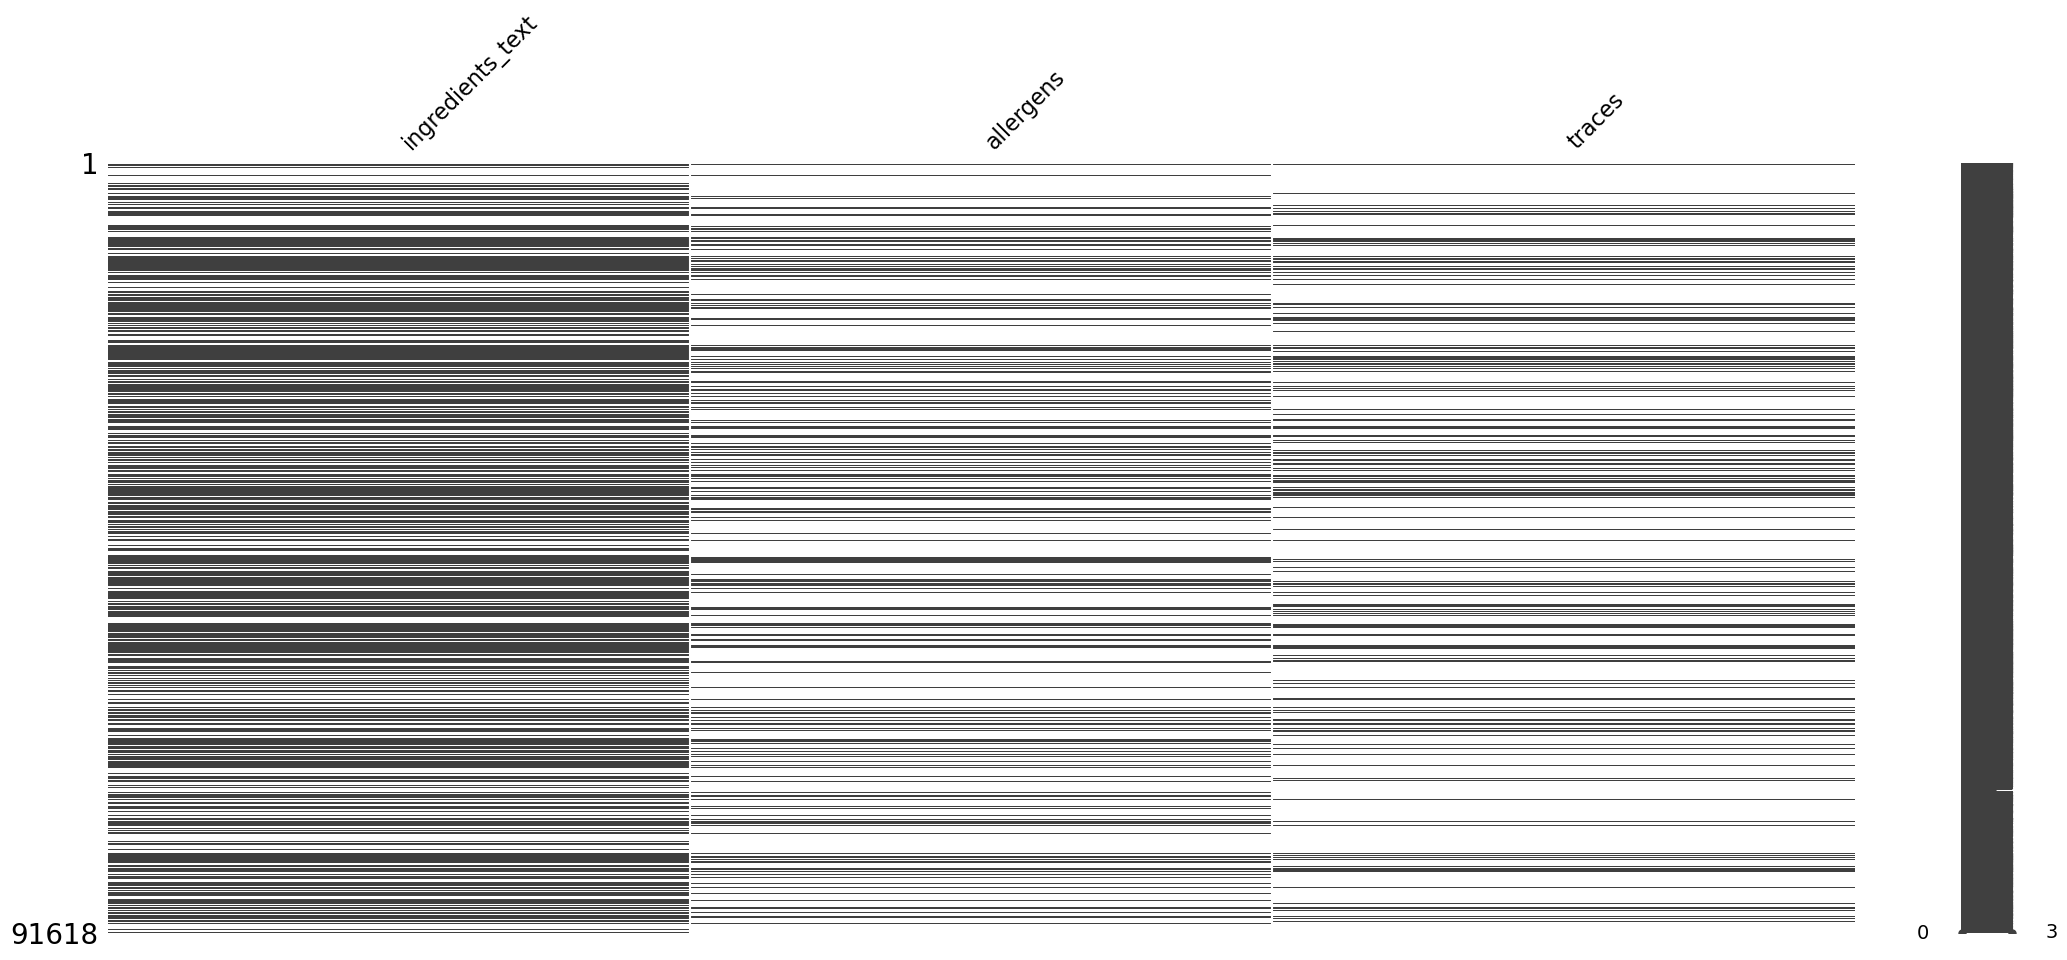

In [74]:
msno.matrix(dfood[varIngredients])

<AxesSubplot: >

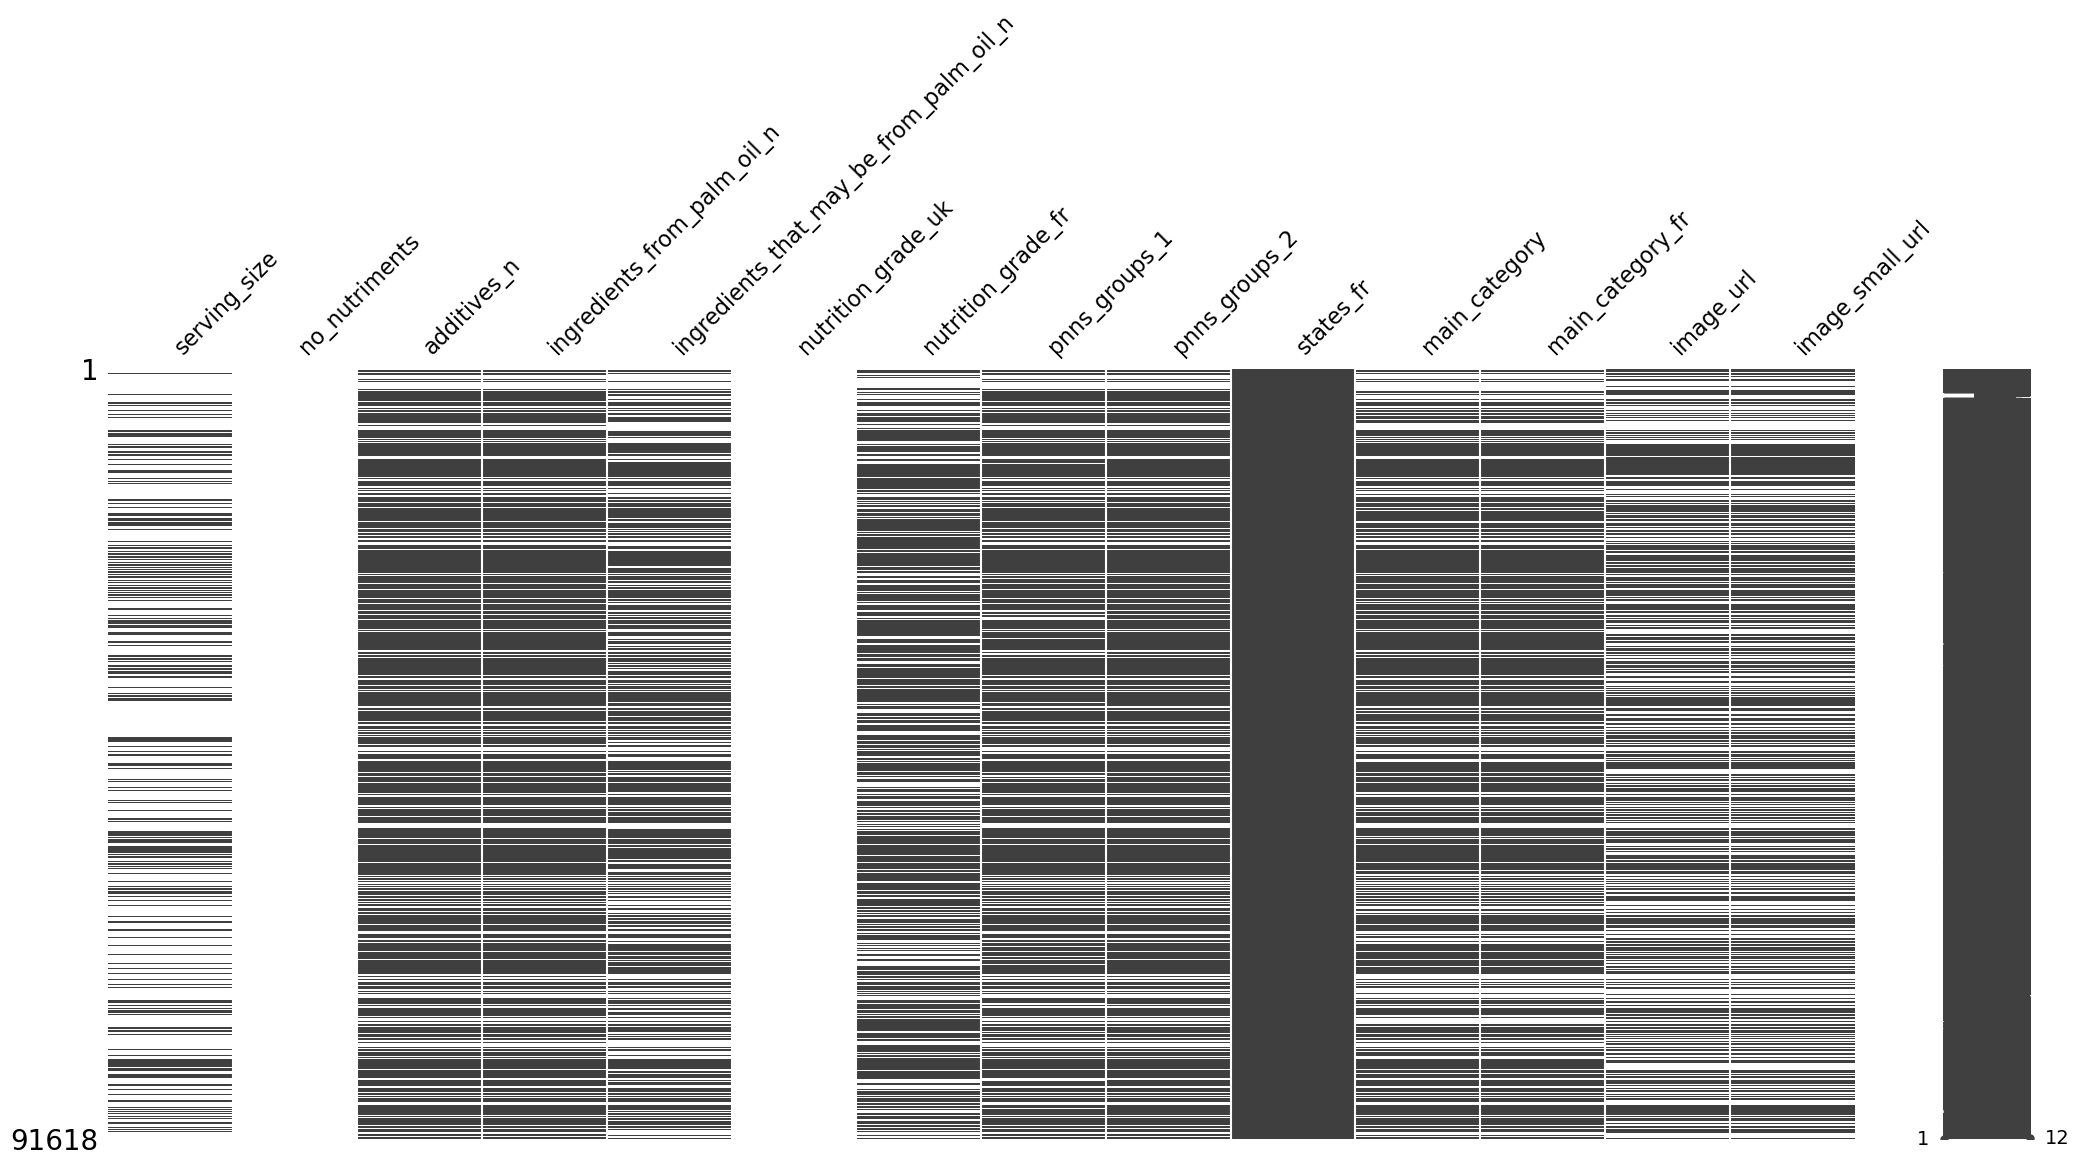

In [75]:
msno.matrix(dfood[varMiscData])

----------------
Certaines variables sont presques vides.
D'autres présentent assez d'observations.
-----

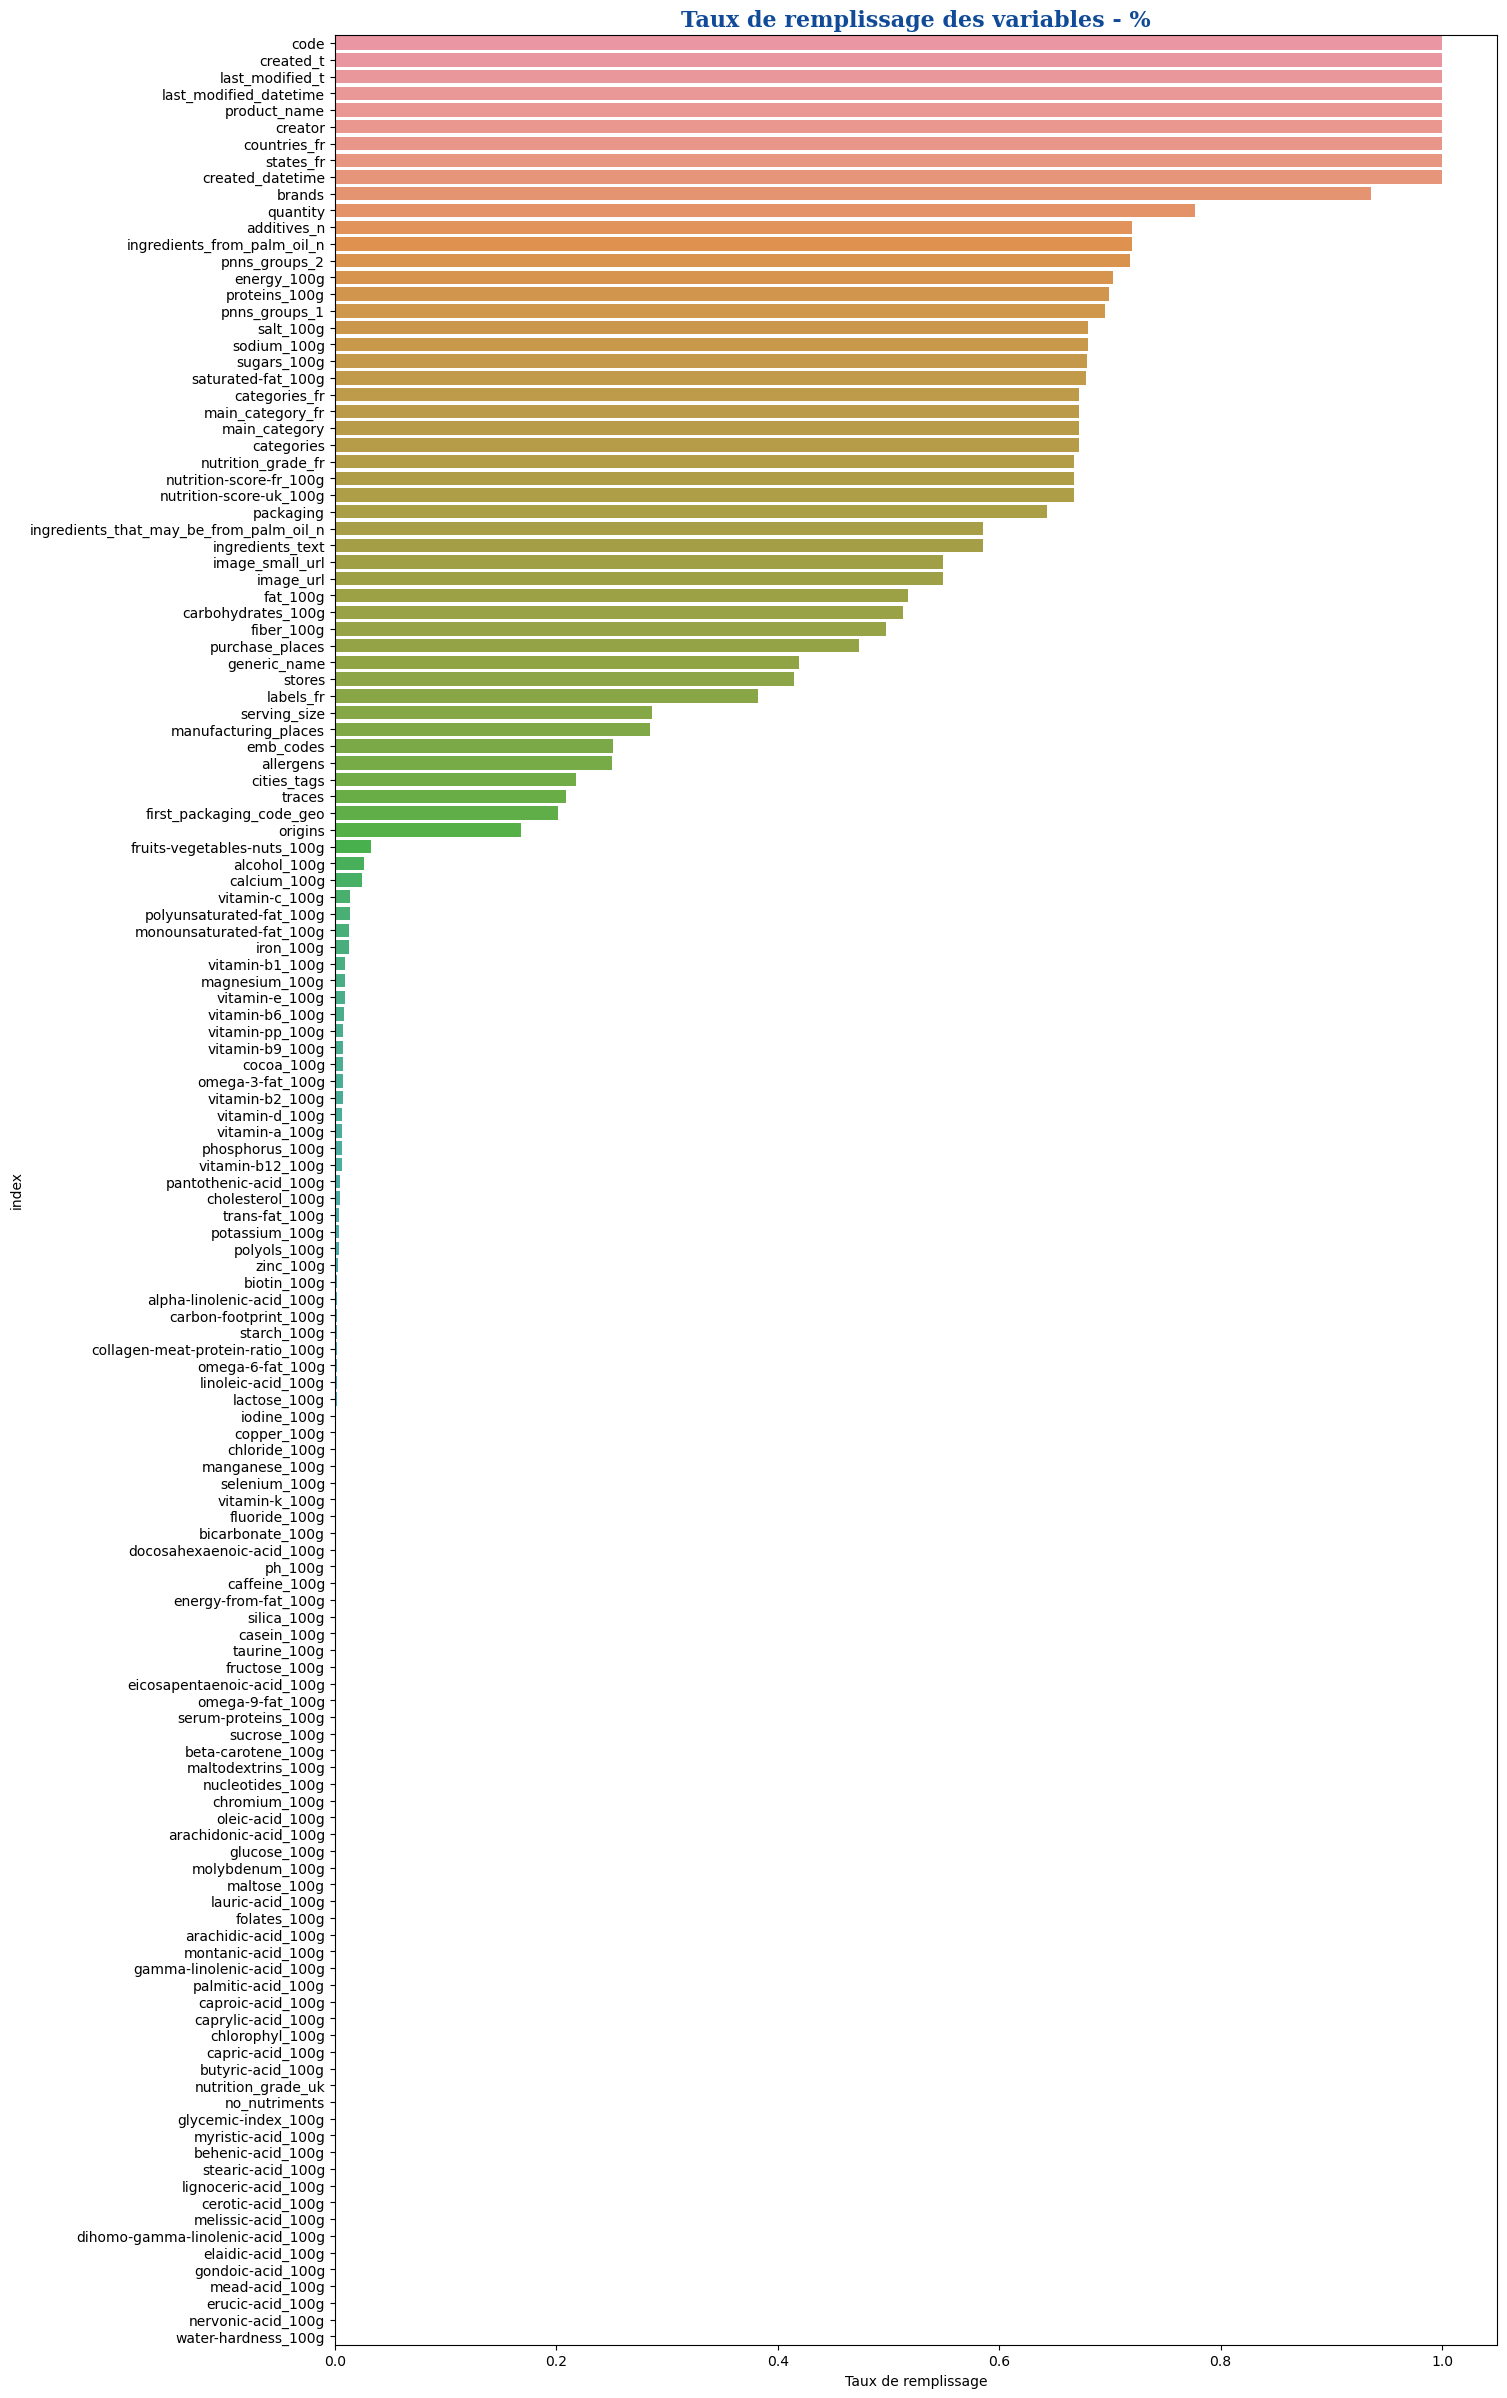

In [76]:
def tauxRemplissageVariable(dataframe):
  # Répartition du taux de remplissage des colonnes: 
    df = (pd.DataFrame(round(dataframe.shape[0] - dataframe.isna().sum())/dataframe.shape[0],
                 columns=['Taux de remplissage']).sort_values('Taux de remplissage', ascending=False).reset_index())
    fig, ax = plt.subplots(figsize=(15,30))
    sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
    plt.title('Taux de remplissage des variables - %', fontdict = font_title)
    plt.show()
    
tauxRemplissageVariable(dfood)

<div class="warning" style='background-color:#E9D8FD; color: #4F6272; font-family:Yu Gothic UI;font-size:108%;border-left: solid #805AD5 10px;  border-right: solid #805AD5 4px; border-radius: 10px; padding:0.05em;'>
<span> 
<p style='margin-left:0.5em;'>
Nous constatons que nous avons beaucoup de valeurs manquantes dans les données. Certaines valeurs sont complètement vides. Elles seront éliminées par la suite.
 </p></span>
</div>

### <font color='blueviolet'> Examen des variables </font>

In [77]:
def selectionVar(data, typevar=['object']):
    ''' cette fonction récupère dans la base en entrée toutes les variables
    qui ayant le type typevar spécifié comme argument'''
    listVar=list(data.select_dtypes(include=typevar).columns)
    return listVar

def namestr(obj, namespace):
    ''' fonction retourne le nom en string '''
    return [name for name in namespace if namespace[name] is obj]            

def AfficherModalites(data, typevar=['object']):
    ''' Cette fonction retourne les fréquences simples sur les modalités d'une dataframe.
    '''
    df=[]
    listVar=selectionVar(data, typevar=typevar)
    # print(listVar)
    for i,col in enumerate(listVar):
        print('--------------------------------------------------------------------------')
        print('Data : {0}, Variable: {1}'.format(namestr(data, globals()),col))
        dftemp=data[col].value_counts(dropna=False).reset_index().rename(columns={'index':col,col:'Nombre'})
        dftemp['frequence']=round(dftemp['Nombre']/(len(data))*100,2)
        df.append(dftemp)
        display(df[i])
    return df

In [78]:
listVar=selectionVar(dfood, typevar=['float64','int64'])
dfood[listVar].describe()

no_nutriments   additives_n  ingredients_from_palm_oil_n  \
count            0.0  65922.000000                 65922.000000   
mean             NaN      1.569097                     0.056643   
std              NaN      2.418125                     0.234483   
min              NaN      0.000000                     0.000000   
25%              NaN      0.000000                     0.000000   
50%              NaN      0.000000                     0.000000   
75%              NaN      2.000000                     0.000000   
max              NaN     31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n  nutrition_grade_uk  \
count                             53597.000000                 0.0   
mean                                  0.148143                 NaN   
std                                   0.450716                 NaN   
min                                   0.000000                 NaN   
25%                                   0.000000                 NaN   
50%                                   0.000000                 NaN   
75%                                   0.000000                 NaN   
max                                   5.000000                 NaN   

        energy_100g  energy-from-fat_100g      fat_100g  saturated-fat_100g  \
count  6.436300e+04             30.000000  47435.000000        62138.000000   
mean   1.170233e+03            547.471667     13.326181            5.425034   
std    1.285593e+04            574.728341     16.942781            8.542367   
min    0.000000e+00              0.000000      0.000000            0.000000   
25%    4.270000e+02             62.900000      1.300000            0.300000   
50%    1.034000e+03            208.500000      6.800000            2.000000   
75%    1.648000e+03            881.500000     21.000000            7.400000   
max    3.251373e+06           1830.000000    380.000000          210.000000   

       butyric-acid_100g  ...    ph_100g  fruits-vegetables-nuts_100g  \
count                0.0  ...  40.000000                  2967.000000   
mean                 NaN  ...   6.559910                    31.588969   
std                  NaN  ...   1.672411                    32.056012   
min                  NaN  ...   0.000000                     0.000000   
25%                  NaN  ...   6.275000                     0.000000   
50%                  NaN  ...   7.000000                    24.000000   
75%                  NaN  ...   7.355000                    51.100000   
max                  NaN  ...   8.400000                   100.000000   

       collagen-meat-protein-ratio_100g  cocoa_100g  chlorophyl_100g  \
count                        164.000000  679.000000              0.0   
mean                          15.414634   49.186009              NaN   
std                            3.764383   19.215092              NaN   
min                            8.000000    6.000000              NaN   
25%                           12.000000   31.000000              NaN   
50%                           15.000000   48.000000              NaN   
75%                           15.000000   65.000000              NaN   
max                           25.000000  100.000000              NaN   

       carbon-footprint_100g  nutrition-score-fr_100g  \
count             177.000000             61184.000000   
mean              366.710196                 8.678462   
std               402.448798                 9.044064   
min                 0.000000               -15.000000   
25%               150.000000                 1.000000   
50%               220.000000                 9.000000   
75%               485.000000                15.000000   
max              2520.000000                40.000000   

       nutrition-score-uk_100g  glycemic-index_100g  water-hardness_100g  
count             61184.000000                  0.0                  0.0  
mean                  8.355877                  NaN                  NaN  
std           

In [79]:
test=AfficherModalites(dfood) # Analys Univariée

--------------------------------------------------------------------------
Data : ['dfood'], Variable: code


code  Nombre  frequence
0      0000000003087       1        0.0
1      3575650001037       1        0.0
2      3576560005009       1        0.0
3      3576560004002       1        0.0
4      3576560003005       1        0.0
...              ...     ...        ...
91613  3256223660225       1        0.0
91614  3256223660218       1        0.0
91615  3256223631218       1        0.0
91616  3256223624326       1        0.0
91617  9980282863788       1        0.0

[91618 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: creator


creator  Nombre  frequence
0     openfoodfacts-contributors   25773      28.13
1                        kiliweb   13864      15.13
2                         tacite    7070       7.72
3                date-limite-app    6798       7.42
4                       sebleouf    5441       5.94
...                          ...     ...        ...
2548                   lepereded       1       0.00
2549                     drooppy       1       0.00
2550              saridjan-ricky       1       0.00
2551                      baquet       1       0.00
2552                      namnam       1       0.00

[2553 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: created_t


created_t  Nombre  frequence
0      1415014731       6       0.01
1      1473946144       6       0.01
2      1473946547       4       0.00
3      1415014594       4       0.00
4      1366889779       4       0.00
...           ...     ...        ...
91270  1456694992       1       0.00
91271  1368017299       1       0.00
91272  1400414881       1       0.00
91273  1398867988       1       0.00
91274  1492340089       1       0.00

[91275 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: created_datetime


created_datetime  Nombre  frequence
0      2014-11-03T11:38:51Z       6       0.01
1      2016-09-15T13:29:04Z       6       0.01
2      2016-09-15T13:35:47Z       4       0.00
3      2014-11-03T11:36:34Z       4       0.00
4      2013-04-25T11:36:19Z       4       0.00
...                     ...     ...        ...
91270  2016-02-28T21:29:52Z       1       0.00
91271  2013-05-08T12:48:19Z       1       0.00
91272  2014-05-18T12:08:01Z       1       0.00
91273  2014-04-30T14:26:28Z       1       0.00
91274  2017-04-16T10:54:49Z       1       0.00

[91275 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: last_modified_t


last_modified_t  Nombre  frequence
0          1490554434      13       0.01
1          1490554428      12       0.01
2          1460887525      12       0.01
3          1490554439      11       0.01
4          1490554435      11       0.01
...               ...     ...        ...
88557      1476781116       1       0.00
88558      1481102413       1       0.00
88559      1488705774       1       0.00
88560      1466447920       1       0.00
88561      1492340089       1       0.00

[88562 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: last_modified_datetime


last_modified_datetime  Nombre  frequence
0       2017-03-26T18:53:54Z      13       0.01
1       2017-03-26T18:53:48Z      12       0.01
2       2016-04-17T10:05:25Z      12       0.01
3       2017-03-26T18:53:59Z      11       0.01
4       2017-03-26T18:53:55Z      11       0.01
...                      ...     ...        ...
88557   2016-10-18T08:58:36Z       1       0.00
88558   2016-12-07T09:20:13Z       1       0.00
88559   2017-03-05T09:22:54Z       1       0.00
88560   2016-06-20T18:38:40Z       1       0.00
88561   2017-04-16T10:54:49Z       1       0.00

[88562 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: product_name


product_name  Nombre  frequence
0      Huile d'olive vierge extra      62       0.07
1                      Mayonnaise      54       0.06
2               Moutarde de Dijon      50       0.05
3                       Spaghetti      46       0.05
4                          Orange      46       0.05
...                           ...     ...        ...
74644    Tranche De Thon Albacore       1       0.00
74645    Poires Williams au sirop       1       0.00
74646        3 Œufs avec surprise       1       0.00
74647  20 saucisses de Strasbourg       1       0.00
74648    Tomates aux Vermicelles        1       0.00

[74649 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: generic_name


generic_name  \
0                                                                                                           NaN   
1                                                           Pâtes alimentaires au blé dur de qualité supérieure   
2                                                                                            Aliment pour bébés   
3                                                                      Pâtes alimentaires de qualité supérieure   
4                                                                                         Jambon cuit supérieur   
...                                                                                                         ...   
27390                                                                                   Tomate grappe gustative   
27391  Yaourt nature à la grecque à base de lait mélange de vache et de brebis issu de l'agriculture biologique   
27392                                                                                    Chocolat  70% de cacao   
27393                                                        Sablés aux céréales 50% nappés au chocolat au lait   
27394                                                                                         thé bio équitable   

       Nombre  frequence  
0       53213      58.08  
1         201       0.22  
2          87       0.09  
3          82       0.09  
4          80       0.09  
...       ...        ...  
27390       1       0.00  
27391       1       0.00  
27392       1       0.00  
27393       1       0.00  
27394       1       0.00  

[27395 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: quantity


quantity  Nombre  frequence
0                                NaN   20451      22.32
1                              500 g    3300       3.60
2                              200 g    2819       3.08
3                              250 g    2812       3.07
4                              100 g    2054       2.24
...                              ...     ...        ...
9639           150 g - 105 g égoutté       1       0.00
9640  340 g (égoutté : 230 g) 370 ml       1       0.00
9641               175 g (30 pièces)       1       0.00
9642                        6 * 40 g       1       0.00
9643                             67g       1       0.00

[9644 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: packaging


packaging  Nombre  frequence
0                                                 NaN   32710      35.70
1                                    Sachet,Plastique    2096       2.29
2                                              Carton    1943       2.12
3                                           Plastique    1768       1.93
4                                     Bouteille,Verre    1277       1.39
...                                               ...     ...        ...
10976  Verre,Capsule plastique,Etiquette papier,verre       1       0.00
10977                      Plastique,Flacon,Sous-vide       1       0.00
10978   Plastique,Bouteille,Nouveau bouchon,plastique       1       0.00
10979                           Tube plastique,Carton       1       0.00
10980                      Tetra Pak,Brique,tetra pak       1       0.00

[10981 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: brands


brands  Nombre  frequence
0                                           NaN    5870       6.41
1                                     Carrefour    2827       3.09
2                                        Auchan    2280       2.49
3                                             U    2043       2.23
4                                  Leader Price    1644       1.79
...                                         ...     ...        ...
21003  La grande epicerie de paris (bon marché)       1       0.00
21004                        La Grande Epicerie       1       0.00
21005               La Grande Epicerie de Paris       1       0.00
21006                 Montignat,La Maison Bleue       1       0.00
21007                     Sans marque,D.Lambert       1       0.00

[21008 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: categories


categories  \
0                                                                                                                                                                     NaN   
1                                                                                                                              Snacks sucrés,Biscuits et gâteaux,Biscuits   
2                                                                                                         Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat   
3                                                                                                                                                                Biscuits   
4                                                                                                                                 Snacks sucrés,Chocolats,Chocolats noirs   
...                                                                                                                                                                   ...   
26573                                                                                                           Boissons,Boissons sucrées,Cocktails,Cocktails sans alcool   
26574                                                                                                                                              Beers from Japan,Beers   
26575                                                                                                     Desserts végétaliens,Desserts au soja,Desserts de soja au cacao   
26576                                                                                                                                                     Gaufres,Gateaux   
26577  Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie   

       Nombre  frequence  
0       30028      32.78  
1         291       0.32  
2         240       0.26  
3         223       0.24  
4         209       0.23  
...       ...        ...  
26573       1       0.00  
26574       1       0.00  
26575       1       0.00  
26576       1       0.00  
26577       1       0.00  

[26578 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: categories_fr


categories_fr  \
0                                                                                                                                                                   NaN   
1                                                                                                                            Snacks sucrés,Biscuits et gâteaux,Biscuits   
2                                                                                                       Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat   
3      Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit déjeuner   
4                                                                                                                               Snacks sucrés,Chocolats,Chocolats noirs   
...                                                                                                                                                                 ...   
15579                                                         Produits laitiers,Fromages,Fromages de vache,Fromages de France,Fromages au lait thermisé,Bleu d'Auvergne   
15580                                                                                                                Viandes,Conserves,Escargots,Escargots de Bourgogne   
15581                                                                             en:Coq au vin,en:Plats prepares,en:Plats a base de viande,en:Plats a base de volaille   
15582                                                                                                      Plats préparés,Gratins,Gratins de légumes,Gratin d'aubergine   
15583                                                                                                Boissons,Boissons alcoolisées,Vins,Vins français,Vins blancs,Bugey   

       Nombre  frequence  
0       30028      32.78  
1         581       0.63  
2         437       0.48  
3         428       0.47  
4         422       0.46  
...       ...        ...  
15579       1       0.00  
15580       1       0.00  
15581       1       0.00  
15582       1       0.00  
15583       1       0.00  

[15584 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: origins


origins  Nombre  frequence
0                            NaN   76227      83.20
1                         France    5062       5.53
2                         Italie     432       0.47
3               Union Européenne     422       0.46
4                        Espagne     389       0.42
...                          ...     ...        ...
3445  zone de pêche mediterranee       1       0.00
3446            océan atlantique       1       0.00
3447   Océan Atlantique Nord-est       1       0.00
3448   Bretagne,Douarnenez,Maroc       1       0.00
3449           Flaxieu,Bugey,Ain       1       0.00

[3450 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: manufacturing_places


manufacturing_places  Nombre  \
0                                                                NaN   65523   
1                                                             France    9230   
2                                                             Italie    1193   
3                                                           Belgique     677   
4                                                          Allemagne     620   
...                                                              ...     ...   
4701                              France,Bretagne,Finistère,Bannalec       1   
4702          GELMER,Wimille,Pas-de-Calais,Nord-Pas-de-Calais,France       1   
4703  Wiesbaum, Vulkaneifel (distrito), Renania-Palatinado, Alemania       1   
4704                                                  Norvège,France       1   
4705                                République coopérative du Guyana       1   

      frequence  
0         71.52  
1         10.07  
2          1.30  
3          0.74  
4          0.68  
...         ...  
4701       0.00  
4702       0.00  
4703       0.00  
4704       0.00  
4705       0.00  

[4706 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: labels_fr


labels_fr  \
0                                                                                                         NaN   
1                                                                  Bio,Bio européen,AB Agriculture Biologique   
2                                                                                                  Point Vert   
3                                                                                   Point Vert,Eco-emballages   
4                                                        Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique   
...                                                                                                       ...   
9811               Peu ou pas de sucre,Sans gluten,Source de calcium,Point Vert,Fabriqué en France,Sans sucre   
9812  Bio,Bio européen,Sans gluten,FR-BIO-01,Fabriqué en France,Sans lactose,AB Agriculture Biologique,Afdiag   
9813   Peu ou pas de sucre,Bio,Bio européen,Sans gluten,FR-BIO-01,Sans sucre ajouté,AB Agriculture Biologique   
9814                     Viande Française,Volaille Française,Certifie-par-certipaq,Dinde-nourrie-sans-ogm-0-9   
9815                               Peu ou pas de sucre,Sans sucre,Ne-pas-donner-aux-enfants-de-moins-de-5-ans   

      Nombre  frequence  
0      56592      61.77  
1       5277       5.76  
2       2139       2.33  
3        833       0.91  
4        828       0.90  
...      ...        ...  
9811       1       0.00  
9812       1       0.00  
9813       1       0.00  
9814       1       0.00  
9815       1       0.00  

[9816 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: emb_codes


emb_codes  Nombre  frequence
0                             NaN   68599      74.88
1                      EMB 56251E     216       0.24
2                FR 85.154.002 EC     127       0.14
3                FR 72.264.002 EC     103       0.11
4                      EMB 49331H     103       0.11
...                           ...     ...        ...
5709        EMB 29020H,EMB 29058A       1       0.00
5710                       75110X       1       0.00
5711          EMB 03025,EMB 85092       1       0.00
5712  EMB 85208,EMB 49332B,NO1475       1       0.00
5713                    EMB 13004       1       0.00

[5714 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: first_packaging_code_geo


first_packaging_code_geo  Nombre  frequence
0                         NaN   73172      79.87
1         47.633333,-2.666667     276       0.30
2         47.833333,-0.333333     241       0.26
3         49.266667,-0.666667     186       0.20
4              48.1,-4.333333     165       0.18
...                       ...     ...        ...
1579       50.166667,3.233333       1       0.00
1580            48.5,1.716667       1       0.00
1581          45.45,-0.466667       1       0.00
1582          46.916667,-2.05       1       0.00
1583       43.666667,4.633333       1       0.00

[1584 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: cities_tags


cities_tags  \
0                                                                          NaN   
1                                                        theix-morbihan-france   
2                                                  douarnenez-finistere-france   
3                                               sable-sur-sarthe-sarthe-france   
4                                           mouilleron-en-pareds-vendee-france   
...                                                                        ...   
2537       chateau-thebaud-loire-atlantique-france,sarre-union-bas-rhin-france   
2538  vitre-ille-et-vilaine-france,clermont-oise-france,petit-fayt-nord-france   
2539                                                    munster-moselle-france   
2540  clermont-oise-france,vitre-ille-et-vilaine-france,petit-fayt-nord-france   
2541                                             arles-bouches-du-rhone-france   

      Nombre  frequence  
0      71685      78.24  
1        268       0.29  
2        150       0.16  
3        143       0.16  
4        133       0.15  
...      ...        ...  
2537       1       0.00  
2538       1       0.00  
2539       1       0.00  
2540       1       0.00  
2541       1       0.00  

[2542 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: purchase_places


purchase_places  Nombre  frequence
0                                  NaN   48279      52.70
1                               France   11735      12.81
2                          Lyon,France    3027       3.30
3                    Courrières,France    2275       2.48
4                         Paris,France    1918       2.09
...                                ...     ...        ...
3946            Ludres,Toulouse,France       1       0.00
3947  Amplepuis,France,Argeles sur mer       1       0.00
3948              LYON 4EME     FRANCE       1       0.00
3949                    aiserey,france       1       0.00
3950   France,Châtillon-sur-Chalaronne       1       0.00

[3951 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: stores


stores  Nombre  frequence
0                            NaN   53642      58.55
1                      Carrefour    5537       6.04
2                         Auchan    2849       3.11
3                        Leclerc    2813       3.07
4                           Cora    2267       2.47
...                          ...     ...        ...
2180  Nano Franprix,Leader Price       1       0.00
2181        Franprix,LeaderPrice       1       0.00
2182               Learder Price       1       0.00
2183                  La Valette       1       0.00
2184                  La Marande       1       0.00

[2185 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: countries_fr


countries_fr  Nombre  \
0                                                        France   87299   
1                                                 France,Suisse    1198   
2                                               Belgique,France     503   
3                                            France,Royaume-Uni     405   
4                                              France,Allemagne     234   
..                                                          ...     ...   
328                          France,Italie,Pays-Bas,Royaume-Uni       1   
329  Autriche,Danemark,France,Allemagne,Pays-Bas,Espagne,Suisse       1   
330                          Belgique,France,Allemagne,Roumanie       1   
331       Australie,République tchèque,France,Allemagne,Hongrie       1   
332                                            France,Hong Kong       1   

     frequence  
0        95.29  
1         1.31  
2         0.55  
3         0.44  
4         0.26  
..         ...  
328       0.00  
329       0.00  
330       0.00  
331       0.00  
332       0.00  

[333 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: ingredients_text


ingredients_text  \
0                                                                                                                                                                              NaN   
1                                                                                                                                      Semoule de _blé_ dur de qualité supérieure.   
2                                                                                                                                100 % semoule de _blé_ dur de qualité supérieure.   
3                                                                                                                                                         Contient des _sulfites_.   
4                                                                                                                                                       Semoule de _blé_ dur, eau.   
...                                                                                                                                                                            ...   
49215  Eau, vinaigre d'alcool, graines de _moutarde_, téguments de graines de _moutarde_, sel, acidifiant : acide citrique, arômes, antioxydant : _disulfite_ de potassium, épice.   
49216                                                         Eau, graines de moutarde, vinaigre d'alcool, sel, antioxydant : disulfite de potassium, acidifiant : acide citrique    
49217                                                                                                                                   Riz long blanc de qualité supérieure 100%.   
49218                                                                                                               Cacahuètes 96 %, huiles de tournesol et/ou arachides, sel 1 %.   
49219                                                                                                                        viande d'oie, graisse de canard, épices, sel, poivre.   

       Nombre  frequence  
0       38021      41.50  
1         110       0.12  
2          60       0.07  
3          52       0.06  
4          43       0.05  
...       ...        ...  
49215       1       0.00  
49216       1       0.00  
49217       1       0.00  
49218       1       0.00  
49219       1       0.00  

[49220 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: allergens


allergens  \
0                                                                                    NaN   
1                                                                                    blé   
2                                                                                   Lait   
3                                                                                   lait   
4                                                                               sulfites   
...                                                                                  ...   
9967                          blé, blé, oeufs, beurre, lait, soja, noisettes, lait, soja   
9968                              blé, Oeufs, lait, Lait, lait, blé, Gluten de blé, lait   
9969  beurre, lait, blé, amandes, blé, beurre, lait, œufs, lactosérum, lait, gluten, blé   
9970                                     blé, beurre, lait, soja, blé, gluten, blé, lait   
9971                                                                    Poisson, Poisson   

      Nombre  frequence  
0      68726      75.01  
1       1267       1.38  
2        810       0.88  
3        690       0.75  
4        394       0.43  
...      ...        ...  
9967       1       0.00  
9968       1       0.00  
9969       1       0.00  
9970       1       0.00  
9971       1       0.00  

[9972 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: traces


traces  Nombre  frequence
0                                       NaN   72477      79.11
1                            Fruits à coque    1219       1.33
2                                      Lait     546       0.60
3                                    Gluten     426       0.46
4                                      Œufs     408       0.45
...                                     ...     ...        ...
5919  Graines de sésame,Fruits à coque,Soja       1       0.00
5920                       Œufs,Poisson,Lai       1       0.00
5921                      Œufs,Poisson,Lait       1       0.00
5922         Gluten,Produits laitiers,oeufs       1       0.00
5923      soja,oeufs,lait,graines de sésame       1       0.00

[5924 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: serving_size


serving_size  Nombre  frequence
0                     NaN   65365      71.35
1                    30 g    1726       1.88
2                    25 g     907       0.99
3                   100 g     770       0.84
4                  200 ml     680       0.74
...                   ...     ...        ...
5681      31,25 g environ       1       0.00
5682      50g (2 gaufres)       1       0.00
5683  8 biscuits de 12.5g       1       0.00
5684  Une cuillère (15 g)       1       0.00
5685           25 g (bun)       1       0.00

[5686 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: nutrition_grade_fr


nutrition_grade_fr  Nombre  frequence
0                NaN   30434      33.22
1                  d   16933      18.48
2                  c   13136      14.34
3                  e   11771      12.85
4                  a   10187      11.12
5                  b    9157       9.99

--------------------------------------------------------------------------
Data : ['dfood'], Variable: pnns_groups_1


pnns_groups_1  Nombre  frequence
0                       NaN   27916      30.47
1                   unknown   11379      12.42
2             Sugary snacks    9380      10.24
3            Fish Meat Eggs    6761       7.38
4                 Beverages    6597       7.20
5   Milk and dairy products    6438       7.03
6      Cereals and potatoes    6123       6.68
7           Composite foods    6034       6.59
8     Fruits and vegetables    4071       4.44
9            Fat and sauces    3779       4.12
10             Salty snacks    2118       2.31
11    fruits-and-vegetables     549       0.60
12            sugary-snacks     471       0.51
13     cereals-and-potatoes       2       0.00

--------------------------------------------------------------------------
Data : ['dfood'], Variable: pnns_groups_2


pnns_groups_2  Nombre  frequence
0                                NaN   25830      28.19
1                            unknown   11379      12.42
2                     One-dish meals    4940       5.39
3                 Biscuits and cakes    3757       4.10
4                             Sweets    3422       3.74
5                            Cereals    3042       3.32
6                             Cheese    3031       3.31
7                     Processed meat    2901       3.17
8              Non-sugared beverages    2870       3.13
9               Dressings and sauces    2597       2.83
10                Chocolate products    2201       2.40
11                  Fish and seafood    2188       2.39
12                   Milk and yogurt    2070       2.26
13               Alcoholic beverages    2021       2.21
14                        Vegetables    1766       1.93
15               Sweetened beverages    1676       1.83
16                        Appetizers    1624       1.77
17                      Fruit juices    1527       1.67
18                            Fruits    1502       1.64
19                              Meat    1350       1.47
20                             Bread    1318       1.44
21                              Fats    1182       1.29
22                 Breakfast cereals    1112       1.21
23                    Dairy desserts     746       0.81
24                          Sandwich     639       0.70
25                         Ice cream     591       0.65
26                           Legumes     547       0.60
27                        vegetables     524       0.57
28                              Nuts     479       0.52
29                          pastries     471       0.51
30             Pizza pies and quiche     455       0.50
31                             Soups     425       0.46
32                      Dried fruits     378       0.41
33                              Eggs     322       0.35
34                     Fruit nectars     313       0.34
35  Artificially sweetened beverages     211       0.23
36                          Potatoes     104       0.11
37                      Tripe dishes      65       0.07
38                            fruits      25       0.03
39          Salty and fatty products      15       0.02
40                           legumes       1       0.00
41                           cereals       1       0.00

--------------------------------------------------------------------------
Data : ['dfood'], Variable: states_fr


states_fr  \
0                                           A vérifier,Complet,Informations nutritionnelles complétées,Ingrédients complétés,Date limite complétée,Caractéristiques complétées,Catégories complétées,Marques complétées,Emballage complété,Quantité complétée,Nom du produit complete,Photos validées,Photos envoyées   
1                                         A vérifier,Complet,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,Caractéristiques complétées,Catégories complétées,Marques complétées,Emballage complété,Quantité complétée,Nom du produit complete,Photos validées,Photos envoyées   
2    A compléter,Informations nutritionnelles complétées,Ingrédients à compléter,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à valider,Photos envoyées   
3                    A compléter,Informations nutritionnelles complétées,Ingrédients à compléter,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer   
4         A vérifier,Complet,Informations nutritionnelles complétées,Ingrédients complétés,Date limite complétée,en:Packaging-code-to-be-completed,Caractéristiques complétées,Catégories complétées,Marques complétées,Emballage complété,Quantité complétée,Nom du produit complete,Photos validées,Photos envoyées   
..                                                                                                                                                                                                                                                                                                                ...   
587           A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,en:Packaging-code-completed,Caractéristiques à compléter,Catégories complétées,Marques complétées,Emballage complété,Quantité à compléter,Nom du produit complete,Photos à valider,Photos envoyées   
588            A compléter,Informations nutritionnelles complétées,Ingrédients à compléter,Date limite à compléter,en:Packaging-code-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage complété,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées   
589           A compléter,Informations nutritionnelles complétées,Ingrédients à compléter,Date limite à compléter,en:Packaging-code-completed,Caractéristiques à compléter,Catégories complétées,Marques à compléter,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos validées,Photos envoyées   
590            A compléter,Informations nutritionnelles complétées,Ingrédients à compléter,Date limite à compléter,en:Packaging-code-completed,Caractéristiques à compléter,Catégories complétées,Marques à compléter,Emballage complété,Quantité à compléter,Nom du produit complete,Photos validées,Photos envoyées   
591                                 A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite complétée,en:Packaging-code-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage complété,Quantité complétée,Nom du produit complete,Photos à envoyer   

     Nombre  frequence  
0     16925      18.47  
1     15291      16.69  
2      7007       7.65  
3      5539       6.05  
4      5354       5.84  
..      ...        ...  
587       1       0.00  
588       1       0.00  
589       1       0.00  
590       1       0.00  
591       1       0.00  

[592 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: main_category


main_category  Nombre  frequence
0                            NaN   30028      32.78
1                   en:beverages    4349       4.75
2                en:canned-foods    2071       2.26
3                   en:groceries    2060       2.25
4                  en:chocolates    1955       2.13
...                          ...     ...        ...
1577  fr:preparation-pour-quiche       1       0.00
1578        fr:gateau-au-fromage       1       0.00
1579          fr:graines-de-soja       1       0.00
1580      en:galettes-de-polenta       1       0.00
1581                  fr:attieke       1       0.00

[1582 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: main_category_fr


main_category_fr  Nombre  frequence
0                         NaN   30028      32.78
1                    Boissons    4349       4.75
2                   Conserves    2071       2.26
3                    Epicerie    2060       2.25
4                   Chocolats    1955       2.13
...                       ...     ...        ...
1577  Preparation-pour-quiche       1       0.00
1578        Gateau-au-fromage       1       0.00
1579          Graines-de-soja       1       0.00
1580   en:Galettes-de-polenta       1       0.00
1581                  Attieke       1       0.00

[1582 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: image_url


image_url  \
0                                                                                NaN   
1       http://fr.openfoodfacts.org/images/products/356/007/084/7204/front.6.400.jpg   
2       http://fr.openfoodfacts.org/images/products/356/007/084/7266/front.7.400.jpg   
3       http://fr.openfoodfacts.org/images/products/356/007/084/7297/front.6.400.jpg   
4       http://fr.openfoodfacts.org/images/products/356/007/084/7358/front.6.400.jpg   
...                                                                              ...   
50305   http://fr.openfoodfacts.org/images/products/325/455/003/5020/front.5.400.jpg   
50306   http://fr.openfoodfacts.org/images/products/325/455/003/8229/front.6.400.jpg   
50307  http://fr.openfoodfacts.org/images/products/325/455/003/9639/front.11.400.jpg   
50308   http://fr.openfoodfacts.org/images/products/325/455/004/0352/front.3.400.jpg   
50309   http://fr.openfoodfacts.org/images/products/993/501/000/0003/front.6.400.jpg   

       Nombre  frequence  
0       41309      45.09  
1           1       0.00  
2           1       0.00  
3           1       0.00  
4           1       0.00  
...       ...        ...  
50305       1       0.00  
50306       1       0.00  
50307       1       0.00  
50308       1       0.00  
50309       1       0.00  

[50310 rows x 3 columns]

--------------------------------------------------------------------------
Data : ['dfood'], Variable: image_small_url


image_small_url  \
0                                                                                NaN   
1       http://fr.openfoodfacts.org/images/products/356/007/084/7204/front.6.200.jpg   
2       http://fr.openfoodfacts.org/images/products/356/007/084/7266/front.7.200.jpg   
3       http://fr.openfoodfacts.org/images/products/356/007/084/7297/front.6.200.jpg   
4       http://fr.openfoodfacts.org/images/products/356/007/084/7358/front.6.200.jpg   
...                                                                              ...   
50305   http://fr.openfoodfacts.org/images/products/325/455/003/5020/front.5.200.jpg   
50306   http://fr.openfoodfacts.org/images/products/325/455/003/8229/front.6.200.jpg   
50307  http://fr.openfoodfacts.org/images/products/325/455/003/9639/front.11.200.jpg   
50308   http://fr.openfoodfacts.org/images/products/325/455/004/0352/front.3.200.jpg   
50309   http://fr.openfoodfacts.org/images/products/993/501/000/0003/front.6.200.jpg   

       Nombre  frequence  
0       41309      45.09  
1           1       0.00  
2           1       0.00  
3           1       0.00  
4           1       0.00  
...       ...        ...  
50305       1       0.00  
50306       1       0.00  
50307       1       0.00  
50308       1       0.00  
50309       1       0.00  

[50310 rows x 3 columns]

In [80]:
test
listVar=list(dfood.select_dtypes(include=['object']).columns)
dfood[listVar].dtypes.value_counts()

object    34
dtype: int64

## <a id='6.2'>6.2 - colonnes vides </a> 

In [81]:
# Supprimer les colonnes entierement vides
dfood = dfood.dropna(axis = 1, how = 'all')

In [82]:
# supprimer les variables avec un grand nombre de valeurs manquantes
def DeleteMissingValue(data, threshold, cols=''):
    if cols=='':
        listeCols=data.columns.tolist()
    else:
        listeCols=cols
    pct_null = data[listeCols].isnull().sum() / len(data)
    missing_features = pct_null[pct_null > threshold].index
    data.drop(missing_features, axis=1, inplace=True)
    
DeleteMissingValue(dfood, 0.90)

------------------------------------------------
Nous supprimons toutes les variables avec un taux de missings  supérieur à 90%.

----------------------

### <a id='7'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 7- Choix des variables </p>  </a>

## Catégories des produits

Dans la base, cinq variables donnent des informations relatives à la catégorie du produit. Il s'agit de:
***'categories','pnns_groups_1','pnns_groups_2','main_category'***,***'main_category_fr'***.

In [83]:
varCategory=['categories','pnns_groups_1','pnns_groups_2','main_category','main_category_fr']

In [84]:
dfood[varCategory].tail(10)

categories  \
320749                                                                                                                                 Viandes,Porc,Bacon,Bacon en tranche   
320751                                                                                                                                     Biscottes au sarrasin,Biscottes   
320757                                                                                                                                                                 NaN   
320758                                                                                                                                                      Miels français   
320760                                                                                                                                                                 NaN   
320761                                                                                                   Boissons,Boissons alcoolisées,Vins,Vins blancs,Roussette du Bugey   
320763                                                                                                                                                          thés verts   
320764                                                                                                                                                                 NaN   
320765  Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie   
320770                                                                                                                                                                 NaN   

               pnns_groups_1          pnns_groups_2        main_category  \
320749        Fish Meat Eggs                   Meat             en:meats   
320751  Cereals and potatoes                  Bread            en:breads   
320757                   NaN                    NaN                  NaN   
320758         Sugary snacks                 Sweets  en:farming-products   
320760                   NaN                    NaN                  NaN   
320761                   NaN    Alcoholic beverages         en:beverages   
320763             Beverages  Non-sugared beverages        en:green-teas   
320764                   NaN                    NaN                  NaN   
320765        Fish Meat Eggs         Processed meat    en:salted-spreads   
320770                   NaN                    NaN                  NaN   

                 main_category_fr  
320749                    Viandes  
320751                      Pains  
320757                        NaN  
320758        Produits d'élevages  
320760                        NaN  
320761                   Boissons  
320763                 Thés verts  
320764                        NaN  
320765  Produits à tartiner salés  
320770                        NaN

In [85]:
# for var in varCategory[1:]:
#     print(freqSimple(dfood, var))
freqSimple2(dfood, varCategory)
# for var in varCategory:
#     display(dfood[var].value_counts().reset_index().sort_values(by='index').rename(columns={var:'Nombre','index':var}))

------------------------------------

#### Fréquence sur la variable ***categories***

------------------------------------

categories  \
0                                                                                                                              Snacks sucrés,Biscuits et gâteaux,Biscuits   
1                                                                                                         Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat   
2                                                                                                                                                                Biscuits   
3                                                                                                                                 Snacks sucrés,Chocolats,Chocolats noirs   
4        Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner   
...                                                                                                                                                                   ...   
26572          Beverages,Plant-based beverages,Carbonated drinks,Fruit-based beverages,Artificially sweetened beverages,Sodas,Fruit sodas,Sugared beverages,fr:Citronnade   
26573                                                         Snacks sucrés,Biscuits et gâteaux,Pâtisseries,Pâtisseries fourées,Pâtisseries fourées saveur amande,Gâteaux   
26574                                                                                                                                                     Chips and fries   
26575                                                                                                                                          Biscuits apéritif,Gressins   
26576  Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie   

       Nombre  Frequence  Freq. cumul  
0         291   0.003176     0.003176  
1         240   0.002620     0.005796  
2         223   0.002434     0.008230  
3         209   0.002281     0.010511  
4         207   0.002259     0.012770  
...       ...        ...          ...  
26572       1   0.000011     0.672204  
26573       1   0.000011     0.672215  
26574       1   0.000011     0.672226  
26575       1   0.000011     0.672237  
26576       1   0.000011     0.672248  

[26577 rows x 4 columns]

------------------------------------

#### Fréquence sur la variable ***pnns_groups_1***

------------------------------------

pnns_groups_1  Nombre  Frequence  Freq. cumul
0                   unknown   11379   0.124200     0.124200
1             Sugary snacks    9380   0.102382     0.226582
2            Fish Meat Eggs    6761   0.073796     0.300378
3                 Beverages    6597   0.072006     0.372383
4   Milk and dairy products    6438   0.070270     0.442653
5      Cereals and potatoes    6123   0.066832     0.509485
6           Composite foods    6034   0.065860     0.575345
7     Fruits and vegetables    4071   0.044434     0.619780
8            Fat and sauces    3779   0.041247     0.661027
9              Salty snacks    2118   0.023118     0.684145
10    fruits-and-vegetables     549   0.005992     0.690137
11            sugary-snacks     471   0.005141     0.695278
12     cereals-and-potatoes       2   0.000022     0.695300

------------------------------------

#### Fréquence sur la variable ***pnns_groups_2***

------------------------------------

pnns_groups_2  Nombre  Frequence  Freq. cumul
0                            unknown   11379   0.124200     0.124200
1                     One-dish meals    4940   0.053920     0.178120
2                 Biscuits and cakes    3757   0.041007     0.219127
3                             Sweets    3422   0.037351     0.256478
4                            Cereals    3042   0.033203     0.289681
5                             Cheese    3031   0.033083     0.322764
6                     Processed meat    2901   0.031664     0.354428
7              Non-sugared beverages    2870   0.031326     0.385754
8               Dressings and sauces    2597   0.028346     0.414100
9                 Chocolate products    2201   0.024024     0.438124
10                  Fish and seafood    2188   0.023882     0.462005
11                   Milk and yogurt    2070   0.022594     0.484599
12               Alcoholic beverages    2021   0.022059     0.506658
13                        Vegetables    1766   0.019276     0.525934
14               Sweetened beverages    1676   0.018293     0.544227
15                        Appetizers    1624   0.017726     0.561953
16                      Fruit juices    1527   0.016667     0.578620
17                            Fruits    1502   0.016394     0.595014
18                              Meat    1350   0.014735     0.609749
19                             Bread    1318   0.014386     0.624135
20                              Fats    1182   0.012901     0.637036
21                 Breakfast cereals    1112   0.012137     0.649174
22                    Dairy desserts     746   0.008143     0.657316
23                          Sandwich     639   0.006975     0.664291
24                         Ice cream     591   0.006451     0.670742
25                           Legumes     547   0.005970     0.676712
26                        vegetables     524   0.005719     0.682431
27                              Nuts     479   0.005228     0.687660
28                          pastries     471   0.005141     0.692801
29             Pizza pies and quiche     455   0.004966     0.697767
30                             Soups     425   0.004639     0.702406
31                      Dried fruits     378   0.004126     0.706531
32                              Eggs     322   0.003515     0.710046
33                     Fruit nectars     313   0.003416     0.713462
34  Artificially sweetened beverages     211   0.002303     0.715765
35                          Potatoes     104   0.001135     0.716901
36                      Tripe dishes      65   0.000709     0.717610
37                            fruits      25   0.000273     0.717883
38          Salty and fatty products      15   0.000164     0.718047
39                           legumes       1   0.000011     0.718058
40                           cereals       1   0.000011     0.718069

------------------------------------

#### Fréquence sur la variable ***main_category***

------------------------------------

main_category  Nombre  Frequence  Freq. cumul
0                  en:beverages    4349   0.047469     0.047469
1               en:canned-foods    2071   0.022605     0.070074
2                  en:groceries    2060   0.022485     0.092558
3                 en:chocolates    1955   0.021339     0.113897
4                      en:meals    1754   0.019145     0.133042
...                         ...     ...        ...          ...
1576       fr:gateau-au-fromage       1   0.000011     0.672204
1577         fr:graines-de-soja       1   0.000011     0.672215
1578     en:galettes-de-polenta       1   0.000011     0.672226
1579  en:madeleines-au-chocolat       1   0.000011     0.672237
1580                 fr:attieke       1   0.000011     0.672248

[1581 rows x 4 columns]

------------------------------------

#### Fréquence sur la variable ***main_category_fr***

------------------------------------

main_category_fr  Nombre  Frequence  Freq. cumul
0                      Boissons    4349   0.047469     0.047469
1                     Conserves    2071   0.022605     0.070074
2                      Epicerie    2060   0.022485     0.092558
3                     Chocolats    1955   0.021339     0.113897
4                Plats préparés    1754   0.019145     0.133042
...                         ...     ...        ...          ...
1576          Gateau-au-fromage       1   0.000011     0.672204
1577            Graines-de-soja       1   0.000011     0.672215
1578     en:Galettes-de-polenta       1   0.000011     0.672226
1579  en:Madeleines-au-chocolat       1   0.000011     0.672237
1580                    Attieke       1   0.000011     0.672248

[1581 rows x 4 columns]

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span>
        <p style='margin-left:0.5em;margin-right:0.5em;'>
            Pour les variables <b> pnns_groups_1</b> et <b>pnns_groups_2</b>, Certaines modalités sont identiques mais présentent des orthographes différentes. la différence proviennent des tirets "-". <br>
    Ci dessous quelques exemples: <br> 
            <p style='margin-left:1em;margin-right:1em;'>
 - 'Cereals and potatoes' et 'cereals-and-potatoes' <br>
 - 'fruits-and-vegetables' et 'Fruits and vegetables' <br>
Nous allons donc corriger ces modalités en remplaçant les tirets par des espaces.</p> 
        </p>
    </span>
</div>

In [86]:
dfood=remplacement(dfood, varCategory, '-',' ')
dfood=remplacement(dfood, ['pnns_groups_2'], 'pizza pies and quiche','pizza pies and quiches')
dfood=recodage(dfood, varCategory)

----------------

<p style="font-size:100%;text-align:left;"> Nous avons aussi recoder les valeurs manquantes en unknow pour les variables catégories.
Par ailleurs, nous allons supprimer les produits non identifiables à travers la catégorie. i.e dont toutes les variables catégories sont inconnues ou manquantes </p>

-------

In [87]:
dfood =dfood.loc[~((dfood["categories"]=="unknown")&
                 (dfood["pnns_groups_1"]=="unknown")&
                 (dfood["pnns_groups_2"]=="unknown")&
                 (dfood["main_category"]=="unknown")),:]

dfood[varCategory]

categories  \
46                                                                                                                                                                                           filet de bœuf   
182     aliments et boissons à base de végétaux,aliments d'origine végétale,légumineuses et dérivés,céréales et pommes de terre,légumineuses,graines,graines de légumineuses,légumes secs,lentilles vertes   
184                                                                                                                                                      snacks sucrés,biscuits et gâteaux,biscuits,sablés   
188                     aliments et boissons à base de végétaux,boissons,aliments d'origine végétale,boissons chaudes,infusions,thés,thés noirs,boissons non sucrées,thés noirs aromatisés,thés aromatisés   
189                                                                                                                                                                             sirops,sirops pour ganache   
...                                                                                                                                                                                                    ...   
320751                                                                                                                                                                     biscottes au sarrasin,biscottes   
320758                                                                                                                                                                                      miels français   
320761                                                                                                                                   boissons,boissons alcoolisées,vins,vins blancs,roussette du bugey   
320763                                                                                                                                                                                          thés verts   
320765                                  viandes,produits à tartiner,charcuteries,produits à tartiner salés,rillettes,rillettes de viande,rillettes de viande blanche,rillettes de volaille,rillettes d'oie   

               pnns_groups_1          pnns_groups_2  \
46                   unknown                unknown   
182     cereals and potatoes                legumes   
184            sugary snacks     biscuits and cakes   
188                beverages  non sugared beverages   
189                  unknown                unknown   
...                      ...                    ...   
320751  cereals and potatoes                  bread   
320758         sugary snacks                 sweets   
320761               unknown    alcoholic beverages   
320763             beverages  non sugared beverages   
320765        fish meat eggs         processed meat   

                             main_category  \
46                       fr:filet de boeuf   
182     en:plant based foods and beverages   
184                              fr:sables   
188                                en:teas   
189                              en:syrups   
...                                    ...   
320751                           en:breads   
320758                 en:farming products   
320761                        en:beverages   
320763                       en:green teas   
320765                   en:salted spreads   

                               main_category_fr  
46                               filet de boeuf  
182     aliments et boissons à base de végétaux  
184                                      sablés  
188                                        thés  
189                                      sirops  
...                                         ...  
320751                                    pains  
320758                      produits d'élevages  
320761                                 boissons  
32076

-------------

Nous allons chercher a renseigner les autres "unknow" en se basant sur les valeurs des autres variables catégoris

-------------

In [88]:
[col for col in dfood.columns if col.startswith('main_category')]
dfood[(dfood["pnns_groups_2"]=="unknown")][varCategory]
valeurUnique(dfood[(dfood["pnns_groups_2"]=="unknown")][varCategory],varCategory)

categories  \
46                                                                                                                     filet de bœuf   
189                                                                                                       sirops,sirops pour ganache   
431                                                                                                              foie gras de canard   
444                                                                                                        fr:pâté au foie de canard   
446                                                                                            bloc de foie gras,foie gras de canard   
...                                                                                                                              ...   
320162                                                                                                          tablette de chocolat   
320497  aliments et boissons à base de végétaux,aliments d'origine végétale,frais,aliments à base de plantes frais,coeurs de palmier   
320598                                                                                 crèmes végétales à base de coco pour cuisiner   
320685                                                                                                                  malt vinegar   
320736                                                                                             attiéké,manioc,semoules de manioc   

       pnns_groups_1 pnns_groups_2  \
46           unknown       unknown   
189          unknown       unknown   
431          unknown       unknown   
444          unknown       unknown   
446          unknown       unknown   
...              ...           ...   
320162       unknown       unknown   
320497       unknown       unknown   
320598       unknown       unknown   
320685       unknown       unknown   
320736       unknown       unknown   

                                           main_category  \
46                                     fr:filet de boeuf   
189                                            en:syrups   
431                            en:fish and meat and eggs   
444                            fr:pate au foie de canard   
446                            en:fish and meat and eggs   
...                                                  ...   
320162                           fr:tablette de chocolat   
320497                    en:aliments d origine vegetale   
320598  en:cremes vegetales a base de coco pour cuisiner   
320685                                   en:malt vinegar   
320736                                        fr:attieke   

                                        main_category_fr  
46                                        filet de boeuf  
189                                               sirops  
431                         poissons et viandes et oeufs  
444                               pate au foie de canard  
446                         poissons et viandes et oeufs  
...                                                  ...  
320162                              tablette de chocolat  
320497                    en:aliments d origine vegetale  
320598  en:cremes vegetales a base de coco pour cuisiner  
320685                                   en:malt vinegar  
320736                                           attieke  

[3853 rows x 5 columns]

In [89]:
def ImputeModalite(data,col1, col2,modaliteToImpute="unknown",Varlist=''):
    if Varlist=='':
        Varlist=[col1,col2]        
    ListModalite=data[(data[col1]==modaliteToImpute)][col2].unique().tolist()
    for modalite in ListModalite:        
        df=data[(data[col2]==modalite)][Varlist]
        df=df[col1].value_counts(ascending=False).reset_index().rename(columns={'index':col1,col1:'nombre'})
        
        if df.iloc[0,0]!=modaliteToImpute:        
            data.loc[(data[col1]==modaliteToImpute)&(data[col2]==modalite),col1]=df.iloc[0,0]
        elif df.shape[0]>1:
            data.loc[(data[col1]==modaliteToImpute)&(data[col2]==modalite),col1]=df.iloc[1,0]
        else:
            pass        
    return data

In [90]:
ImputeModalite(dfood,'pnns_groups_1', 'main_category_fr',modaliteToImpute="unknown",Varlist=varCategory)
ImputeModalite(dfood,'pnns_groups_2', 'main_category_fr',modaliteToImpute="unknown",Varlist=varCategory)
dfood[varCategory]

categories  \
46                                                                                                                                                                                           filet de bœuf   
182     aliments et boissons à base de végétaux,aliments d'origine végétale,légumineuses et dérivés,céréales et pommes de terre,légumineuses,graines,graines de légumineuses,légumes secs,lentilles vertes   
184                                                                                                                                                      snacks sucrés,biscuits et gâteaux,biscuits,sablés   
188                     aliments et boissons à base de végétaux,boissons,aliments d'origine végétale,boissons chaudes,infusions,thés,thés noirs,boissons non sucrées,thés noirs aromatisés,thés aromatisés   
189                                                                                                                                                                             sirops,sirops pour ganache   
...                                                                                                                                                                                                    ...   
320751                                                                                                                                                                     biscottes au sarrasin,biscottes   
320758                                                                                                                                                                                      miels français   
320761                                                                                                                                   boissons,boissons alcoolisées,vins,vins blancs,roussette du bugey   
320763                                                                                                                                                                                          thés verts   
320765                                  viandes,produits à tartiner,charcuteries,produits à tartiner salés,rillettes,rillettes de viande,rillettes de viande blanche,rillettes de volaille,rillettes d'oie   

               pnns_groups_1          pnns_groups_2  \
46                   unknown                unknown   
182     cereals and potatoes                legumes   
184            sugary snacks     biscuits and cakes   
188                beverages  non sugared beverages   
189                  unknown                unknown   
...                      ...                    ...   
320751  cereals and potatoes                  bread   
320758         sugary snacks                 sweets   
320761             beverages    alcoholic beverages   
320763             beverages  non sugared beverages   
320765        fish meat eggs         processed meat   

                             main_category  \
46                       fr:filet de boeuf   
182     en:plant based foods and beverages   
184                              fr:sables   
188                                en:teas   
189                              en:syrups   
...                                    ...   
320751                           en:breads   
320758                 en:farming products   
320761                        en:beverages   
320763                       en:green teas   
320765                   en:salted spreads   

                               main_category_fr  
46                               filet de boeuf  
182     aliments et boissons à base de végétaux  
184                                      sablés  
188                                        thés  
189                                      sirops  
...                                         ...  
320751                                    pains  
320758                      produits d'élevages  
320761                                 boissons  
32076

In [91]:
dfood=dfood.loc[~(dfood["pnns_groups_1"]=="unknown"),:]

In [92]:
valeurUnique(dfood[(dfood["main_category_fr"]=='poissons et viandes et oeufs')][varCategory],varCategory)

Empty DataFrame
Columns: [categories, pnns_groups_1, pnns_groups_2, main_category, main_category_fr]
Index: []

In [93]:
dfood[(dfood["pnns_groups_2"]=="unknown")]['main_category_fr'].unique().tolist()

[]

### Nuage des mots

In [94]:
# Importation des libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [95]:
def nuageMots(data, col,figsize=(16,12),color="white"):
    fig = plt.figure(1, figsize=figsize)
    ax1 = fig.add_subplot(1,1,1)
    #Creation de la variable text
    df=data.loc[data[col].notnull(),:]
    text = ' '.join(cat for cat in df[col])
    # Carte avec les mots: background_color="salmon"
    word_cloud = WordCloud(width=2000,height=1000,normalize_plurals=False,random_state=1,# colormap="Pastel1", 
                           collocations=False,stopwords=STOPWORDS, background_color=color, ).generate(text)
    ax1.imshow(word_cloud, interpolation="bilinear")
    # Afficher le nuage
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

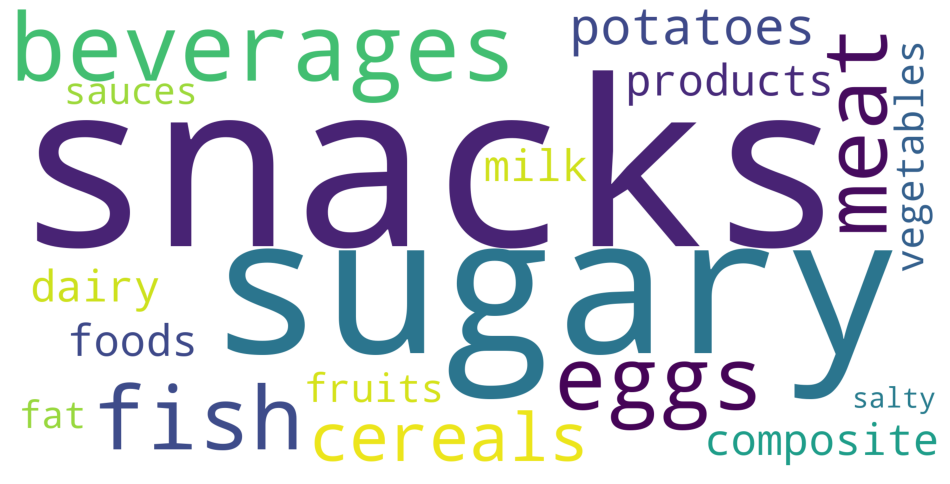

In [96]:
nuageMots(dfood, 'pnns_groups_1',figsize=(12,10))

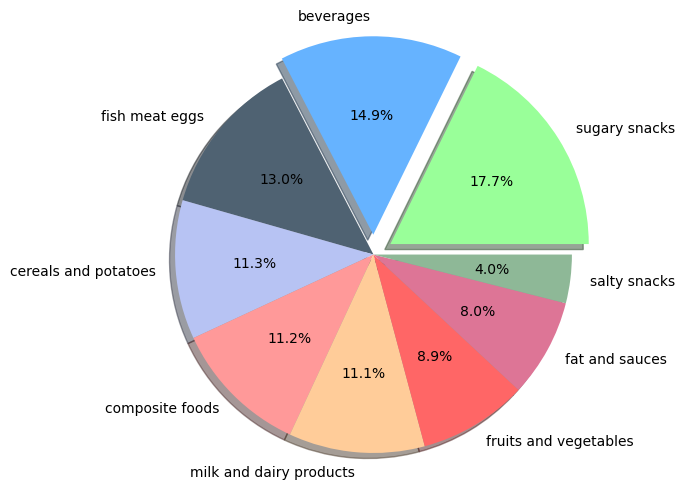

In [97]:
Camembert(dfood,'pnns_groups_1')

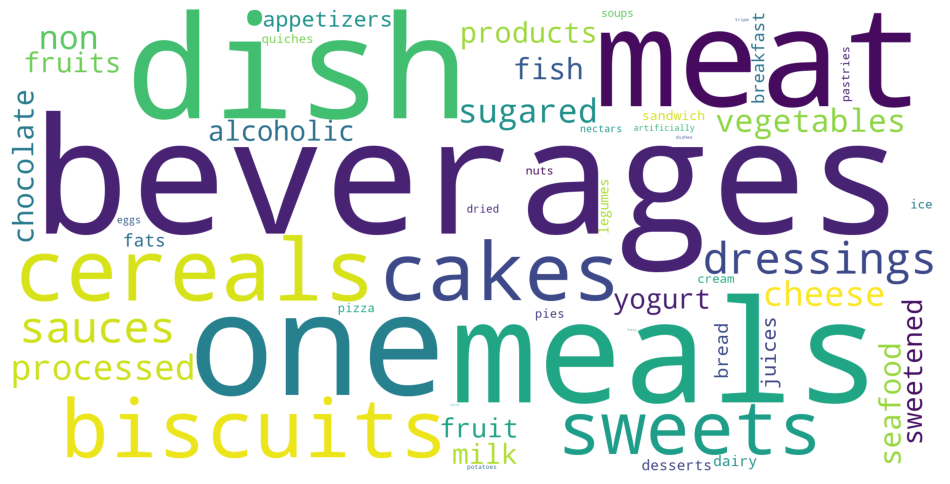

In [98]:
nuageMots(dfood, 'pnns_groups_2',figsize=(12,12))

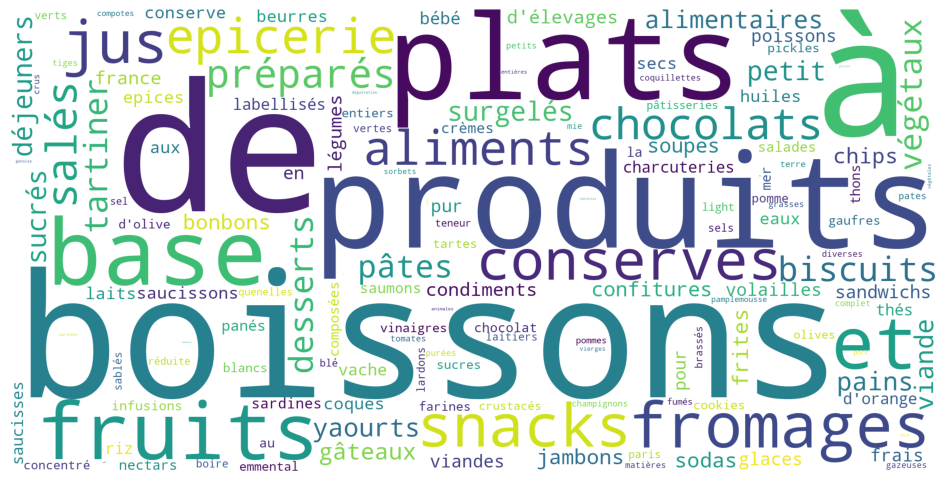

In [99]:
nuageMots(dfood, 'main_category_fr',figsize=(12,10))

## Variables nutritionnelles
------------------------
Dans cette section, nous allons travailler sur les variables nutriments. Celles-ci présentent les suffix: **`_100g`**
Les variables nutritionnelles mesurées en **grammes** ne doivent pas avoir des valeurs supérrieures à **100**. 
Cependant, la variable **`energy_100g`** peut exceder les 100 car l'unité de mesure en différente (**KJ ou KCal**)

-------------------------------------------

In [100]:
def searchVarEnd(data, suffix='_100g'):
    varList=[col for col in data.columns if col.endswith(suffix)]
    # data_subset = data[varList]
    return varList

varNutients=searchVarEnd(dfood, suffix='_100g')
varNutients

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [101]:
dfood[varNutients].describe()

energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  45413.000000  43060.000000        43434.000000        42645.000000   
mean    1086.045403     13.359458            5.279312           27.226689   
std      792.133963     17.108626            8.238564           27.271061   
min        0.000000      0.000000            0.000000            0.000000   
25%      394.000000      1.300000            0.300000            4.000000   
50%      989.000000      6.800000            1.900000           14.000000   
75%     1631.000000     21.000000            7.200000           53.000000   
max    18700.000000    380.000000          210.000000          190.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g   sodium_100g  \
count  43521.000000  28373.000000   45175.000000  43593.000000  43591.000000   
mean      12.782360      2.635698       7.546336      1.084831      0.427117   
std       18.329986      3.768998       7.285293      4.043418      1.591866   
min       -0.100000      0.000000       0.000000      0.000000      0.000000   
25%        1.000000      0.400000       1.600000      0.070000      0.027559   
50%        4.000000      1.700000       6.000000      0.558800      0.220000   
75%       16.000000      3.500000      10.800000      1.219200      0.480000   
max      105.000000     86.200000      93.100000    211.000000     83.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  
count             42595.000000             42595.000000  
mean                  8.383472                 7.920319  
std                   9.023471                 9.490878  
min                 -15.000000               -15.000000  
25%                   1.000000                 0.000000  
50%                   8.000000                 6.000000  
75%                  15.000000                16.000000  
max                  40.000000                35.000000

<AxesSubplot: >

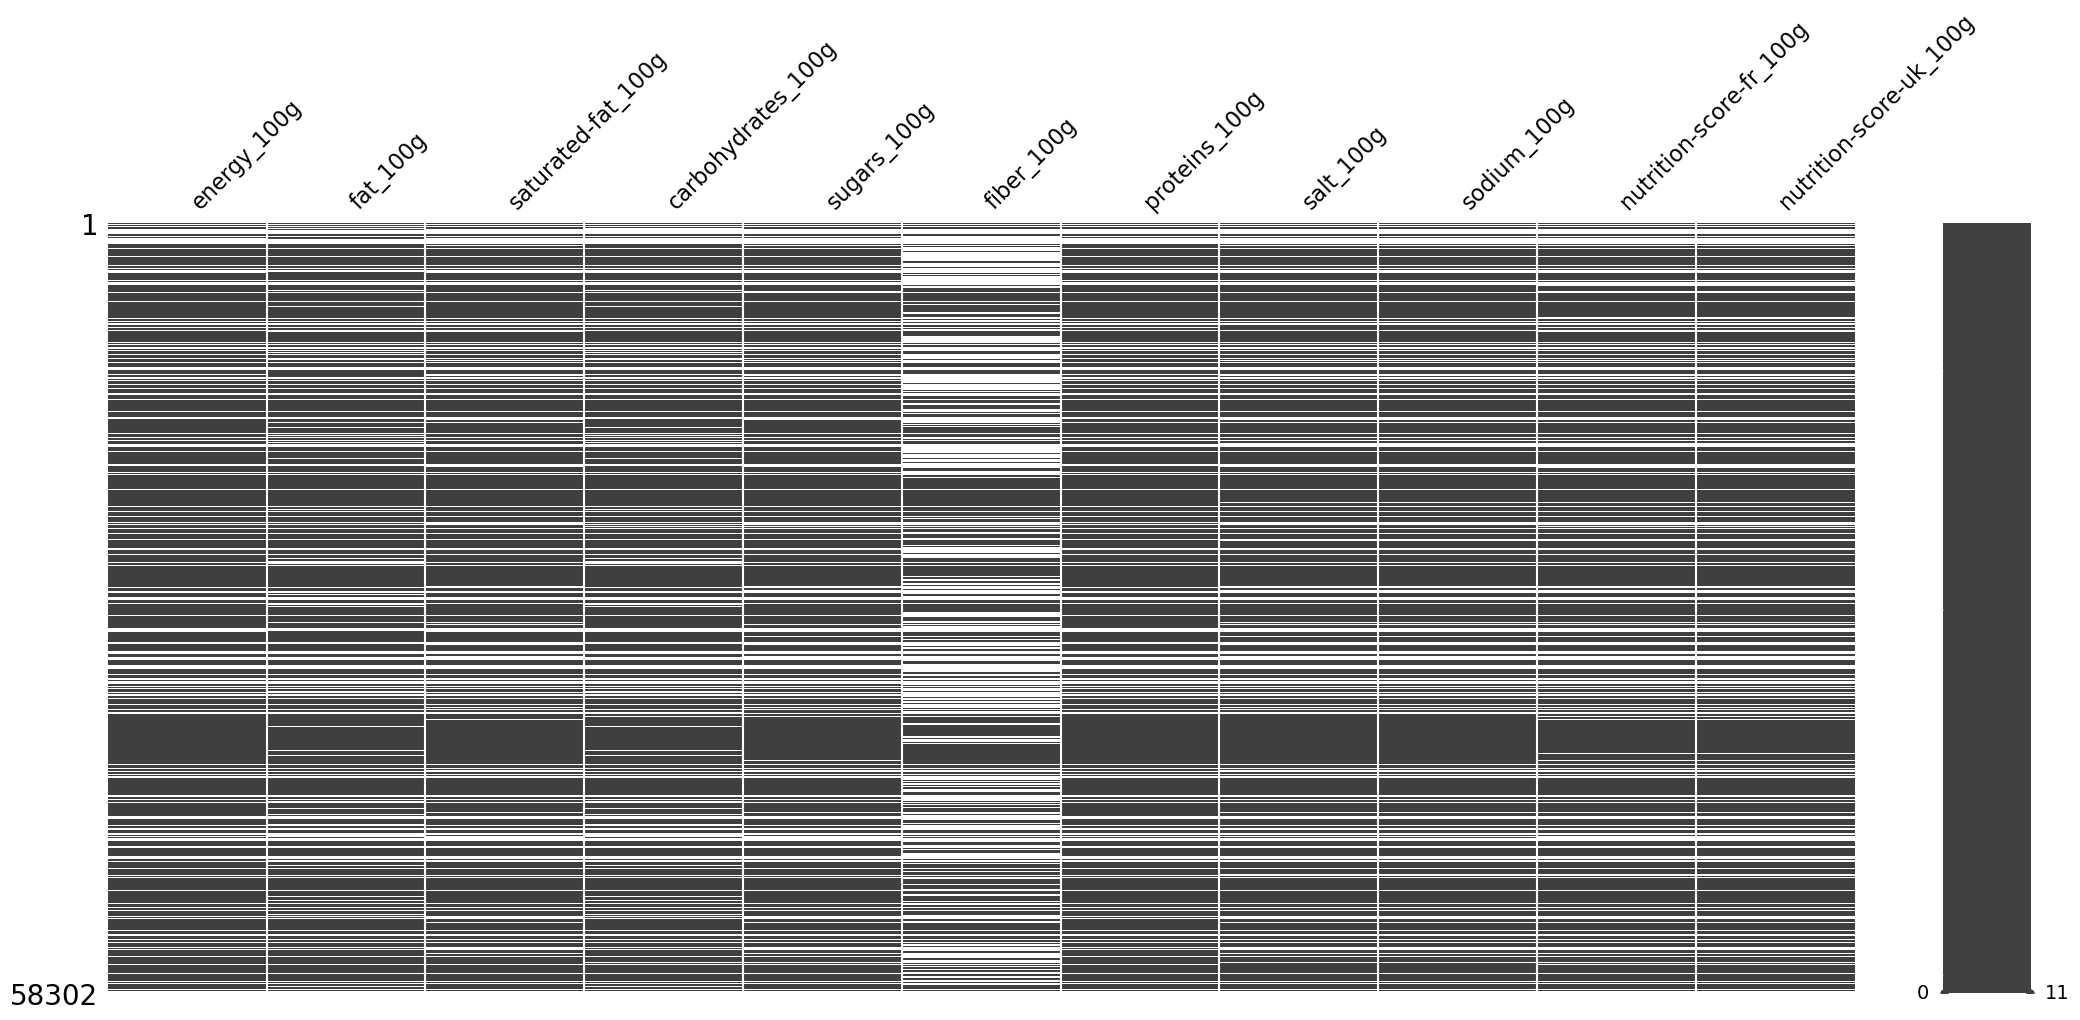

In [102]:
# msno.bar(dfood[varNutients])
msno.matrix(dfood[varNutients])

In [103]:
def nbColVides(data, cols):
    # liste des colonnes complètement vides
    cols_vides = [col for col in cols if data[col].isnull().all()]
    print('Nombre de colonnes vides: {}'.format(len(cols_vides)))
    # supprimer les colonnes vides
    # data.drop(cols_vides, axis=1,inplace=True)
    return cols_vides

    
cols_vides=nbColVides(dfood,varNutients)
cols_vides

Nombre de colonnes vides: 0


[]

In [104]:
DeleteMissingValue(dfood, 0.60,cols=varNutients)
nbColVides(dfood,list(set(varNutients)&set(dfood.columns.tolist())))

Nombre de colonnes vides: 0


[]

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> 
<p style='margin-left:0.9em;'>
    Les données <b><i> nutritionnelles </i></b> présentent beaucoup de valeurs manquantes. Nous allons supprimer les colonnes avec un taux de remplissage inférieur à un seuil fixé. La variable <b> <i>fiber_100g </i></b>  présente particulièrement un taux de missing elevé. Cependant, nous allons la garder car elle <b><i> utile</i></b> dans le calcul du <b> <i> nutriscore</i></b>. </p>
</span>
</div>

In [105]:
features_100g = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g','sodium_100g',
                 'saturated-fat_100g','fiber_100g']
dfood = dfood[~(dfood[features_100g] > 100).any(axis=1)]
dfood = dfood[~(dfood[features_100g] <0).any(axis=1)]

Par ailleurs, les valeurs de ***`saturated-fat_100g`*** ne doivent pas depasser celles de la ***`fat_100g`***, de même pour les valeurs de ***`sodium_100g`*** qui ne doivent pas depasser celles de la ***`salt_100g`***.     


In [106]:
dfood = dfood[~((dfood['saturated-fat_100g'] > dfood['fat_100g'])|(dfood['sodium_100g'] > dfood['salt_100g']))]

La densité d'energie maximale pour **100g** sont de **3700 kJ/100g** ou **900 kcal/100g**. Donc, la variable ***`energy_100g`*** ne doit pas excéder la valeur de ***3700***.

In [107]:
dfood = dfood[(dfood['energy_100g'] <=3700)&(dfood['energy_100g'] >=0)]

In [108]:
all_na = dfood[dfood["energy_100g"].isna()
                            & dfood["proteins_100g"].isna()
                            & dfood["sugars_100g"].isna()
                            & dfood["fat_100g"].isna()
                            & dfood["saturated-fat_100g"].isna()
                            & dfood["carbohydrates_100g"].isna()
                            & dfood["sodium_100g"].isna() 
                    ]
all_na[features_100g]

Empty DataFrame
Columns: [proteins_100g, fat_100g, carbohydrates_100g, sugars_100g, salt_100g, sodium_100g, saturated-fat_100g, fiber_100g]
Index: []

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span>
        <p style='margin-left:0.5em;margin-right:0.5em;'>
Nous avons des lignes pour lesquelles <b><i> toutes les variables nutriments sont vides (NaN) </i></b>. 
Nous allons supprimer ces lignes du dataframe. 
        </p>
    </span>
</div>

In [109]:
dfood=dfood.loc[~(dfood["energy_100g"].isna()
                            & dfood["proteins_100g"].isna()
                            & dfood["sugars_100g"].isna()
                            & dfood["fat_100g"].isna()
                            & dfood["saturated-fat_100g"].isna()
                            & dfood["carbohydrates_100g"].isna()
                            & dfood["sodium_100g"].isna()),:]
dfood[features_100g]

proteins_100g  fat_100g  carbohydrates_100g  sugars_100g  salt_100g  \
226             0.000       0.0               10.40        10.40     0.0254   
240             0.000       0.0               10.40        10.40     0.1000   
242             6.000      23.0               55.00        26.00     0.6600   
279             5.800      19.0               56.00        28.00     0.6500   
283             4.900      15.0               60.00        34.00     0.6000   
...               ...       ...                 ...          ...        ...   
320681          0.040       1.3               95.87         0.12     0.0050   
320702          0.004       1.3               95.31         0.10     0.0010   
320734          7.800       NaN                 NaN         1.80     1.3500   
320751         13.000       2.8               74.80         2.60     0.6800   
320763          0.500       0.2                0.50         0.50     0.0254   

        sodium_100g  saturated-fat_100g  fiber_100g  
226        0.010000                0.00       0.000  
240        0.039370                0.00         NaN  
242        0.259843                2.50       1.500  
279        0.255906                2.50       1.800  
283        0.236220                2.00       1.500  
...             ...                 ...         ...  
320681     0.001969                1.28       0.005  
320702     0.000394                1.28       1.470  
320734     0.531496                3.40       5.600  
320751     0.267717                0.60       5.900  
320763     0.010000                0.20       0.200  

[45244 rows x 8 columns]

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; padding-bottom: 2px;padding-top: 10px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span> 
        <p style='margin-left:0.5em;margin-right:0.5em;'>
Voyons, si la distribution des variables suivent des lois gaussiennes, afin de compléter les valeur manquantes avec des medianes.<br>
Nous allons déjà regarder la <b><i>distribution de ces variables et définir si elles suivent une loi normale</i></b>, ce qui nous aidera à prendre une décision pour la méthode d'imputation des valeurs manquantes.
        </p>
    </span>
</div>

C:\Users\Fane0763\AppData\Local\Temp\ipykernel_4168\378015093.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfood[colonne], fit=stats.norm, kde=False)


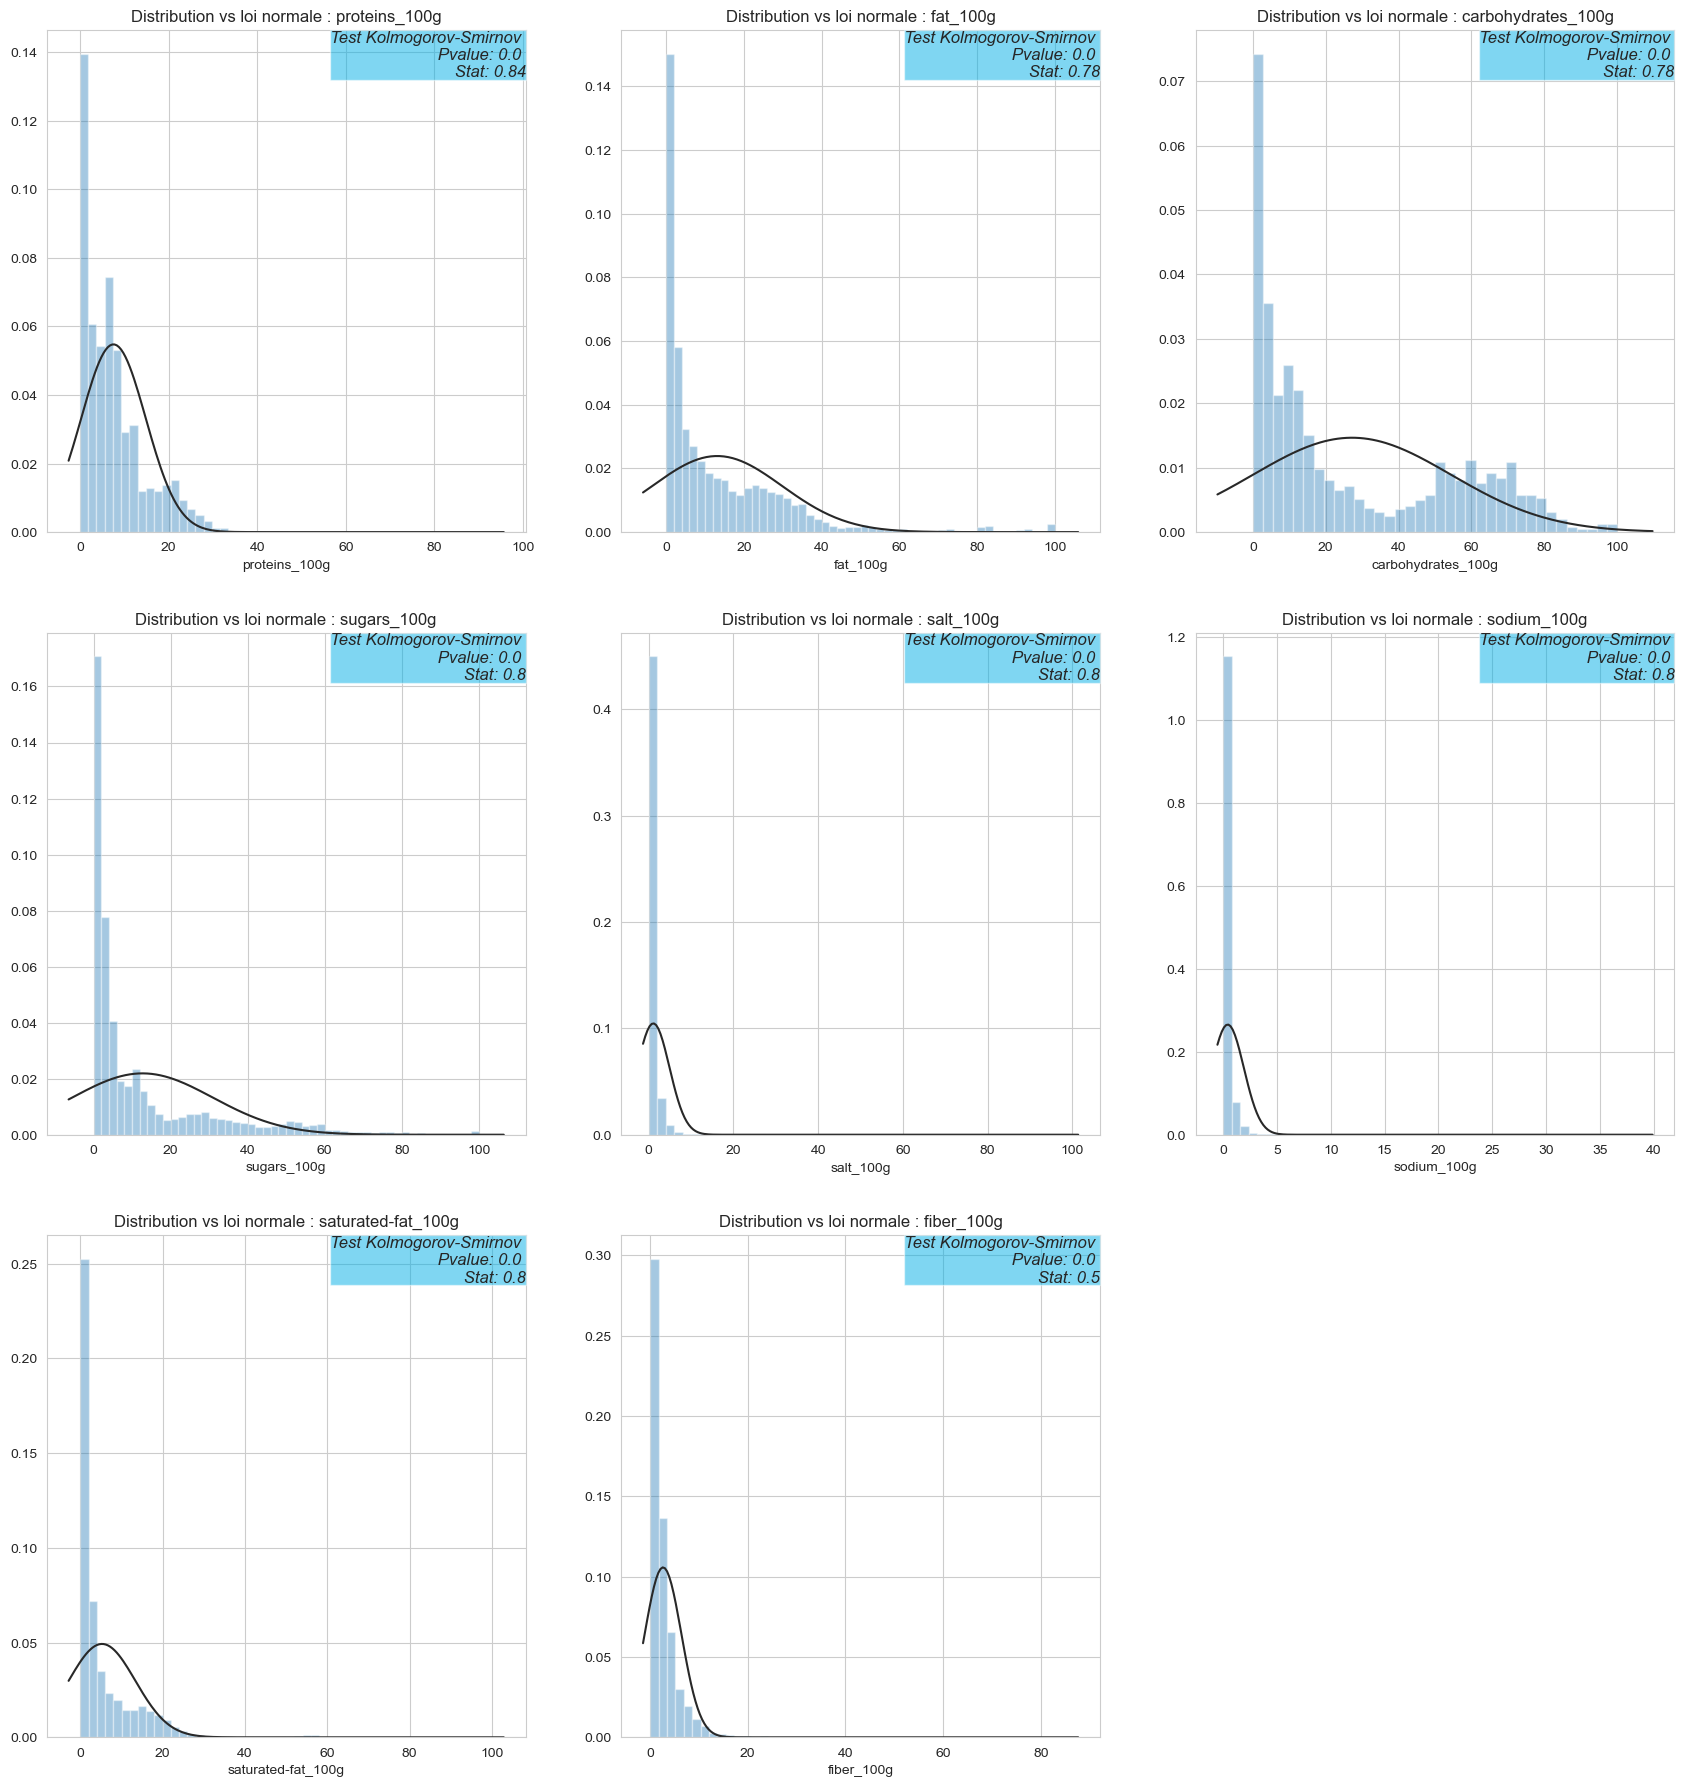

In [110]:
import scipy.stats as stats
def distribtution():
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(21,30))
    sub = 0
    for i in range(len(features_100g)):
        fig.add_subplot(4,3,i+1)

        left, width = 0, 1
        bottom, height = 0, 1
        right = left + width
        top = bottom + height

        colonne = features_100g[i]
        kstest = stats.kstest(dfood[colonne].notnull(),'norm')
        ax = sns.distplot(dfood[colonne], fit=stats.norm, kde=False)
        ax.set_title("Distribution vs loi normale : {}".format(colonne))
        ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
                horizontalalignment='right',
                verticalalignment='top',
                style='italic', transform=ax.transAxes, fontsize = 12,
                bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
        sub += 1
    plt.show()
    
distribtution()

--------------
Avec les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) **on rejette donc l'hypothèse de normalité des distributions**. Il serait donc inexacte d'imputer les valeurs manquantes par la moyenne.

-----------------

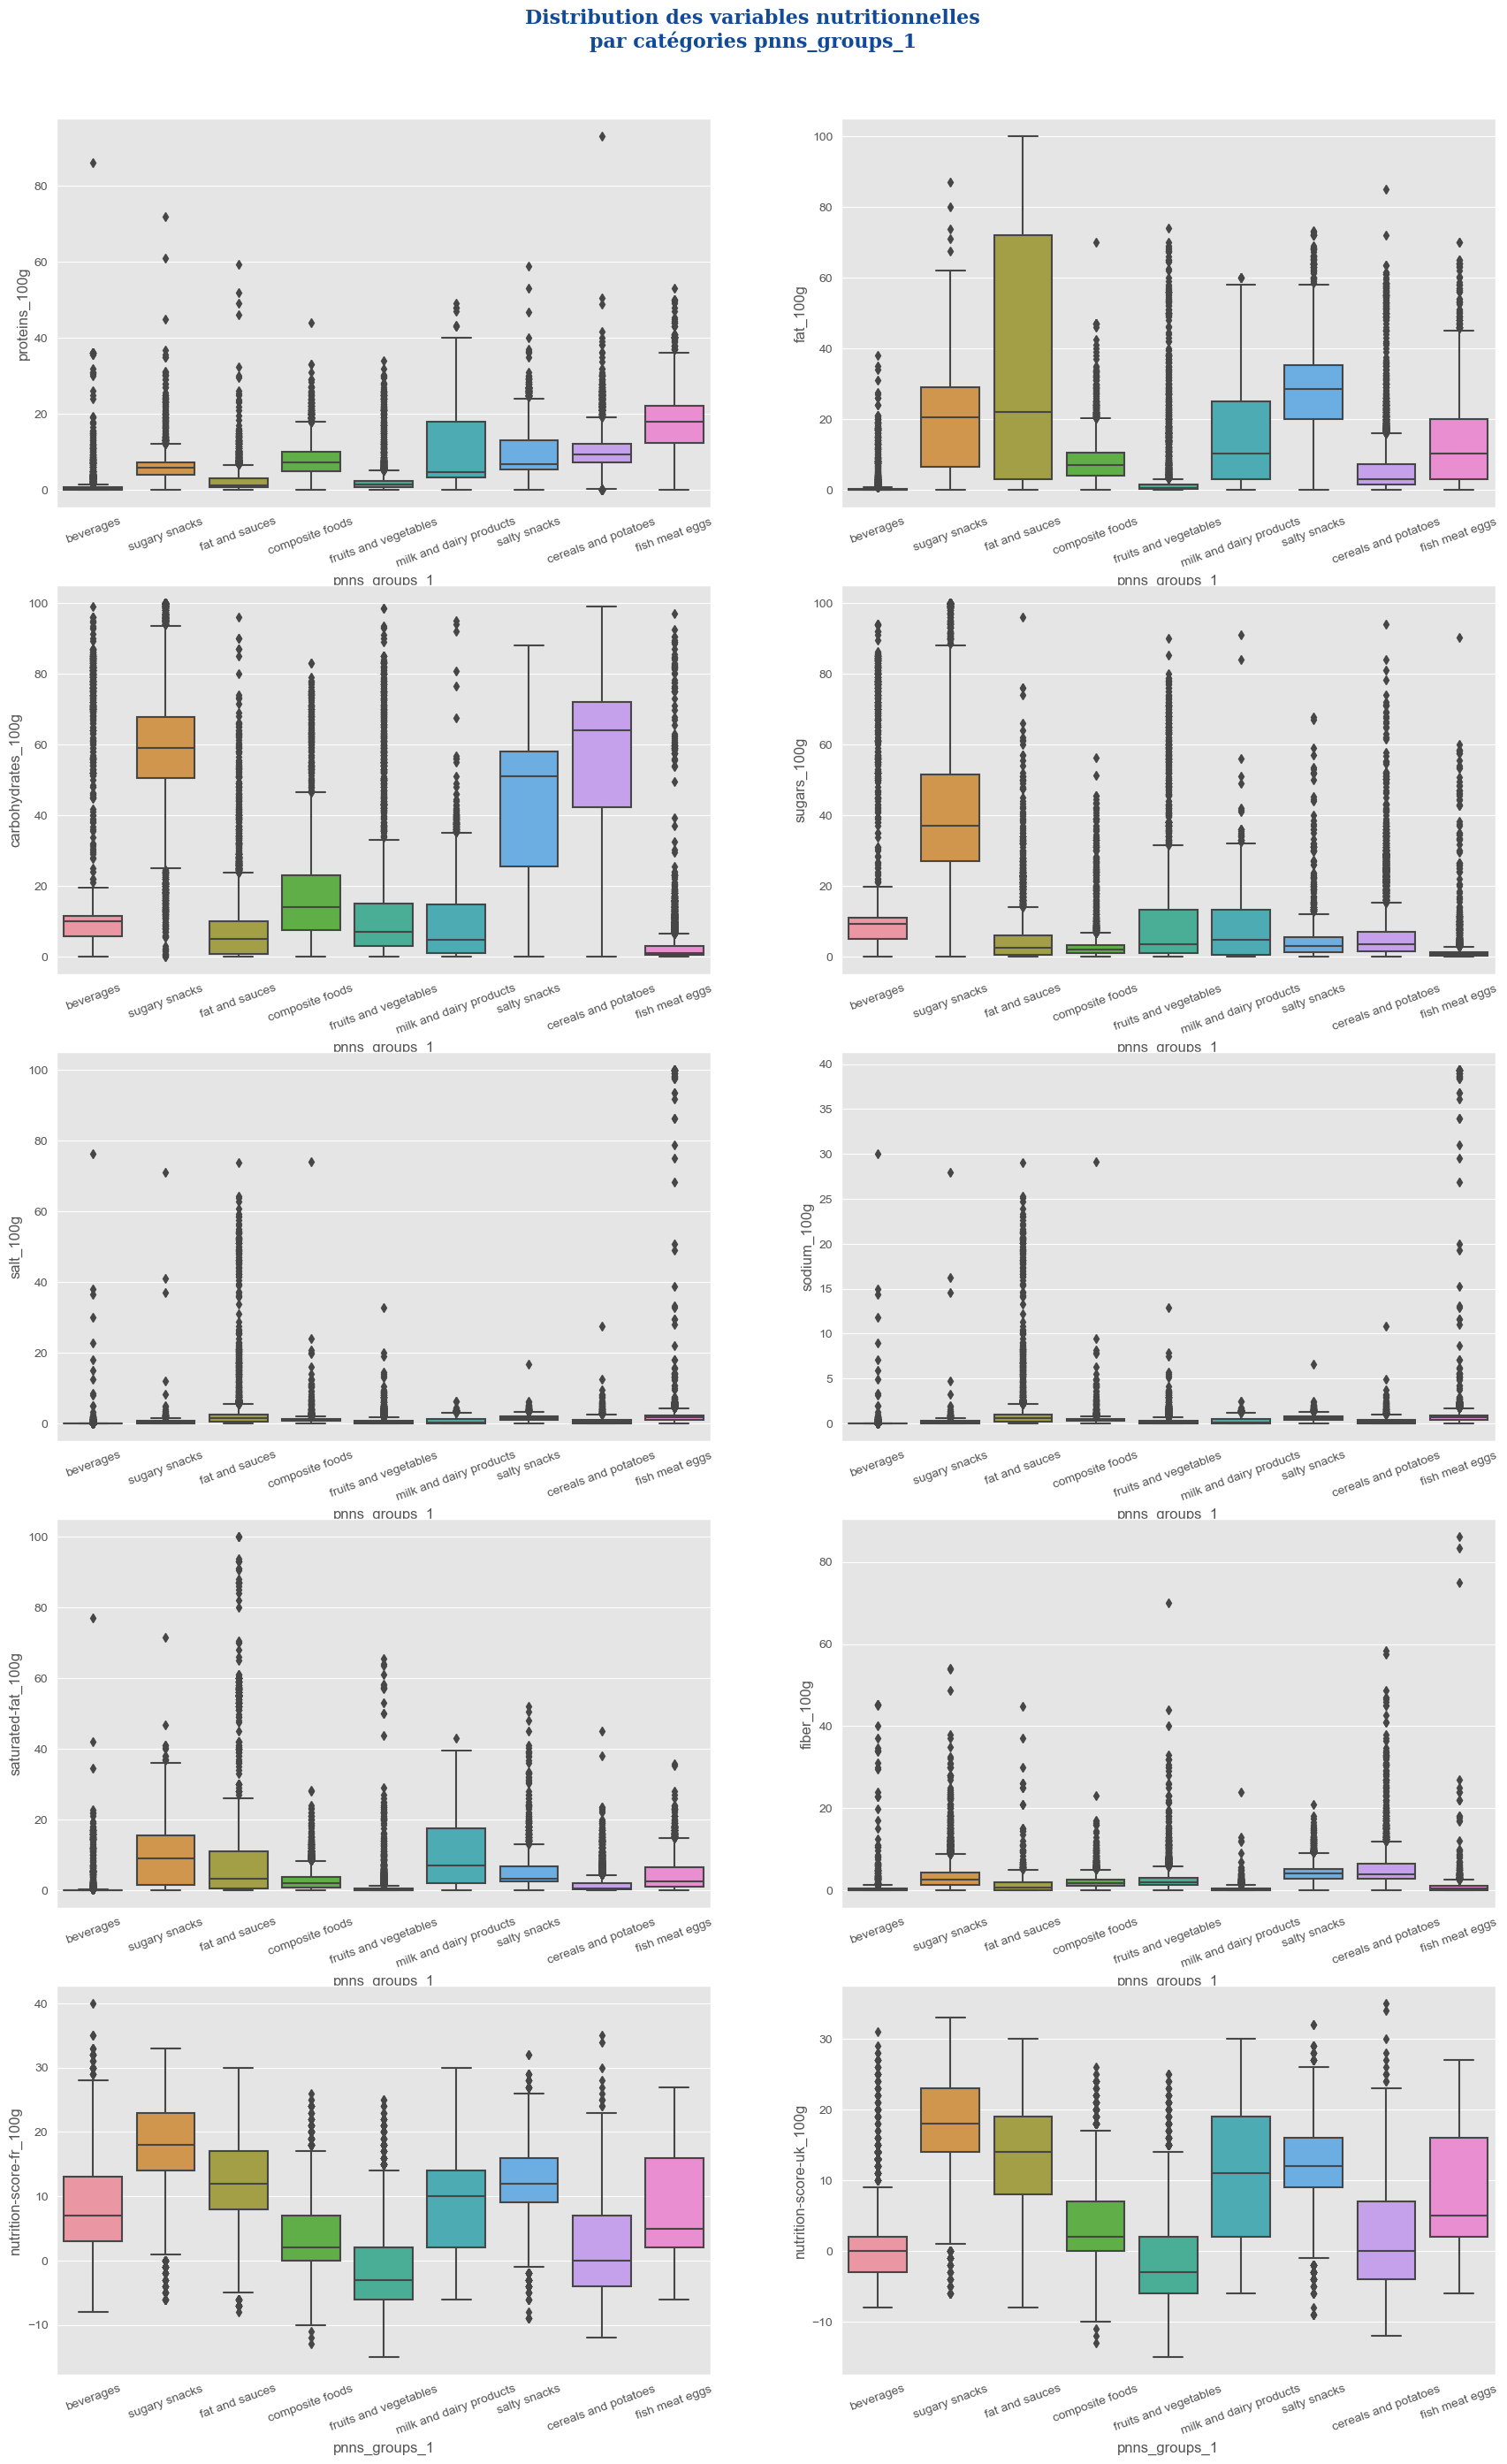

In [111]:
features_100g = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g','sodium_100g',
                 'saturated-fat_100g','fiber_100g','nutrition-score-fr_100g','nutrition-score-uk_100g']

plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(features_100g)):
    fig.add_subplot(6,2,i+1)
    colonne = features_100g[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=dfood[dfood["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(20)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_1", ha="center", 
         fontdict=font_title)
plt.show()

### Imputation avec la méthode KNN Imputer

In [112]:
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
sample_datas = dfood[features_100g].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

KNNImputer()

In [113]:
# Puis on applique le modèle sur l'ensemble des données
df_imputed = imputer.transform(dfood[features_100g])
dfood_imputed = pd.DataFrame(df_imputed, columns=features_100g)

In [114]:
dfood_cleaned=dfood
for col in features_100g:
    dfood_cleaned[col] = dfood_imputed[col].values

------------------

Après imputation, nous allons revoir la distribution

----------------------

C:\Users\Fane0763\AppData\Local\Temp\ipykernel_4168\378015093.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfood[colonne], fit=stats.norm, kde=False)


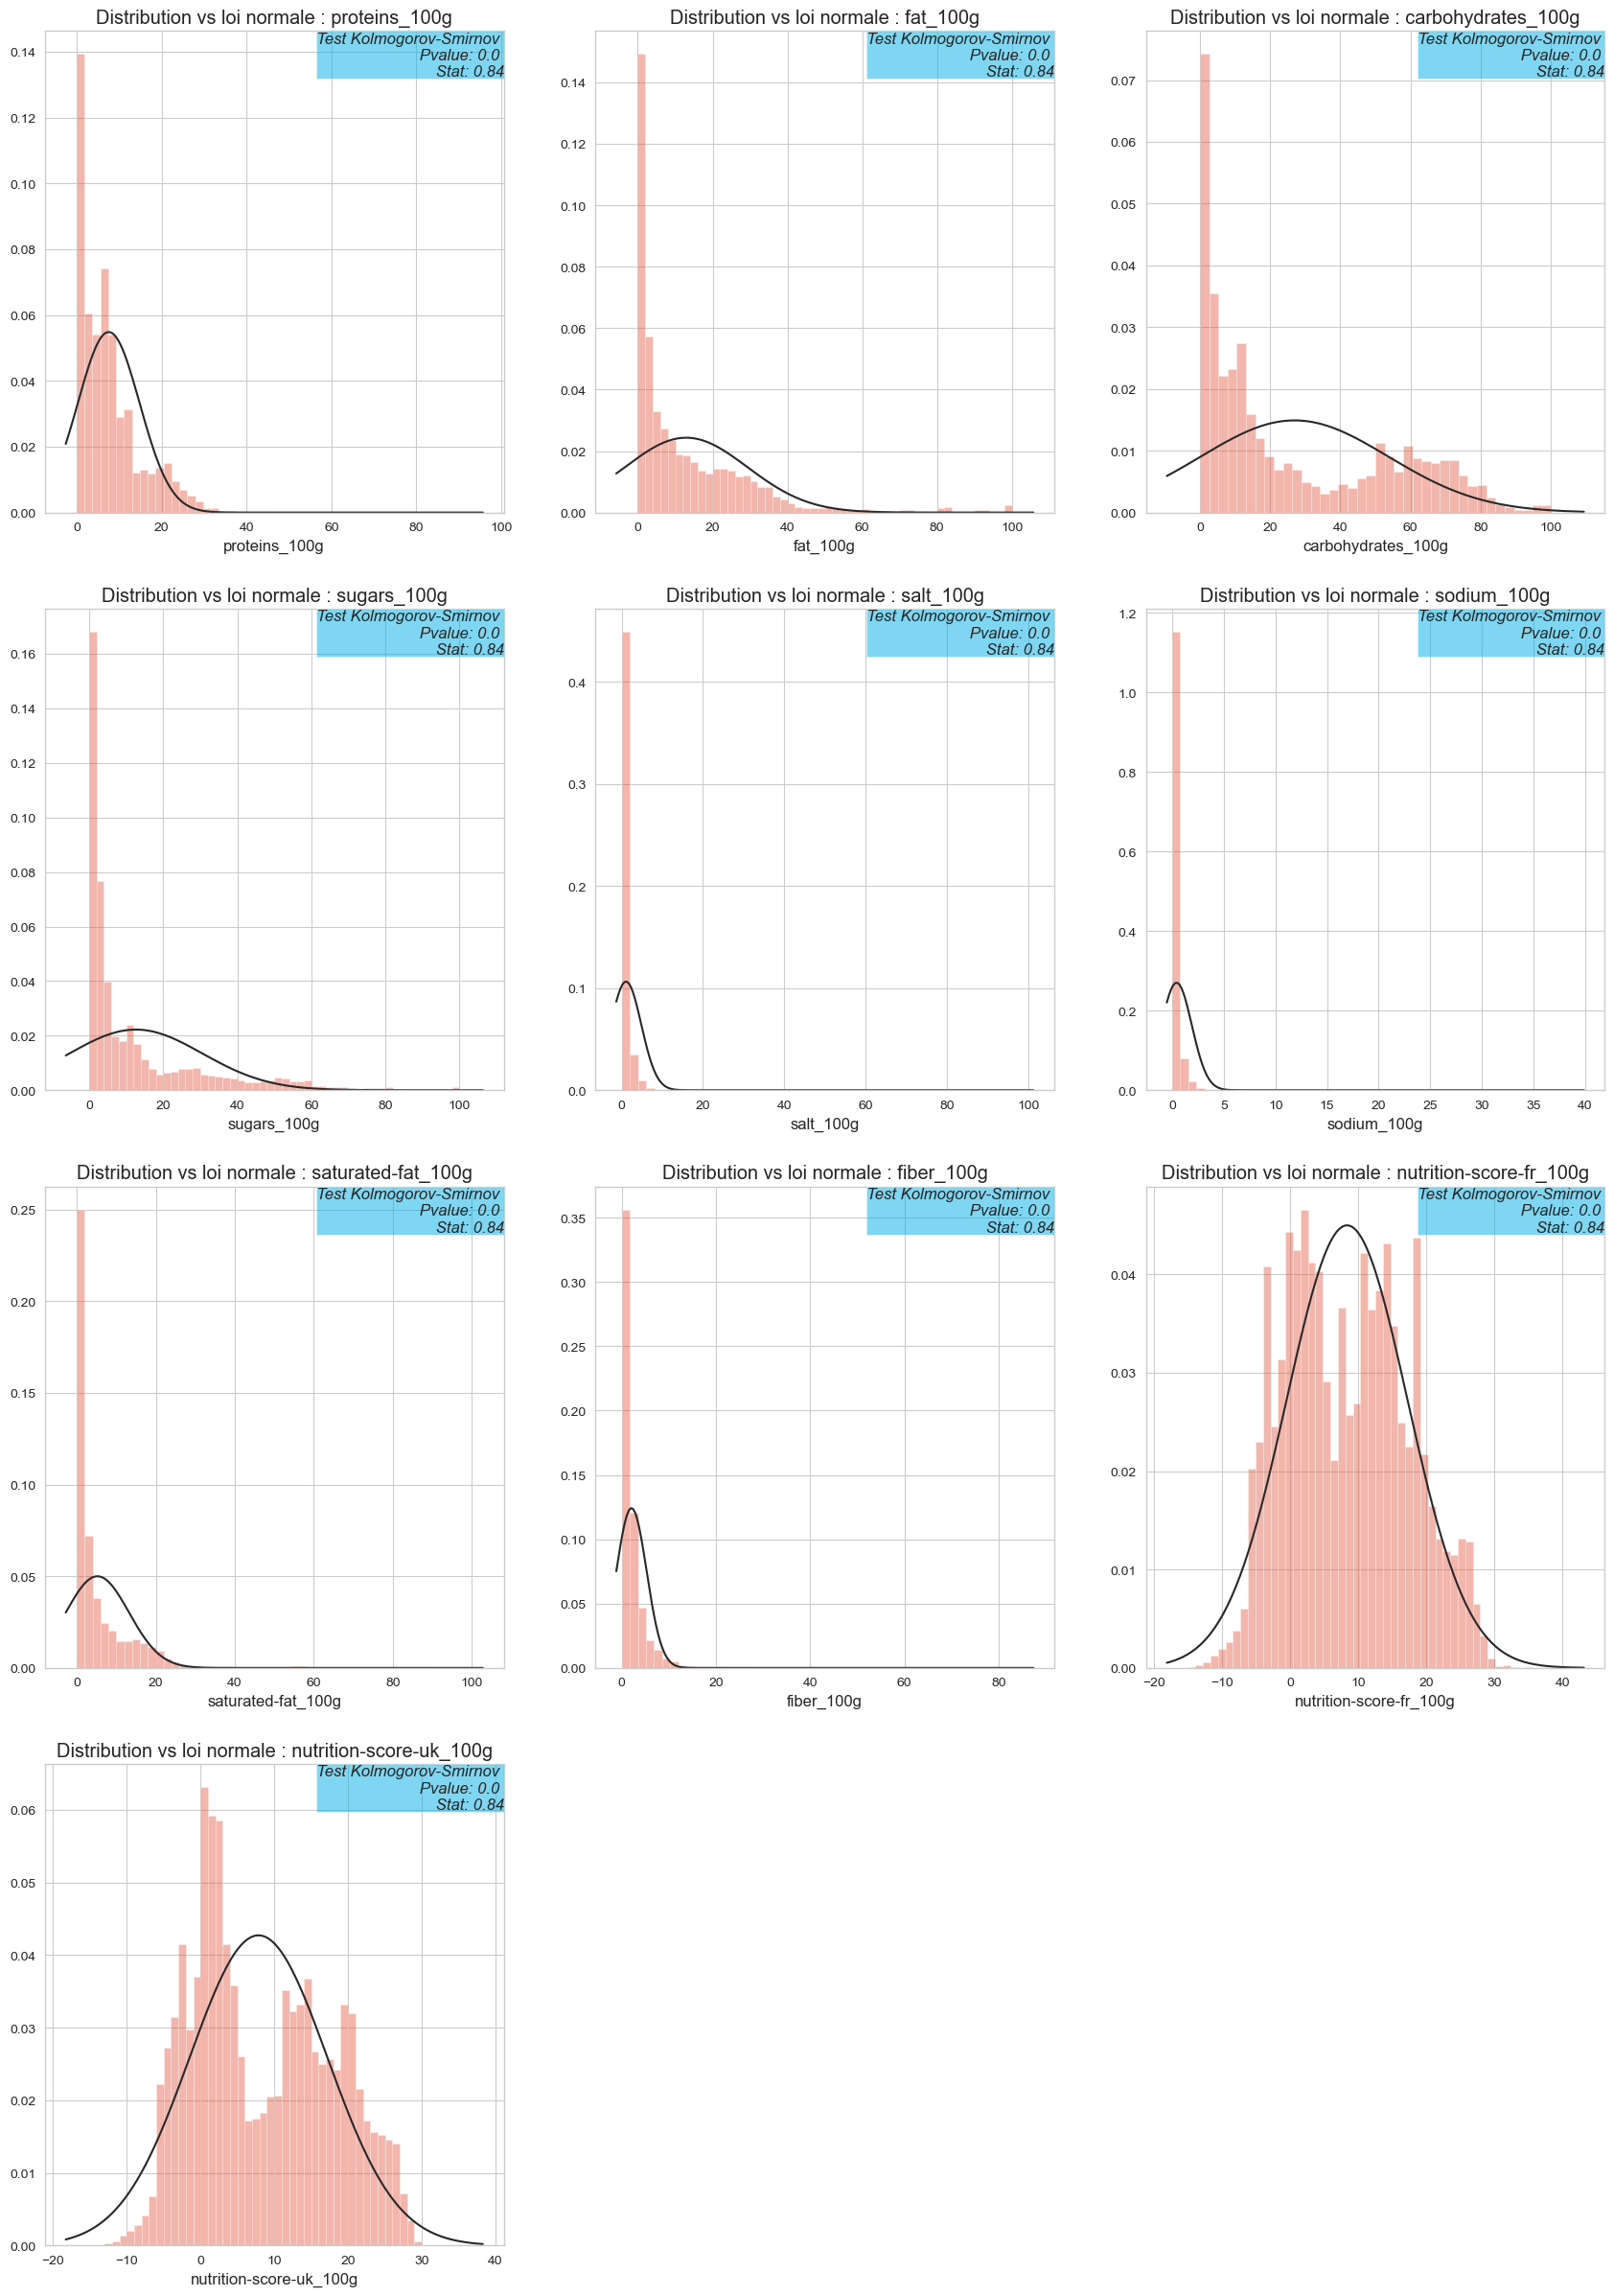

In [115]:
distribtution()

<AxesSubplot: >

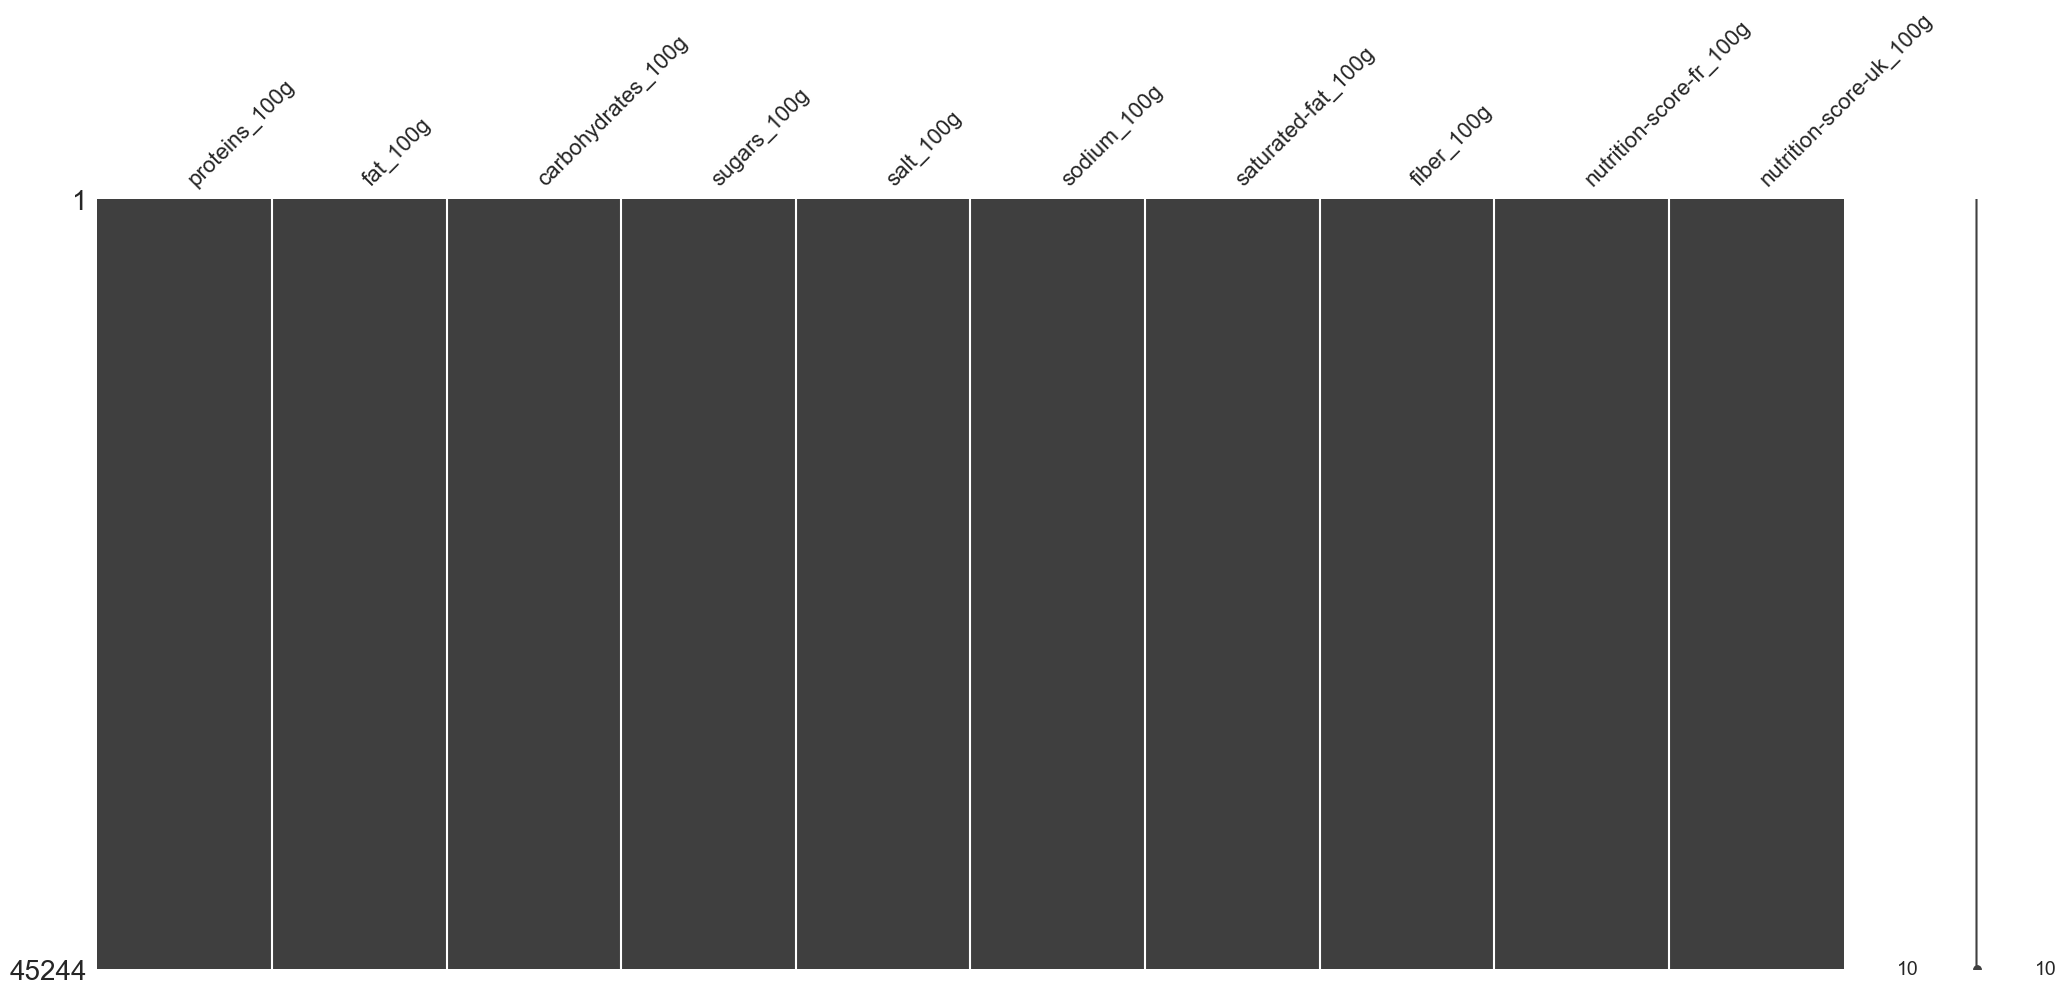

In [116]:
msno.matrix(dfood_cleaned[features_100g])

### Nutriscore (nutrigrade)

------------------------
Cet **indicateur** note les produits de **A, vert foncé**, pour les plus favorables sur le plan nutritionnel, à **E, orange foncé**, pour les moins favorables. Il est pratique et bien utile pour comparer les produits en un coup d’œil quand on fait ses courses et identifier ceux de meilleure qualité nutritionnelle. 

-------------------------

In [117]:
def toMajuscule(data, cols) :
    data[cols] = data[cols].str.upper()
    return data

In [118]:
dfood_cleaned=toMajuscule(dfood_cleaned, 'nutrition_grade_fr')
dfood_cleaned['nutrition_grade_fr']

226       E
240       E
242       D
279       D
283       D
         ..
320681    C
320702    B
320734    C
320751    A
320763    C
Name: nutrition_grade_fr, Length: 45244, dtype: object

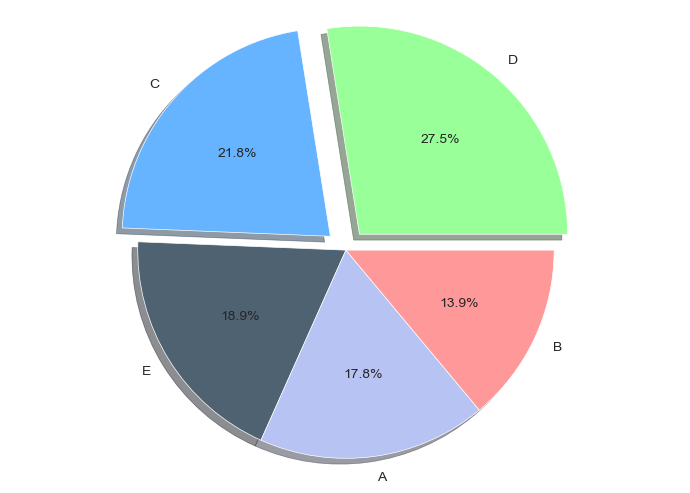

In [119]:
Camembert(dfood_cleaned,'nutrition_grade_fr')

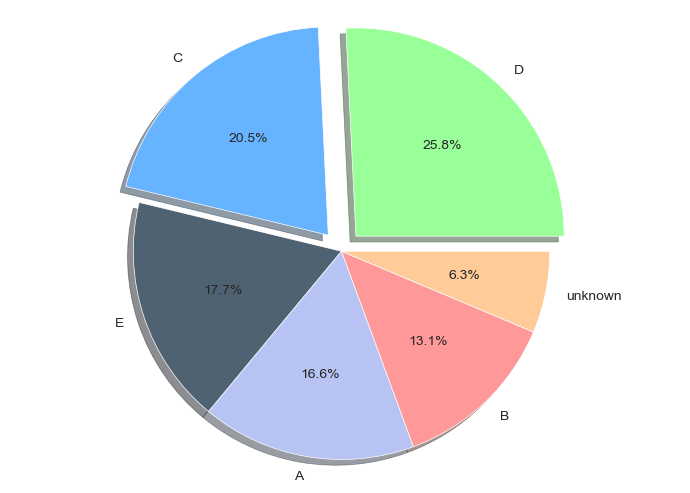

In [120]:
dfood3=recodage(dfood_cleaned, ['nutrition_grade_fr'])
Camembert(dfood3,'nutrition_grade_fr')

In [121]:
# dfood_cleaned[['nutrition_grade_fr','nutrition-score-fr_100g', 'nutrition-score-uk_100g']]


In [122]:
# NumericColums=selectionVar(dfood_cleaned, typevar=['int64','float64'])
# NumericColums

## Calcul du nutriscore

-----------------
Nous allons, à partir du nutriscore, imputer le nutri grade.

----------------------


 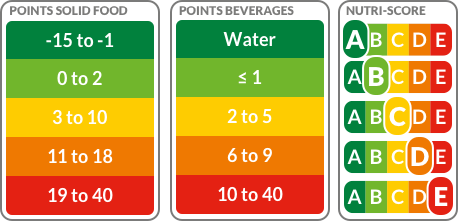

<table width="50%" style="border:solid 1px; text-align:center;" align="center">
    <thead>
        <th>Aliment solide</th>
        <th>Lettre</th>
        <th>Couleur</th>
    </thead>
    <tbody>
        <tr>
            <td>Mimimum -1</td>
            <td>A</td>
            <td>Vert foncé</td>
        </tr>
        <tr>
            <td>0 à 5</td>
            <td>B</td>
            <td>Vert</td>
        </tr>
        <tr>
            <td>5 à 10</td>
            <td>C</td>
            <td>Jaune</td>
        </tr>
        <tr>
            <td>10 à 20</td>
            <td>D</td>
            <td>Orange</td>
        </tr>
        <tr>
            <td>20 et plus</td>
            <td>E</td>
            <td>Orange foncé</td>
        </tr>
    </tbody>
</table>

In [123]:
def imputeNutrigrade(dataframe):
    for i, row in dataframe[(dataframe['nutriscore_grade'].isnull())|(dataframe['nutriscore_grade']=="unknown")].iterrows():
        if (row['pnns_groups_1']!='Beverages'): # Aliments solides      
            if (row['nutriscore_score'] >= -15) and (row['nutriscore_score'] <= -1) :
                dataframe.loc[i,'nutriscore_grade']='A'
            elif (row['nutriscore_score'] > -1) and (row['nutriscore_score'] <= 2) :
                dataframe.loc[i,'nutriscore_grade']='B'
            elif (row['nutriscore_score'] > 2) and (row['nutriscore_score'] <= 10) :
                dataframe.loc[i,'nutriscore_grade']='C'
            elif (row['nutriscore_score'] > 10) and (row['nutriscore_score'] <= 18) :
                dataframe.loc[i,'nutriscore_grade']='D'
            elif (row['nutriscore_score'] > 18) and (row['nutriscore_score'] <= 40) :
                dataframe.loc[i,'nutriscore_grade']='E'
        else:
            x = row['product_name'].lower()
            if (('eau' in x) | ('water' in x) | ('agua' in x)): # Eau
                dataframe.loc[i,'nutriscore_grade']= 'A' 
            elif (row['nutriscore_score'] <= -1) :
                dataframe.loc[i,'nutriscore_grade']='B'
            elif (row['nutriscore_score'] > -1) and (row['nutriscore_score'] <= 5) :
                dataframe.loc[i,'nutriscore_grade']='C'
            elif (row['nutriscore_score'] > 5) and (row['nutriscore_score'] <= 9) :
                dataframe.loc[i,'nutriscore_grade']='D'
            elif (row['nutriscore_score'] > 9) and (row['nutriscore_score'] <= 40) :
                dataframe.loc[i,'nutriscore_grade']='E'
          
    return dataframe

In [124]:
dfood_cleaned[['nutriscore_grade','nutriscore_score']]=dfood_cleaned[['nutrition_grade_fr','nutrition-score-fr_100g']]
dfood_cleaned=imputeNutrigrade(dfood_cleaned)
dfood_cleaned[dfood_cleaned['nutrition_grade_fr'].isnull()][['nutrition_grade_fr','nutrition-score-fr_100g']+['nutriscore_grade','nutriscore_score']]

Empty DataFrame
Columns: [nutrition_grade_fr, nutrition-score-fr_100g, nutriscore_grade, nutriscore_score]
Index: []

<AxesSubplot: >

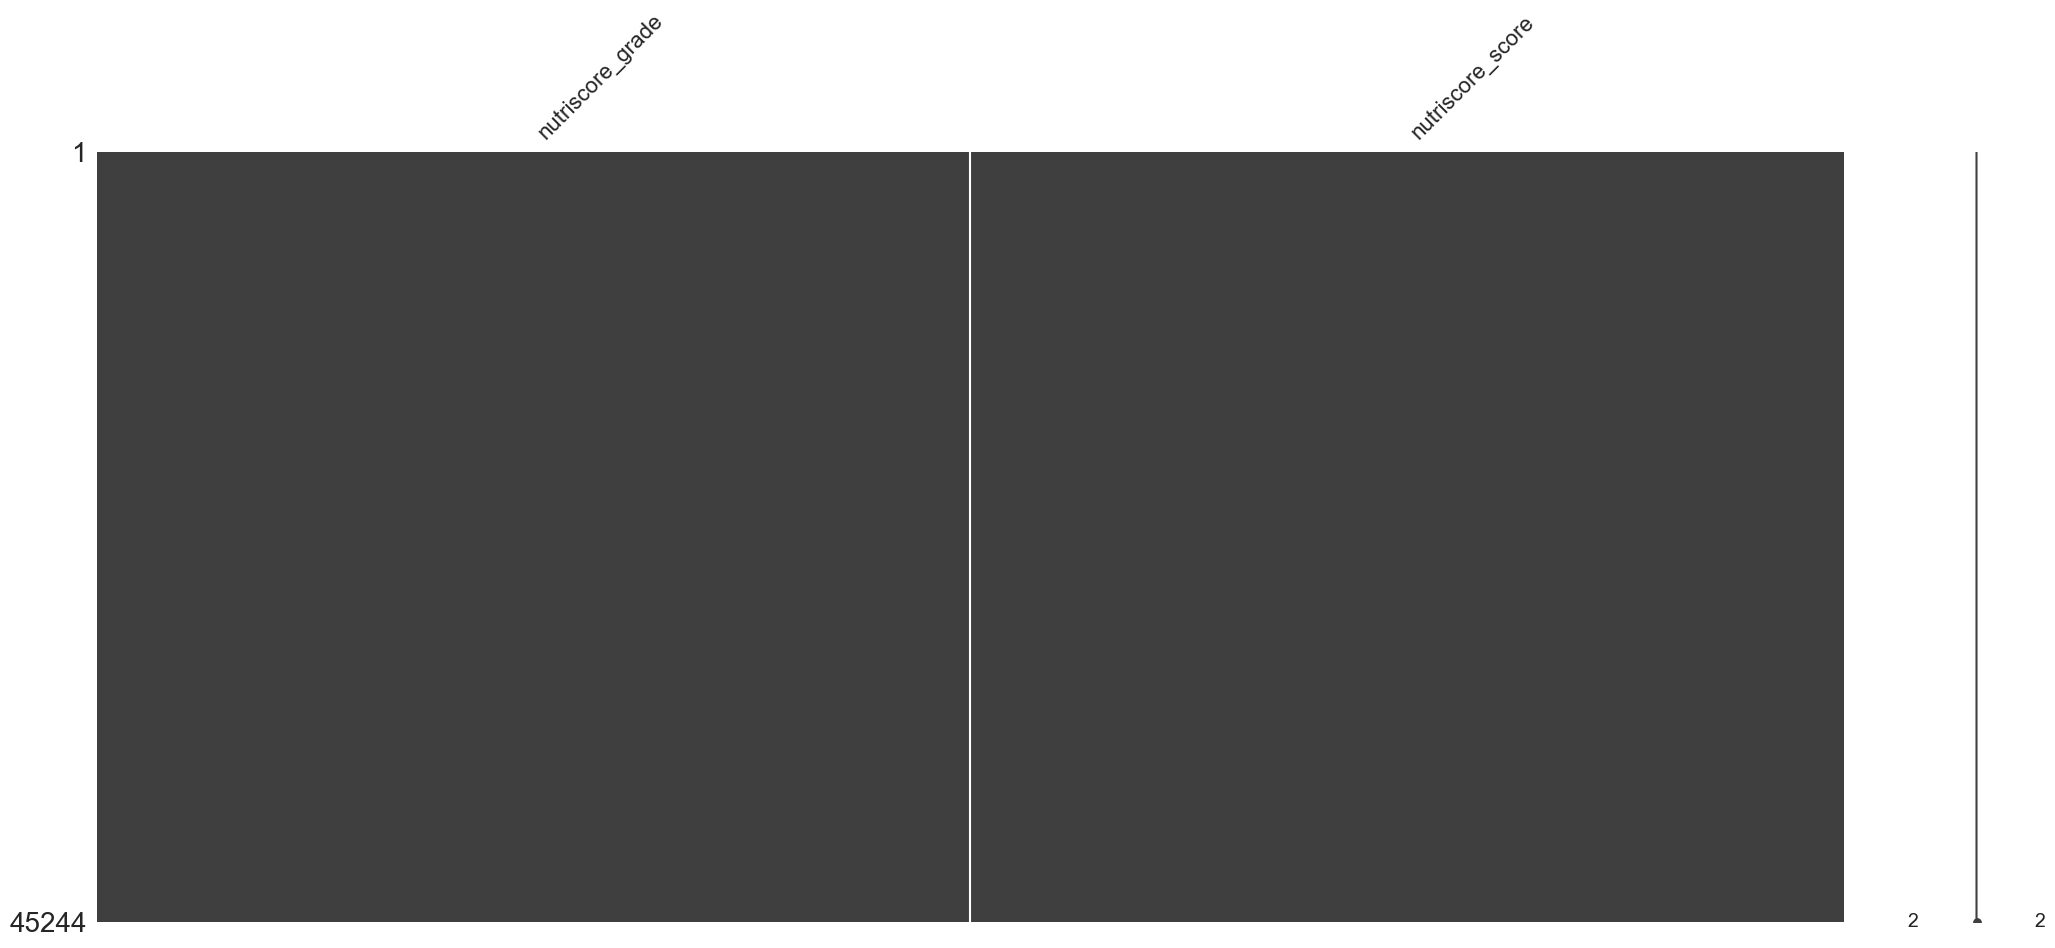

In [125]:
msno.matrix(dfood_cleaned[['nutriscore_grade','nutriscore_score']])

### <a id='7'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 7- Detection des outliers </p>  </a>

-------------------
Nous allons supprimer les Outliers à partir des features_100g i.e les variables nutrionnelles

----------------------

In [126]:
# Creer un dataframe avec les outliers
def findOutliers(df, col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    outliers = df[((df[col]<(q1-1.5*IQR)) | (df[col]>(q3+1.5*IQR)))]
    return outliers

# Creer un dataframe en supprimant les Outliers
def deleteOutliers(df, col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    dfWithOut = df.loc[~((df[col]<(q1-1.5*IQR)) | (df[col]>(q3+1.5*IQR))),:]
    return dfWithOut

In [127]:
for var in features_100g:
    dfood_cleaned=deleteOutliers(dfood_cleaned, var)

In [128]:
dfood_cleaned[features_100g]

proteins_100g  fat_100g  carbohydrates_100g  sugars_100g  salt_100g  \
226             0.000      0.00               10.40        10.40     0.0254   
240             0.000      0.00               10.40        10.40     0.1000   
242             6.000     23.00               55.00        26.00     0.6600   
279             5.800     19.00               56.00        28.00     0.6500   
283             4.900     15.00               60.00        34.00     0.6000   
...               ...       ...                 ...          ...        ...   
320681          0.040      1.30               95.87         0.12     0.0050   
320702          0.004      1.30               95.31         0.10     0.0010   
320734          7.800      7.45               17.18         1.80     1.3500   
320751         13.000      2.80               74.80         2.60     0.6800   
320763          0.500      0.20                0.50         0.50     0.0254   

        sodium_100g  saturated-fat_100g  fiber_100g  nutrition-score-fr_100g  \
226        0.010000                0.00       0.000                     13.0   
240        0.039370                0.00       0.460                     13.0   
242        0.259843                2.50       1.500                     12.0   
279        0.255906                2.50       1.800                     13.0   
283        0.236220                2.00       1.500                     12.0   
...             ...                 ...         ...                      ...   
320681     0.001969                1.28       0.005                      4.0   
320702     0.000394                1.28       1.470                      2.0   
320734     0.531496                3.40       5.600                      9.0   
320751     0.267717                0.60       5.900                     -4.0   
320763     0.010000                0.20       0.200                      2.0   

        nutrition-score-uk_100g  
226                         2.0  
240                         2.0  
242                        12.0  
279                        13.0  
283                        12.0  
...                         ...  
320681                      4.0  
320702                      2.0  
320734                      9.0  
320751                     -4.0  
320763                      0.0  

[30359 rows x 10 columns]

## <a id='7'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; Conclusion </p>  </a>

In [129]:
dfood_cleaned.drop(['image_url', 'image_small_url','created_t', 'last_modified_t'], axis=1, inplace=True)

In [130]:
dfood_cleaned.to_csv('dfood_cleaned.csv', index=False)